# **Overview**

The Leaf Classification dataset is a large collection of images of plant leaves. The images are labeled as either healthy or diseased. The dataset can be used to train and evaluate machine learning models for leaf classification. The dataset is publicly available on the TensorFlow Datasets website.

The dataset has several benefits, including:

It is large and diverse, containing images of a variety of plant species and health conditions.
The images are high quality and well-labeled.
The dataset is publicly available, so it can be used by anyone.
However, the dataset also has some challenges, including:

It is imbalanced, with more healthy than diseased images.
The images are not always of the same quality, and some may be difficult to classify.
The dataset is not annotated with additional features, such as the leaf shape or texture

# **Import Libraries**

In [ ]:
# import the required libraries 
import numpy as np
import pandas as pd
import sklearn 
import tensorflow as  tf
from tensorflow import keras
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.image as imgs
from sklearn.model_selection import train_test_split
from numpy import argmax
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# **Read Data** 

In [ ]:
#reading the data(train data and test data)
train=pd.read_csv('/content/data/train.csv',index_col=0)
test=pd.read_csv('/content/data/test.csv',index_col=0)

# **Explore The Data**

In [ ]:
# show a part of train data
train.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
# show a part of test data
test.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [ ]:
# print the number of unique value in "species" column
train["species"].nunique()

99


the data consist of set of features such as margin , texture that are  used to determine 99 types of plants 

# **Check Null values And Duplication**

In [ ]:
# check the number of  null values in train data 
train.isnull().sum().sum()

0

In [ ]:
# check the number of  null values in test data 
test.isnull().sum().sum()

0

In [ ]:
# check duplication in train data
train.duplicated().sum()

0

In [ ]:
# check dublication in train data
train.duplicated().sum()

0

the data is clean , no duplication and no missing values in train and test data

# **Drawing**

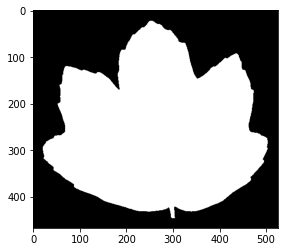

In [ ]:
# draw three image from folder "images"
img_1=plt.imshow(imgs.imread("/content/images/1.jpg"),cmap="gray")

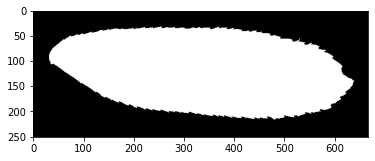

In [ ]:
img_2=plt.imshow(imgs.imread("/content/images/2.jpg"),cmap="gray")


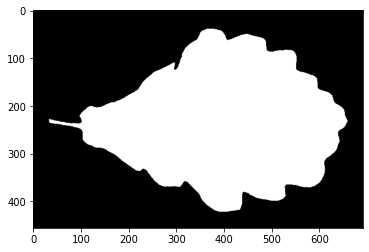

In [ ]:
img_3=plt.imshow(imgs.imread("/content/images/3.jpg"),cmap="gray")

# **Split Train Data into Features And Target**

In [ ]:
# split the features and target in train data
features=list(train.columns)
features.pop(0)
X=train[features].values

In [ ]:
# show features in form of dataframe
f =pd.DataFrame(X)
print(f.head())

        0         1         2         3         4         5         6    7    \
0  0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344  0.0   
1  0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531  0.0   
2  0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359  0.0   
3  0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438  0.0   
4  0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859  0.0   

        8         9    ...       182       183       184       185       186  \
0  0.001953  0.033203  ...  0.007812  0.000000  0.002930  0.002930  0.035156   
1  0.000000  0.007812  ...  0.000977  0.000000  0.000000  0.000977  0.023438   
2  0.000000  0.044922  ...  0.154300  0.000000  0.005859  0.000977  0.007812   
3  0.013672  0.017578  ...  0.000000  0.000977  0.000000  0.000000  0.020508   
4  0.000000  0.005859  ...  0.096680  0.000000  0.021484  0.000000  0.000000   

   187  188       189       190       

In [ ]:
# the target column 
Y = train.species.values

In [ ]:
# show the target in form of dataframe
f1 =pd.DataFrame(Y)
print(f1.head())

                       0
0            Acer_Opalus
1  Pterocarya_Stenoptera
2   Quercus_Hartwissiana
3        Tilia_Tomentosa
4     Quercus_Variabilis


# **correlation**

In [ ]:
#correlation analysis 
# get the correlation between features in train data
train.corr()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


# **Label Encoding**

In [ ]:
# encoding the target using label encoding
encoder=LabelEncoder()
Y = encoder.fit_transform(Y)

# **Split Data**

In [ ]:
#split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

# **Standardization**

In [ ]:
""" I Decide i will make standardization on the data, by computing the mean and standard 
deviation for each feature """
the_scalar=preprocessing.StandardScaler()
x_train=the_scalar.fit_transform(x_train)
x_test=the_scalar.transform(x_test)
type(x_test)

numpy.ndarray

In [ ]:
#encode the labels in train data 
y_train_encoding=to_categorical(y_train)
print(y_train_encoding)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# get the shape of x_train (the input to network)
x_train.shape

(792, 192)

# **Training Function**

In [ ]:
#define the combination of hyperparameters to get accuracy an loss to each combination then choose model that have best hyperparameters
#define function that take hyperparameter, the function called "evaluation_parameters"
#the model type is Sequential
# the size of input shape is 192
# the output layer contain 99 units because there are 99 classes 
# the activation of hidden layer is "tanh" and output layer is "softmax"  
def evaluation_parameters(batch_size = 16, hidden_size = 384, optimizers = "Adam", dropout = 0.5, 
                        learning_rate = 0.001, regularization = 0.001): 
    model = keras.Sequential()
    model.add(keras.Input(shape=(192,)))

    model.add(keras.layers.Dense(hidden_size, activation = "tanh"))
    model.add(keras.layers.Dropout(dropout))
    
    model.add(keras.layers.Dense(99, activation = "softmax"))
    
  
    model.compile(optimizer = optimizers, loss = "SparseCategoricalCrossentropy", metrics = ["accuracy"])
    EarlyStop = keras.callbacks.EarlyStopping(patience = 10)

# train the model with these hyperparameters
    model_fit = model.fit(x_train, y_train, batch_size = batch_size ,epochs = 500, verbose = 0, 
                        validation_data = (x_test, y_test), callbacks=[EarlyStop])
    

# evalute the model  
    val=model.evaluate(x_test, y_test);
# capture the hyperparameter on this experiment 
    h_par = { "hidden_size" : hidden_size,  "dropout" :dropout ,"optimizers" : optimizers,"batch_size" :batch_size }


    fig, axes = plt.subplots(2,1, figsize = [16, 16])
    axes[0].plot(model_fit.history['accuracy'])
    try:
        axes[0].plot(model_fit.history['val_accuracy'])
        axes[0].legend(['Train', 'Val'])
    except:
        pass
    axes[0].set_title('{:s}'.format('accuracy'))
    axes[0].set_ylabel('{:s}'.format('accuracy'))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(model_fit.history['loss'])
    try:
        axes[1].plot(model_fit.history['val_loss'])
        axes[1].legend(['Train', 'Val'])
    except:
        pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    return val,h_par

====>hidden_size = 192
===>dropout = 0
==>optimizers = Adam
=>batch_size = 16
the hyperparameters are  hidden_size = 192  , dropout = 0, optimizers = Adam , batch_size = 16
7/7 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9899
=>batch_size = 32
the hyperparameters are  hidden_size = 192  , dropout = 0, optimizers = Adam , batch_size = 32
7/7 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 1.0000
=>batch_size = 64
the hyperparameters are  hidden_size = 192  , dropout = 0, optimizers = Adam , batch_size = 64
7/7 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9949
==>optimizers = SGD
=>batch_size = 16
the hyperparameters are  hidden_size = 192  , dropout = 0, optimizers = SGD , batch_size = 16
7/7 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9899
=>batch_size = 32
the hyperparameters are  hidden_size = 192  , dropout = 0, optimizers = SGD , batch_size = 32
7/7 [============

<ipython-input-23-390aac957ecf>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(2,1, figsize = [16, 16])


7/7 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9899
=>batch_size = 32
the hyperparameters are  hidden_size = 192  , dropout = 0.5, optimizers = SGD , batch_size = 32
7/7 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9848
=>batch_size = 64
the hyperparameters are  hidden_size = 192  , dropout = 0.5, optimizers = SGD , batch_size = 64
7/7 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9899
==>optimizers = RMSprop
=>batch_size = 16
the hyperparameters are  hidden_size = 192  , dropout = 0.5, optimizers = RMSprop , batch_size = 16
7/7 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9949
=>batch_size = 32
the hyperparameters are  hidden_size = 192  , dropout = 0.5, optimizers = RMSprop , batch_size = 32
7/7 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9899
=>batch_size = 64
the hyperparameters are  hidden_size = 192  , dropout = 0.5, optimize

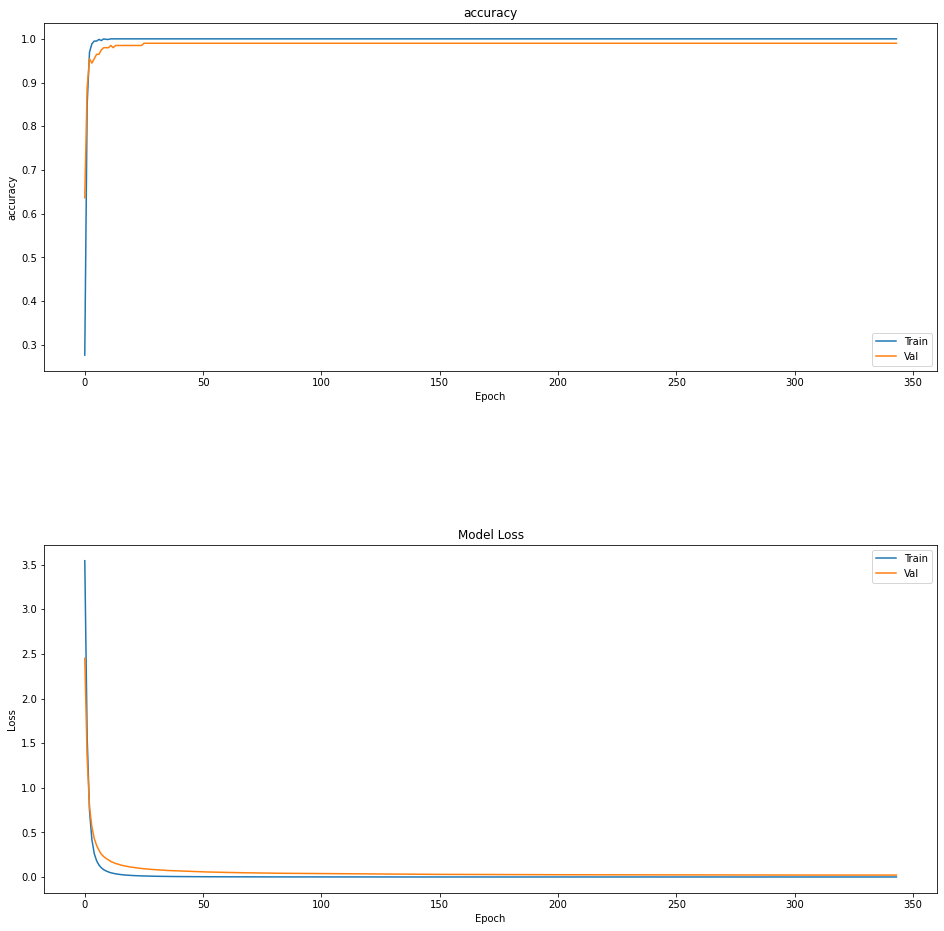

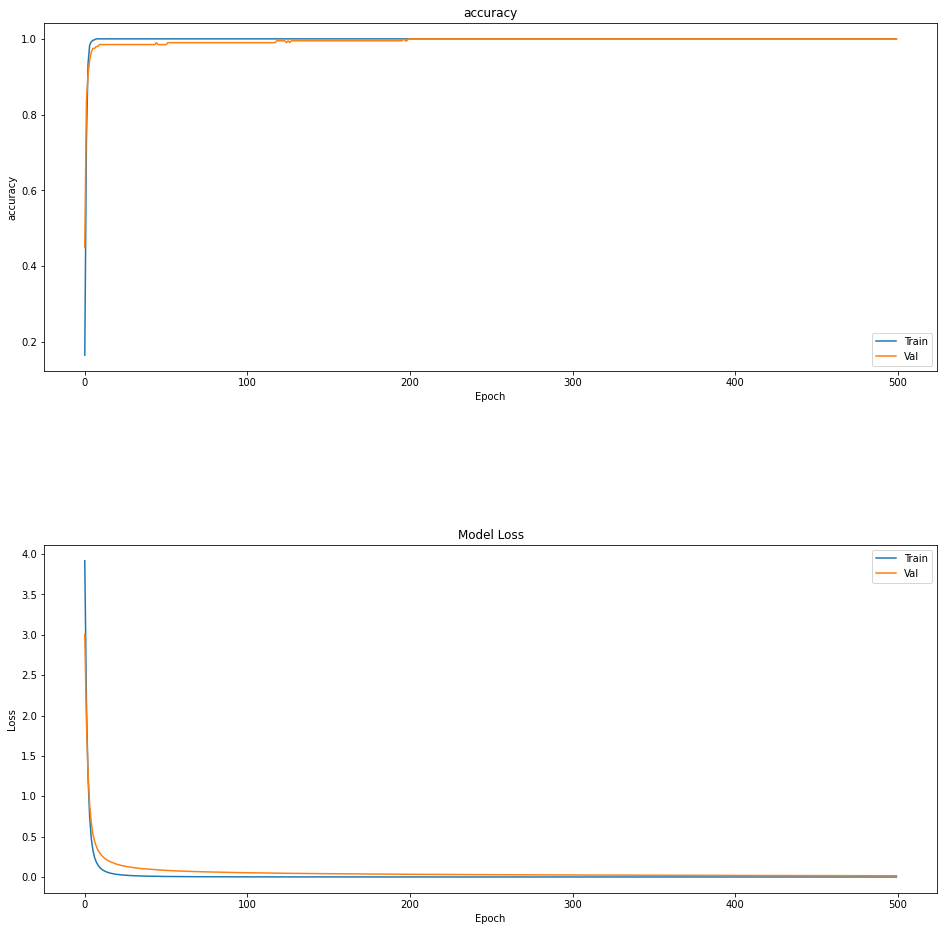

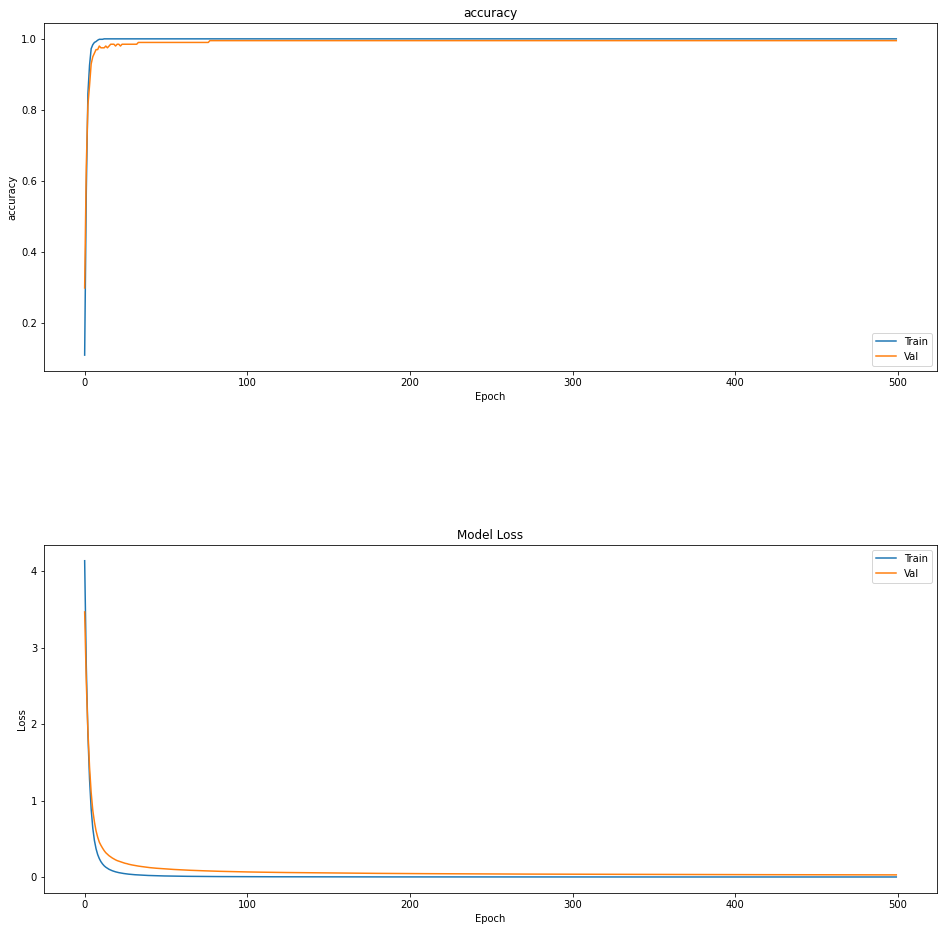

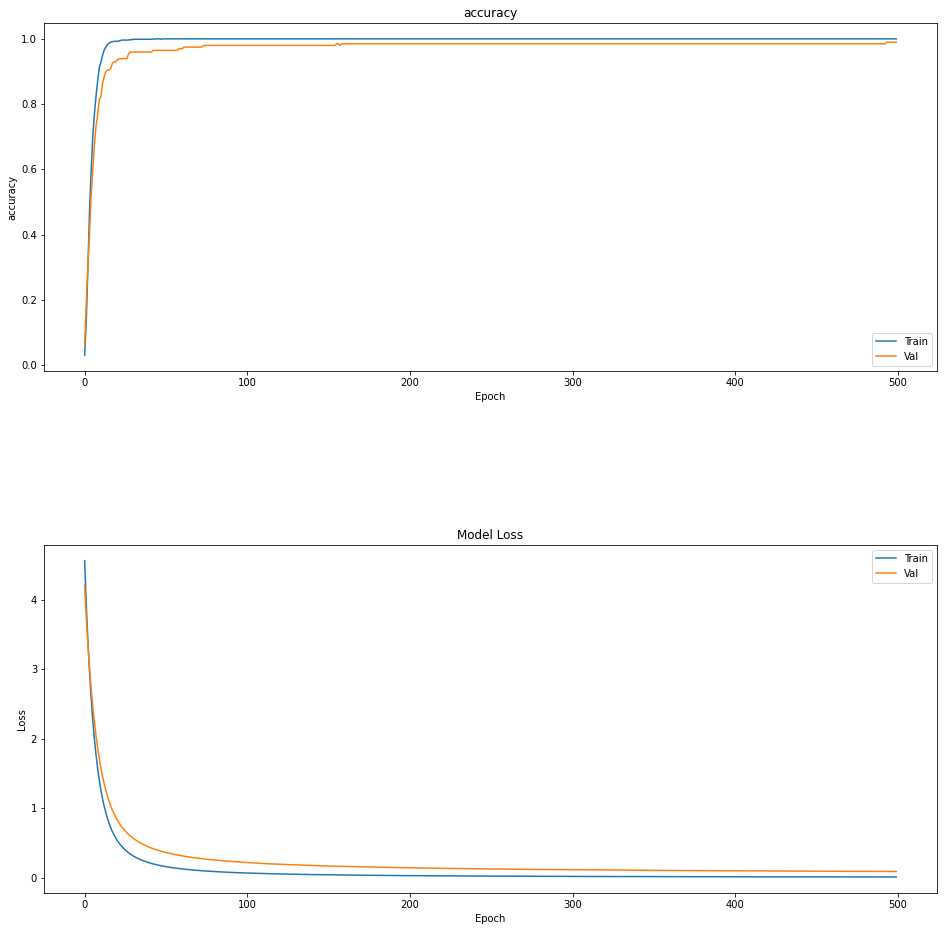

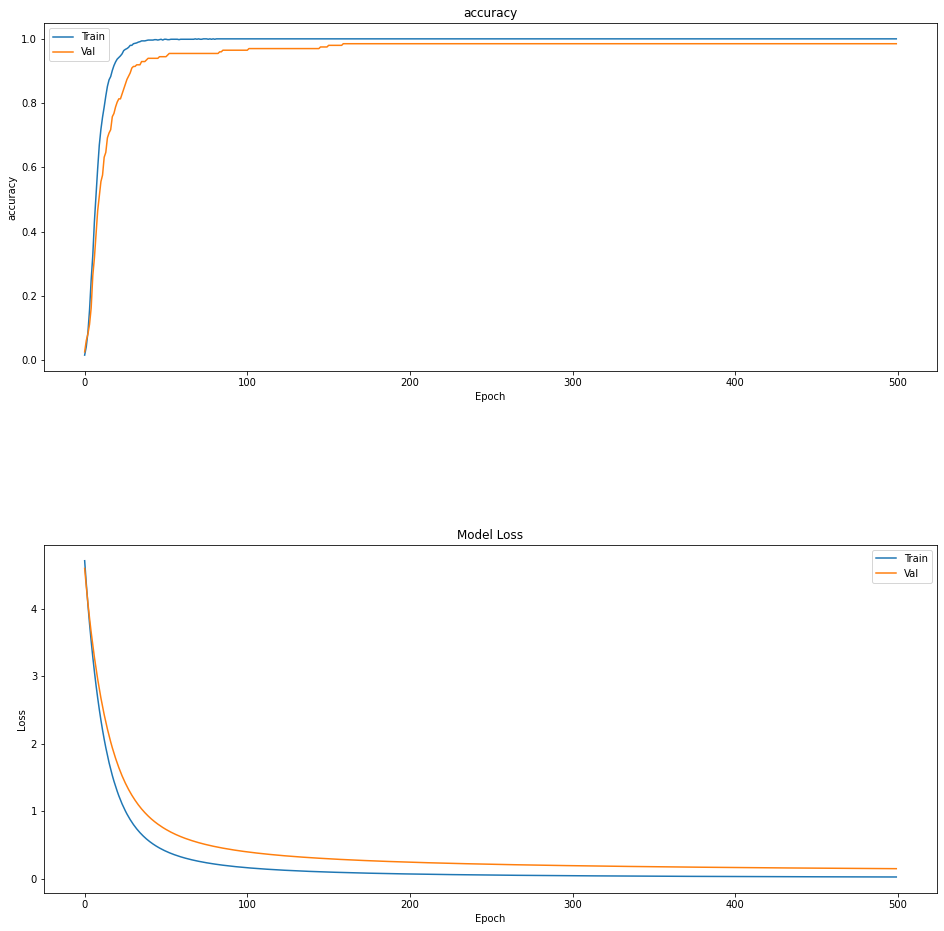

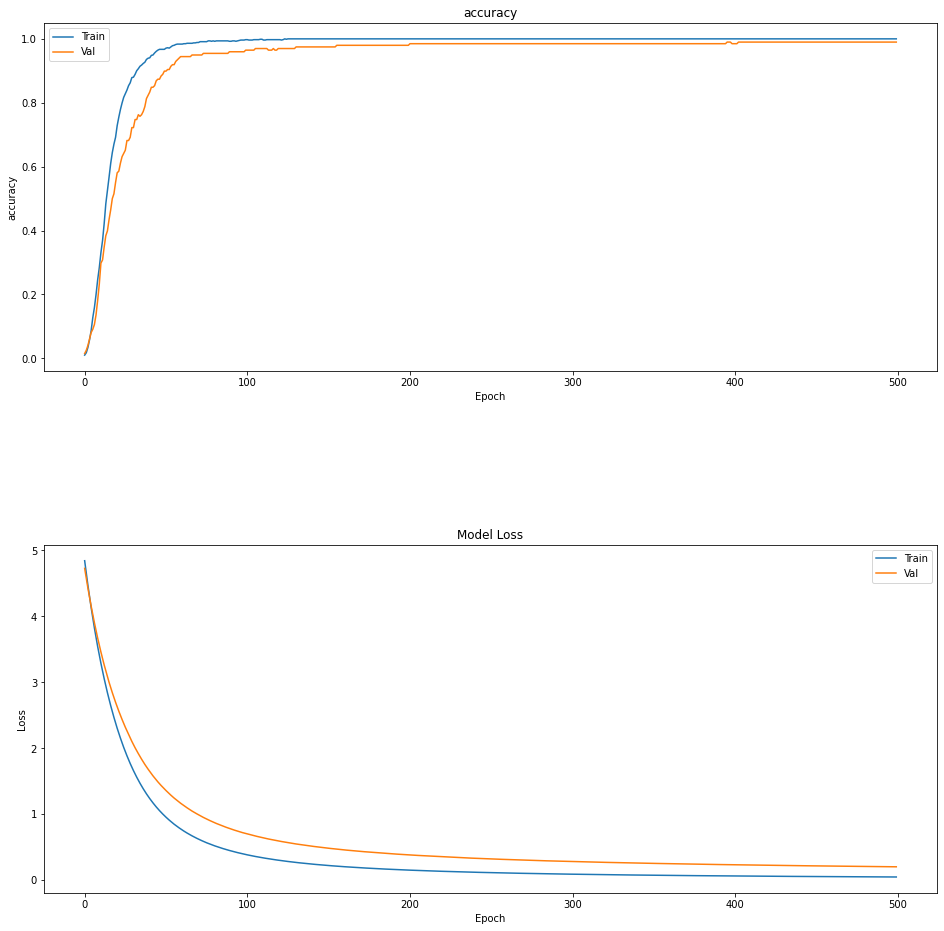

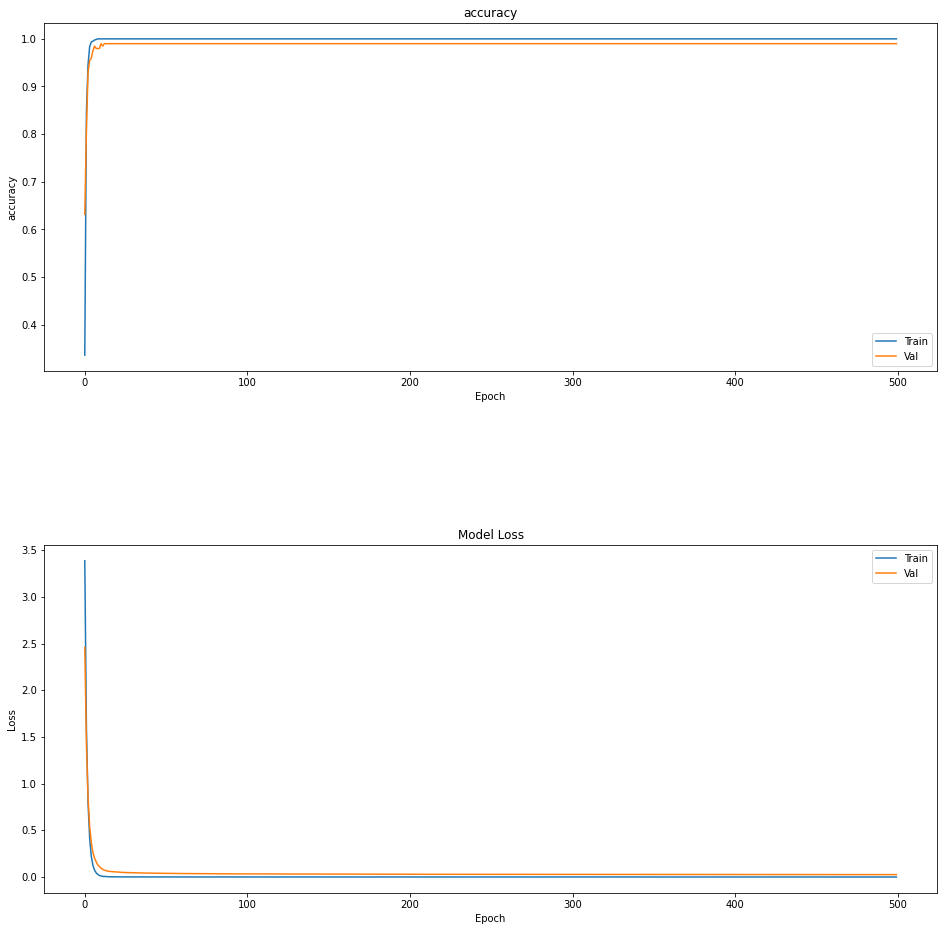

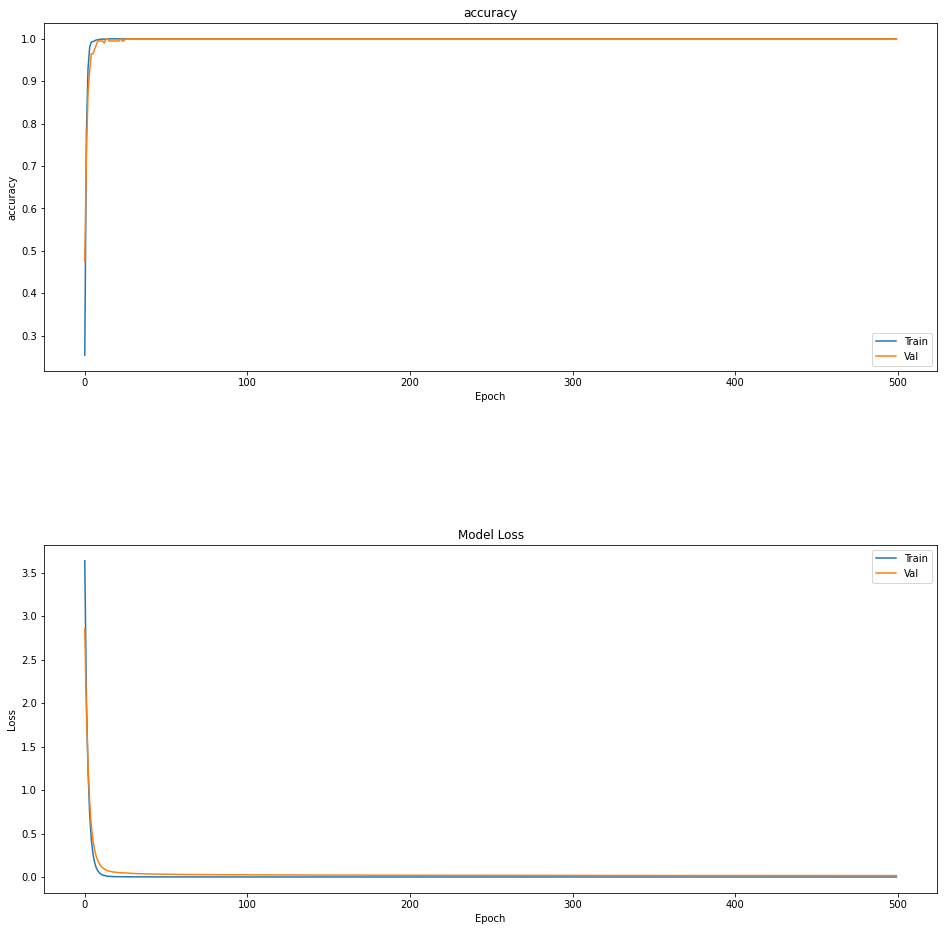

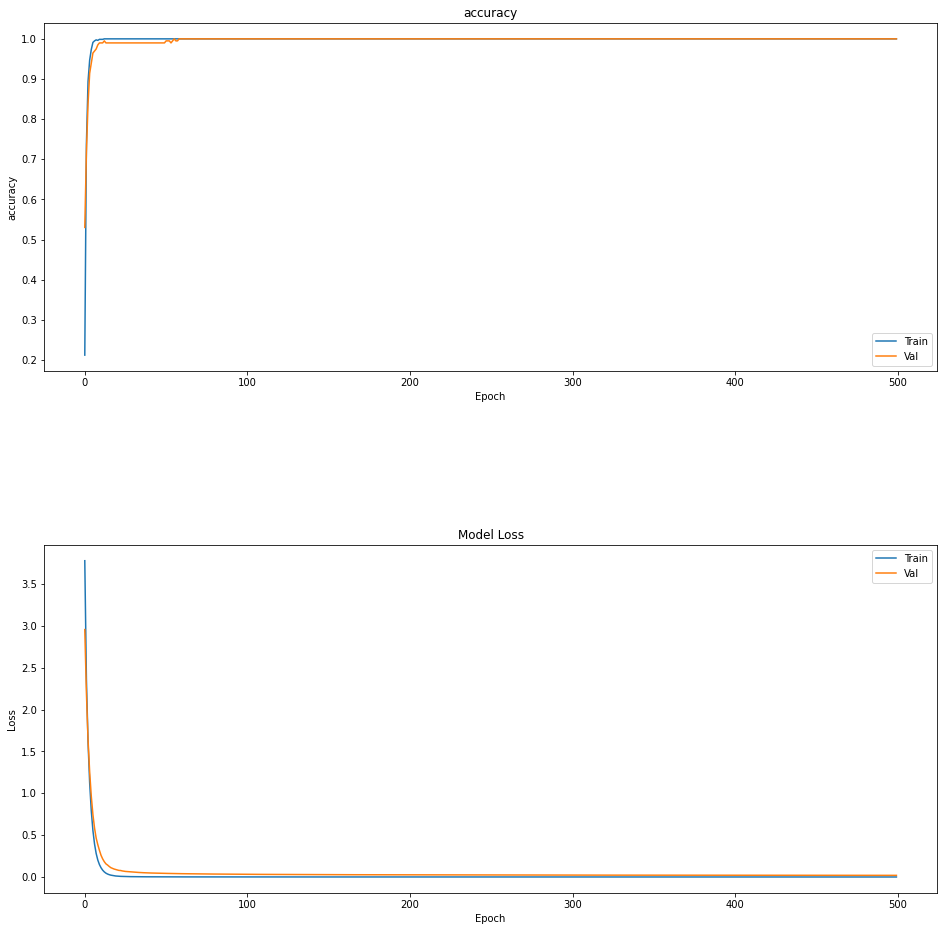

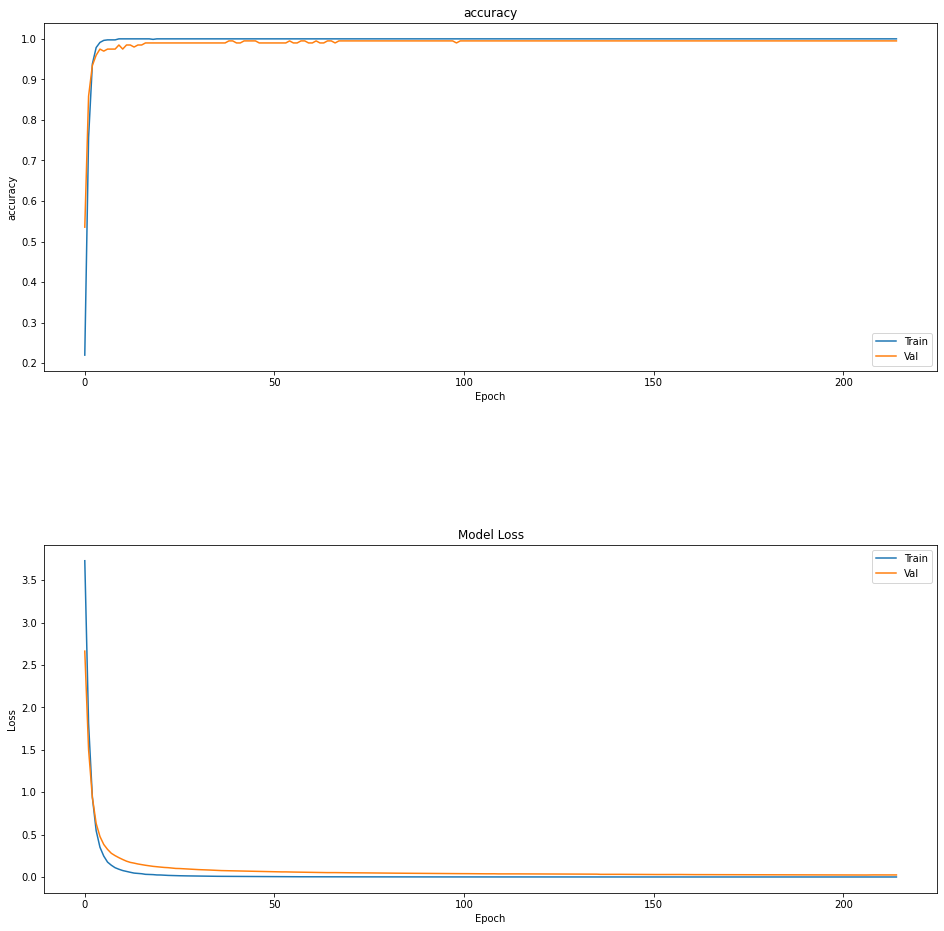

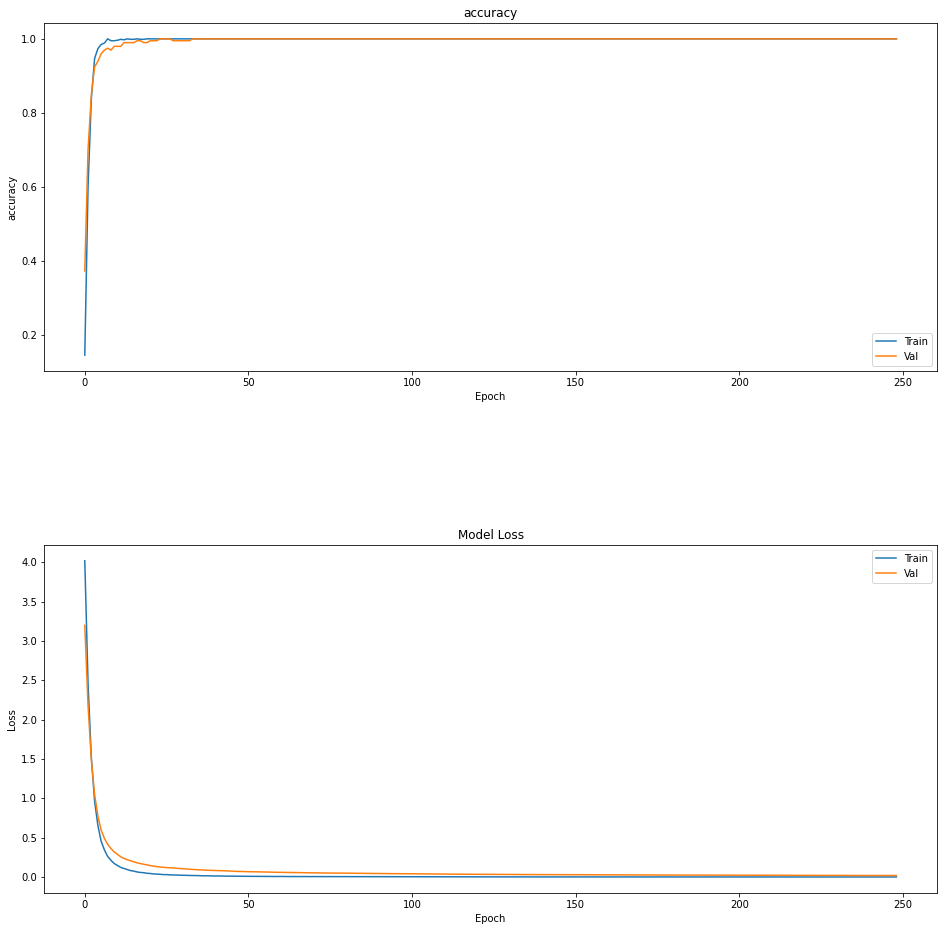

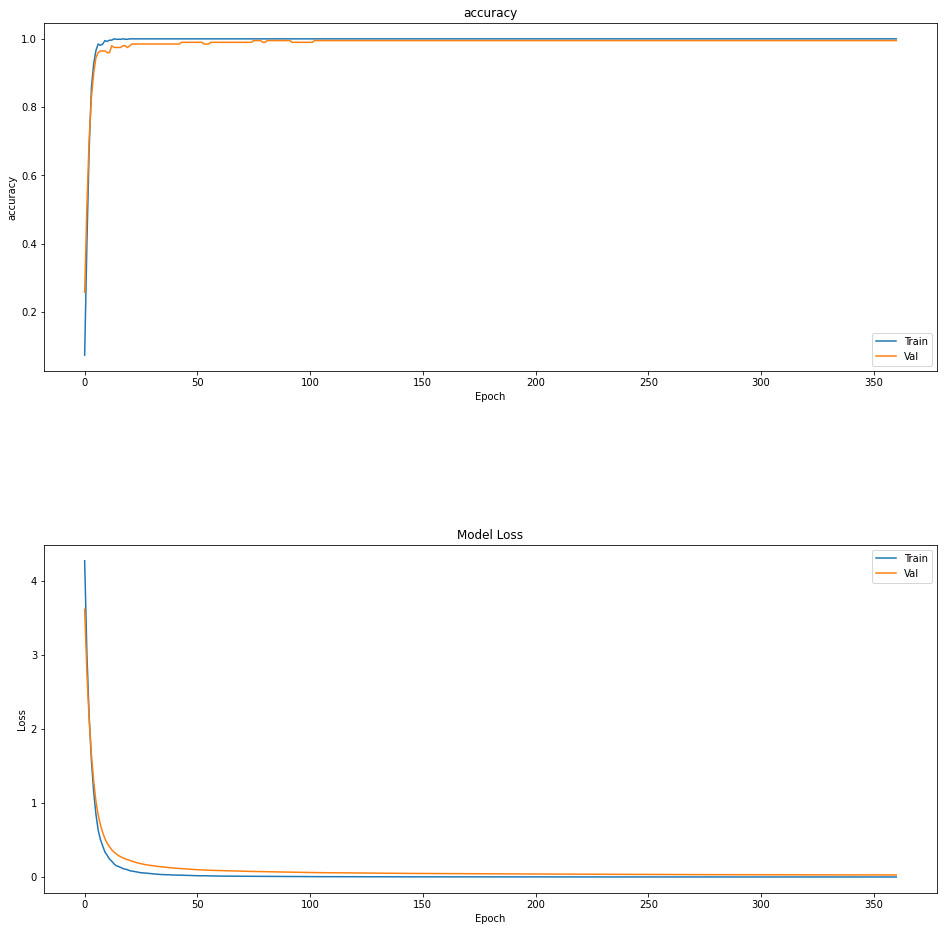

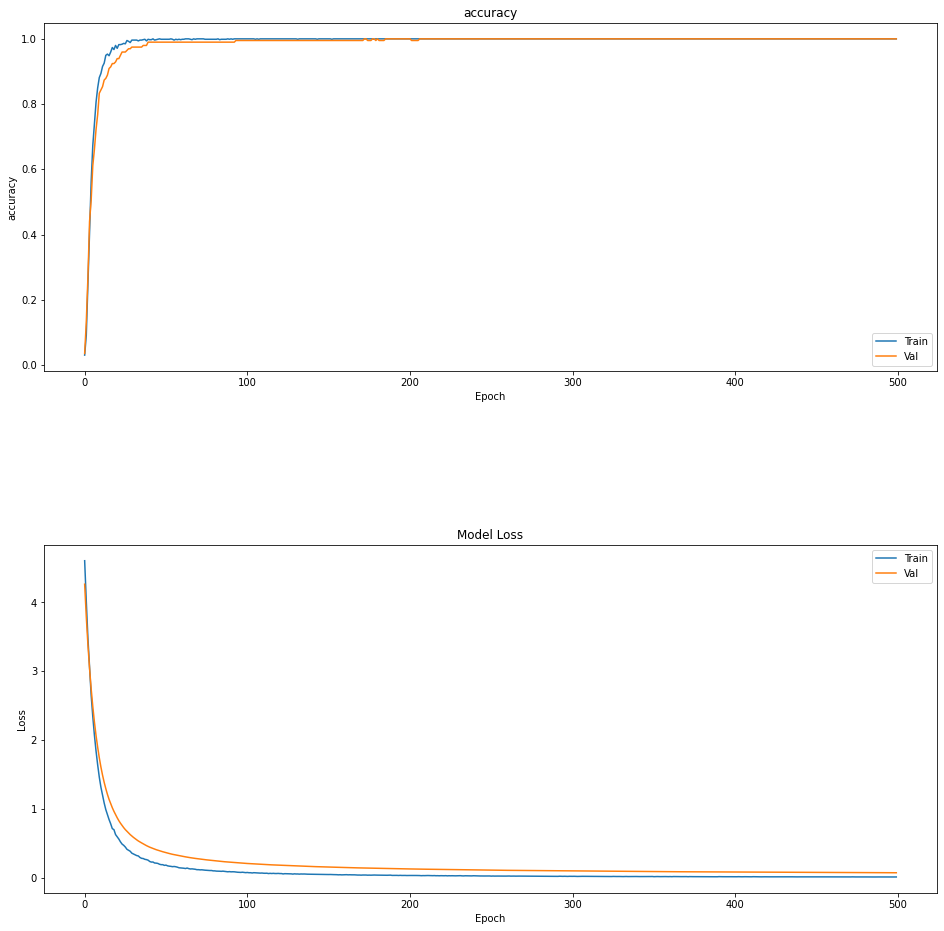

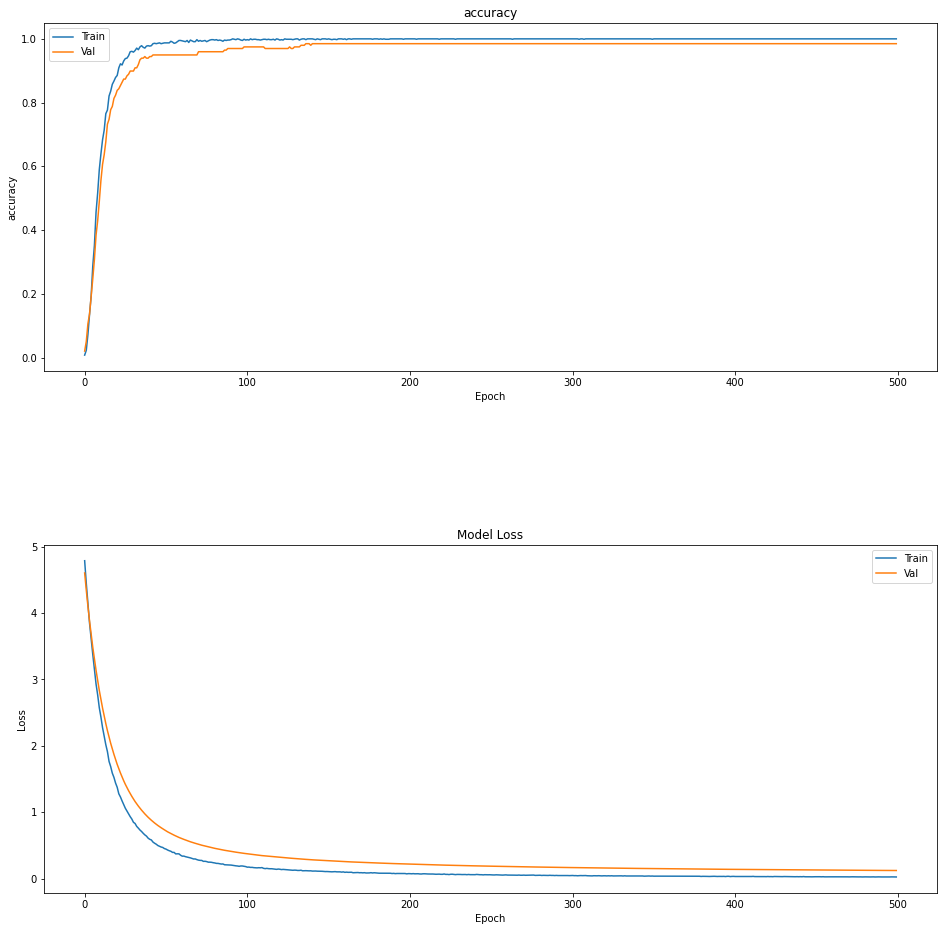

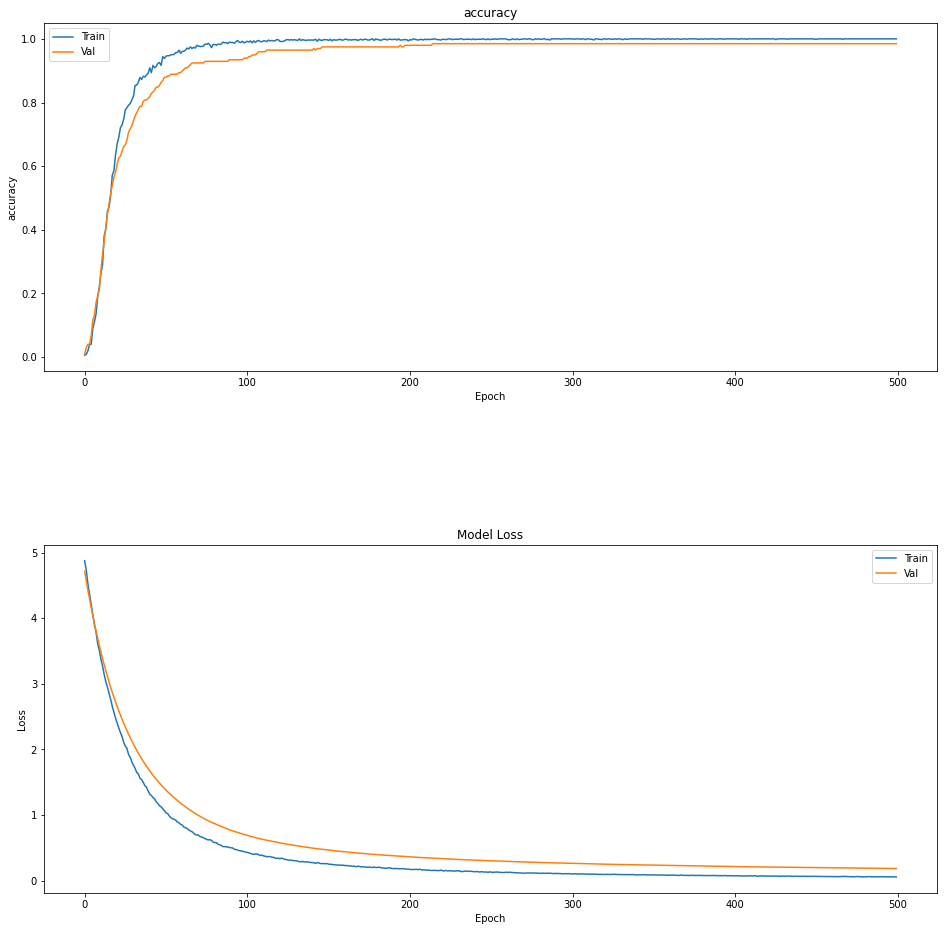

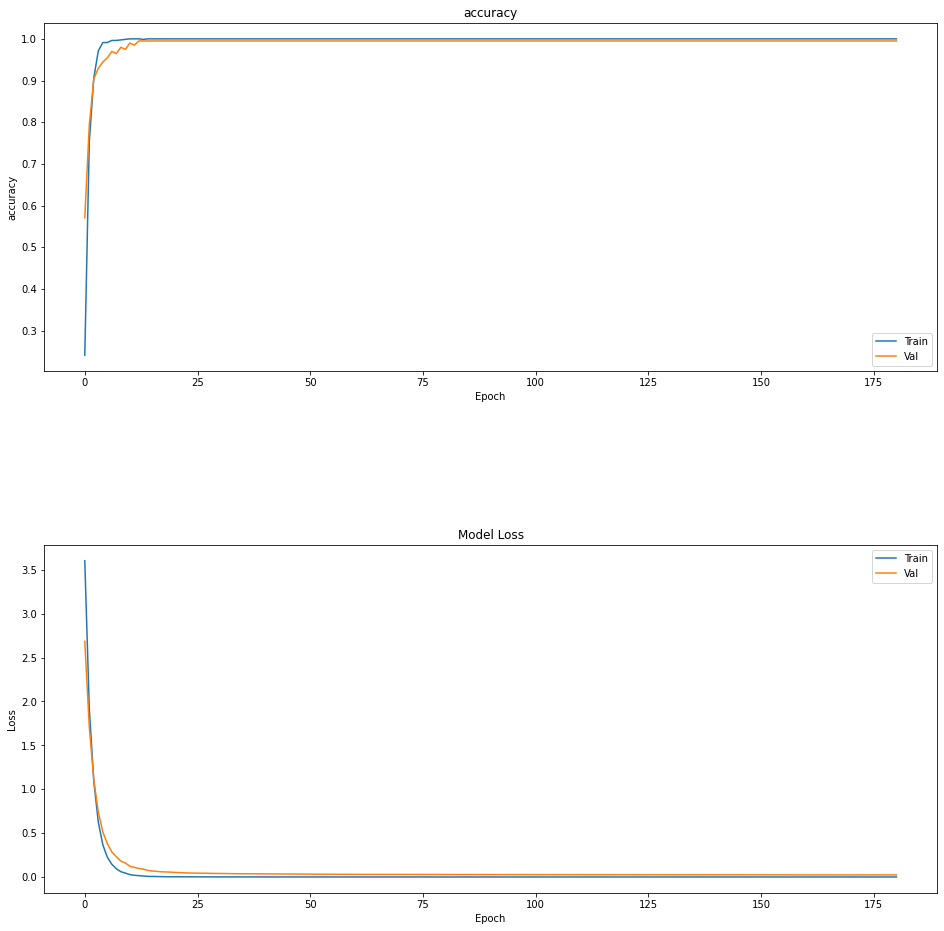

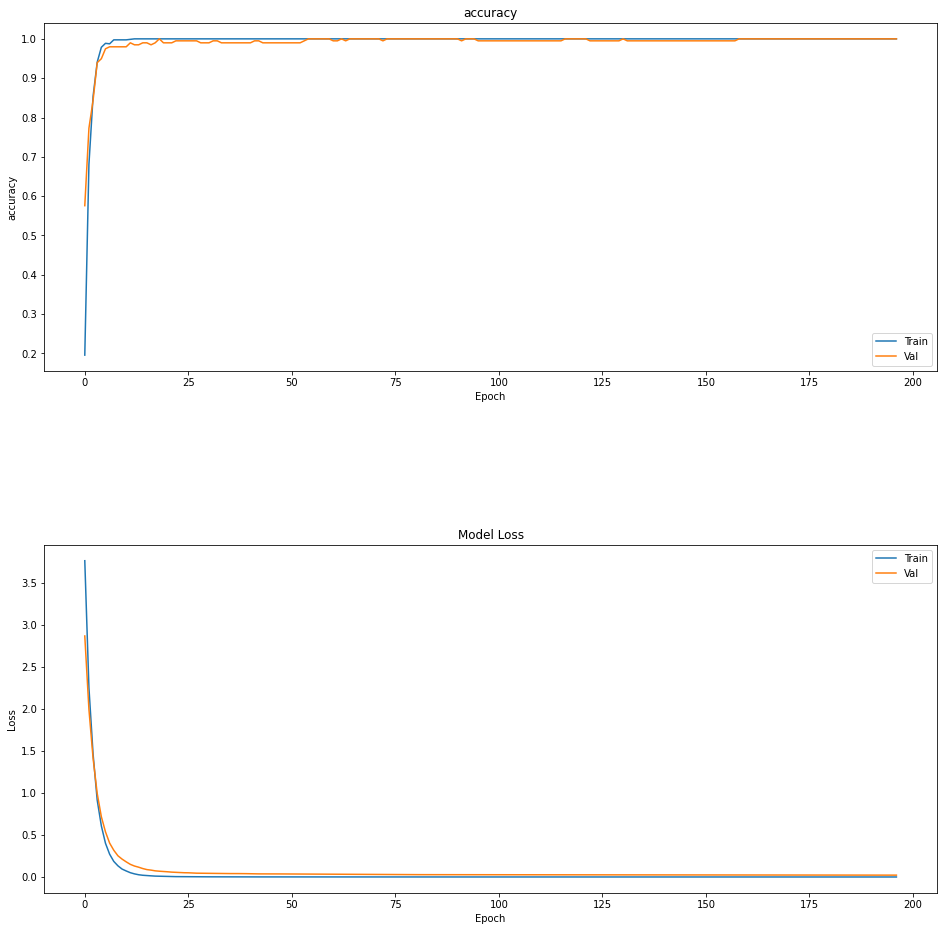

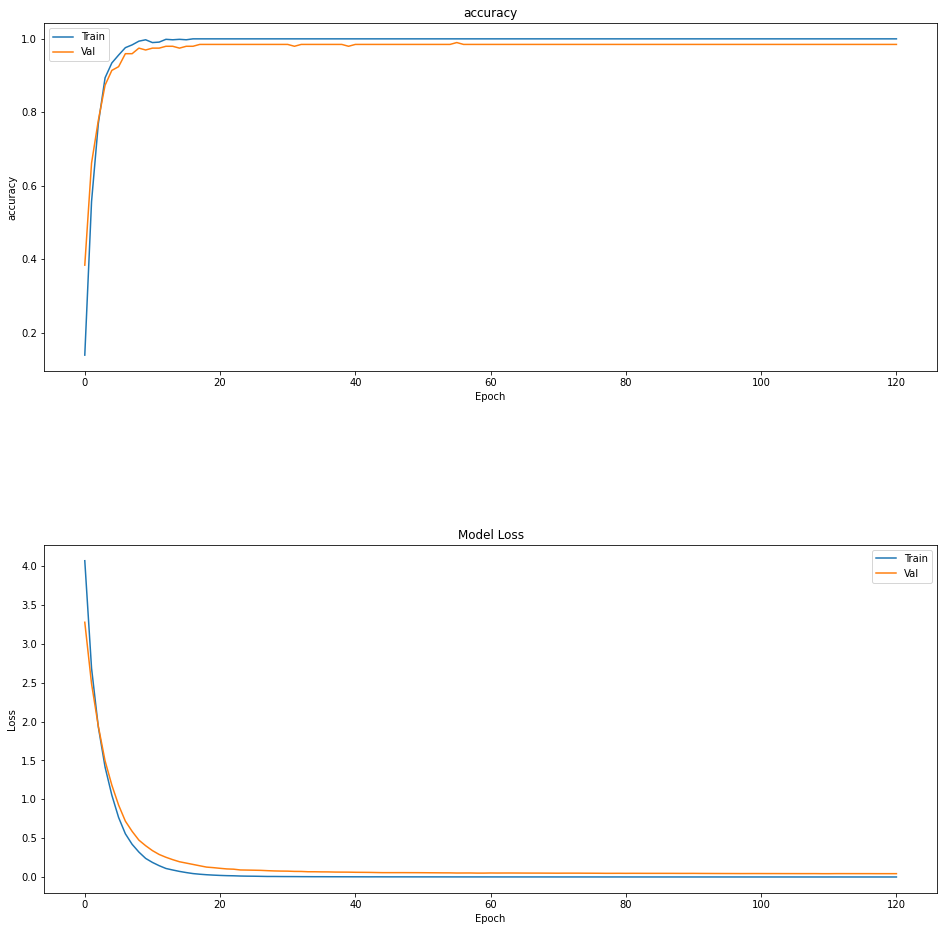

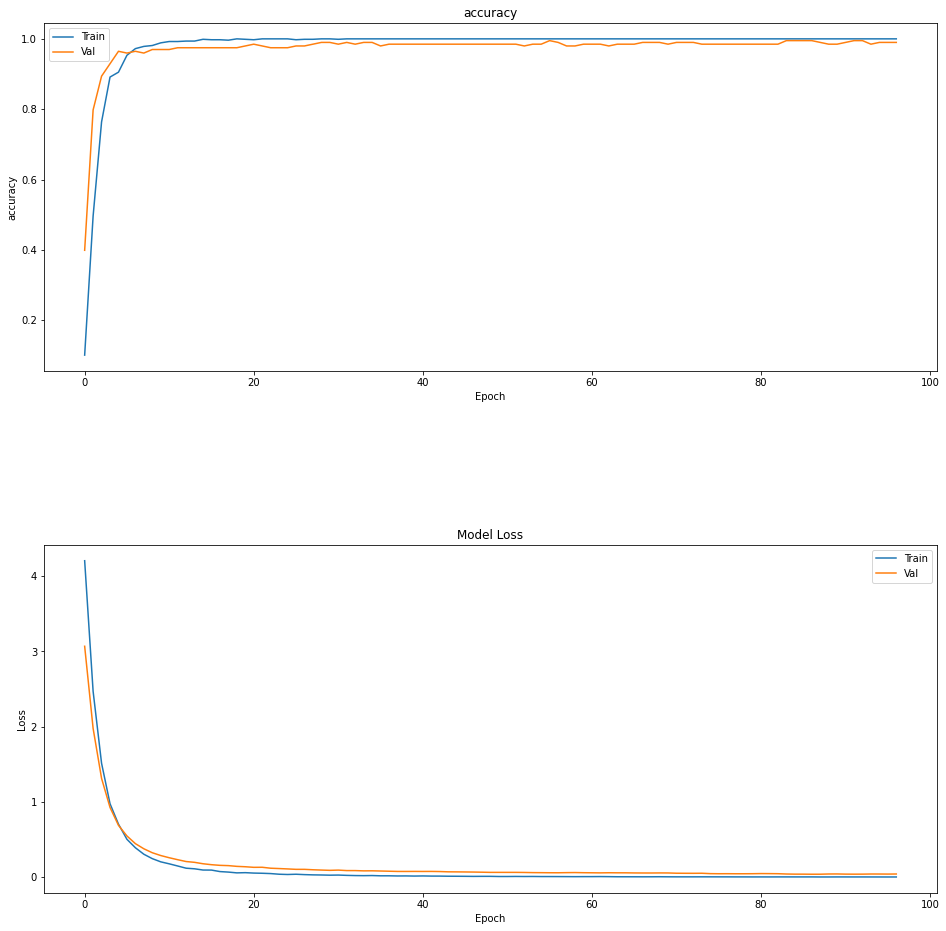

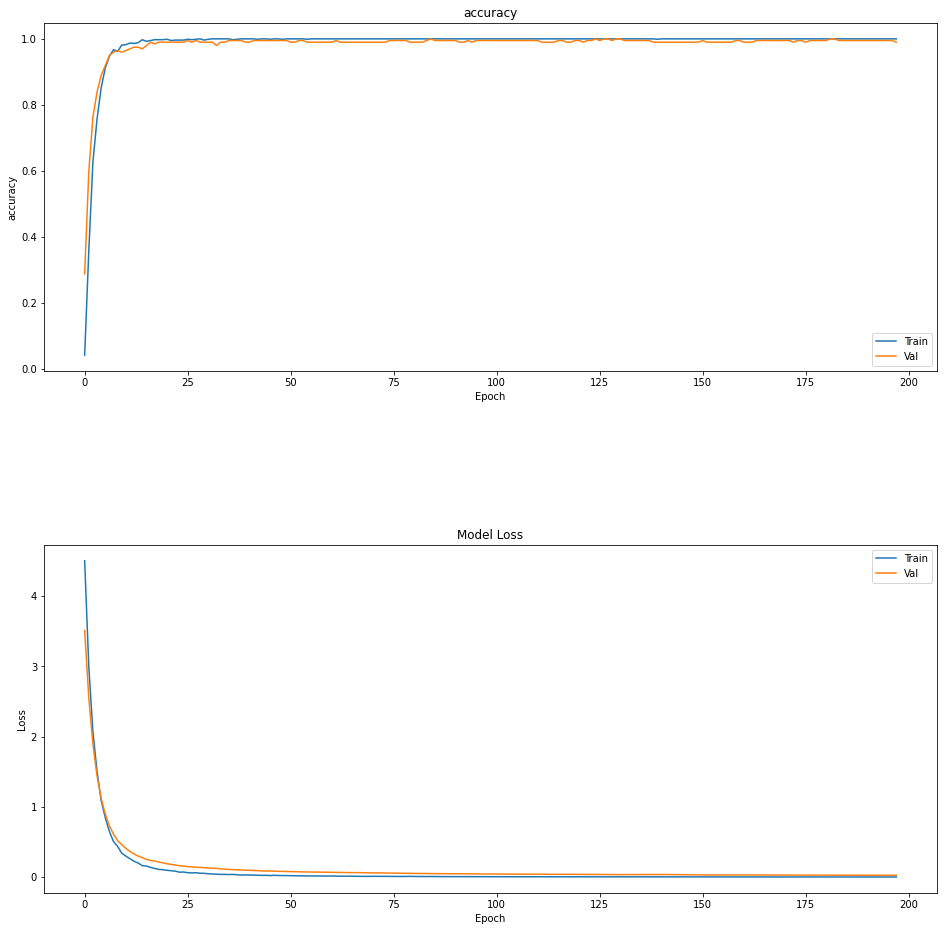

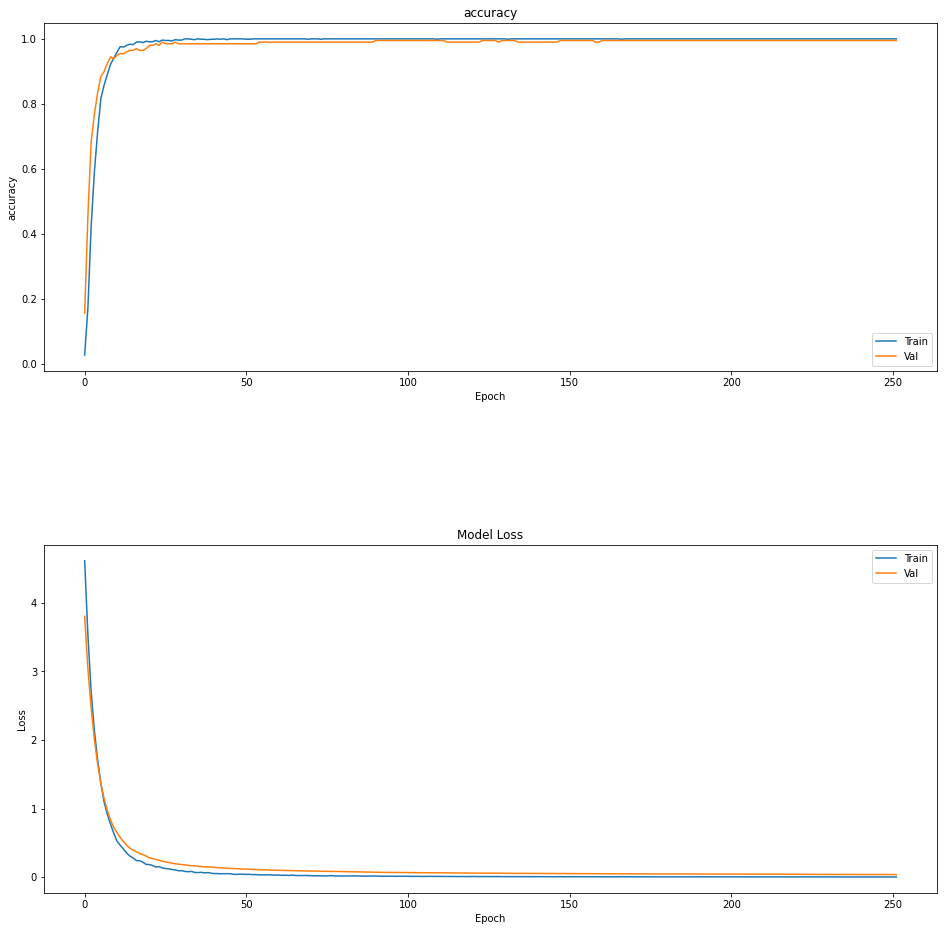

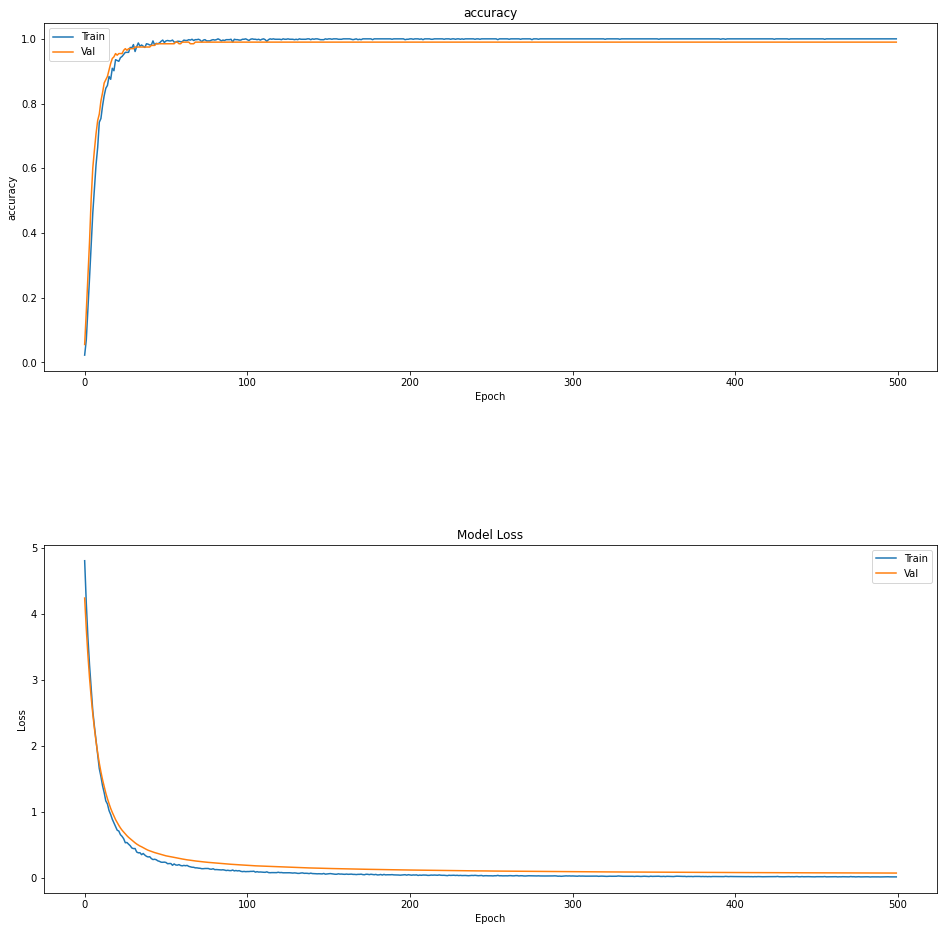

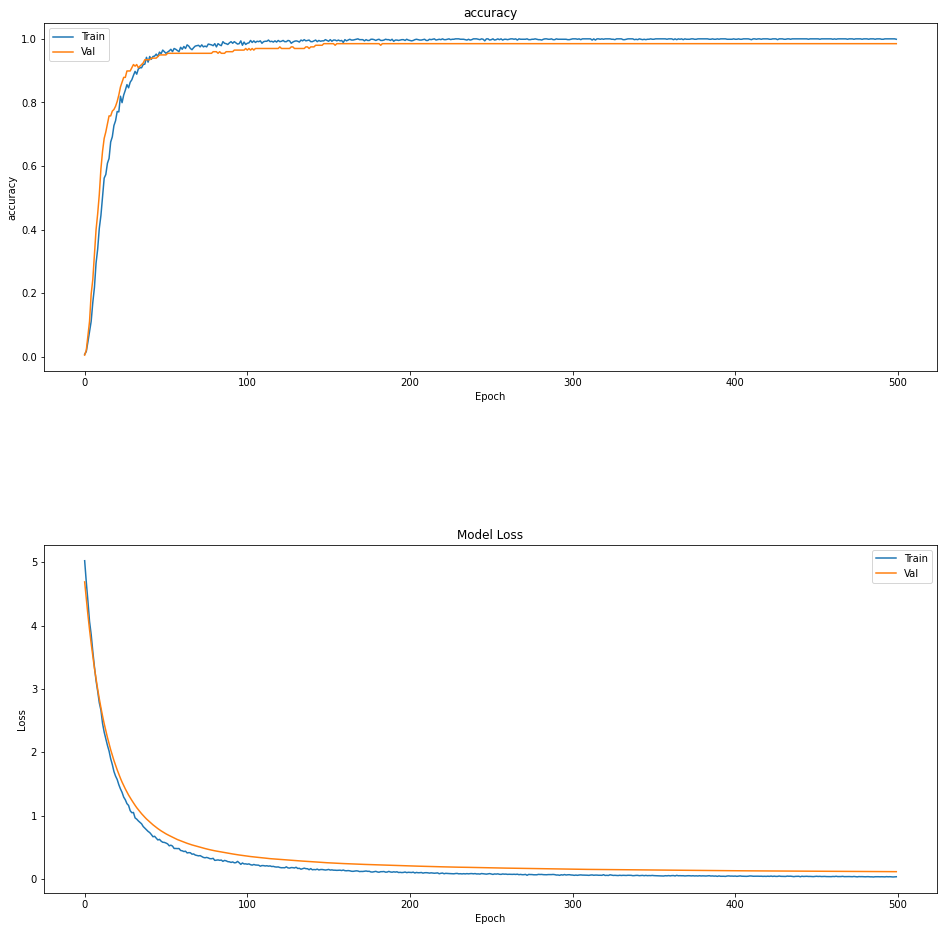

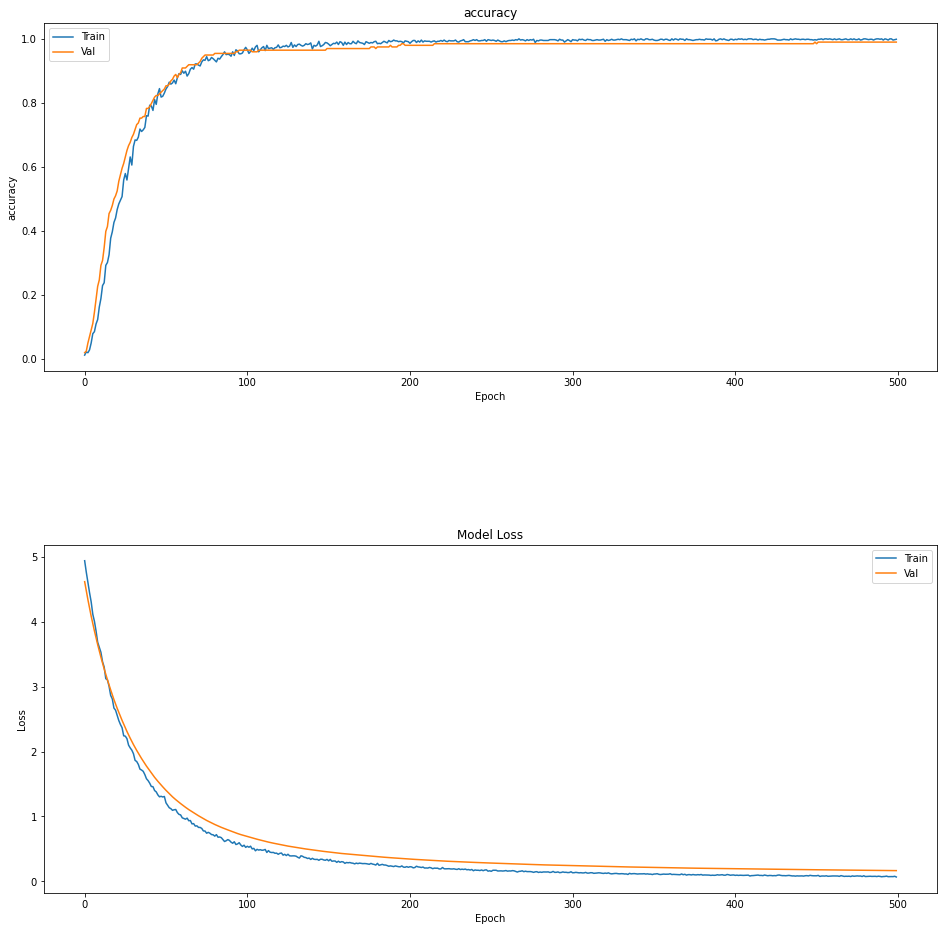

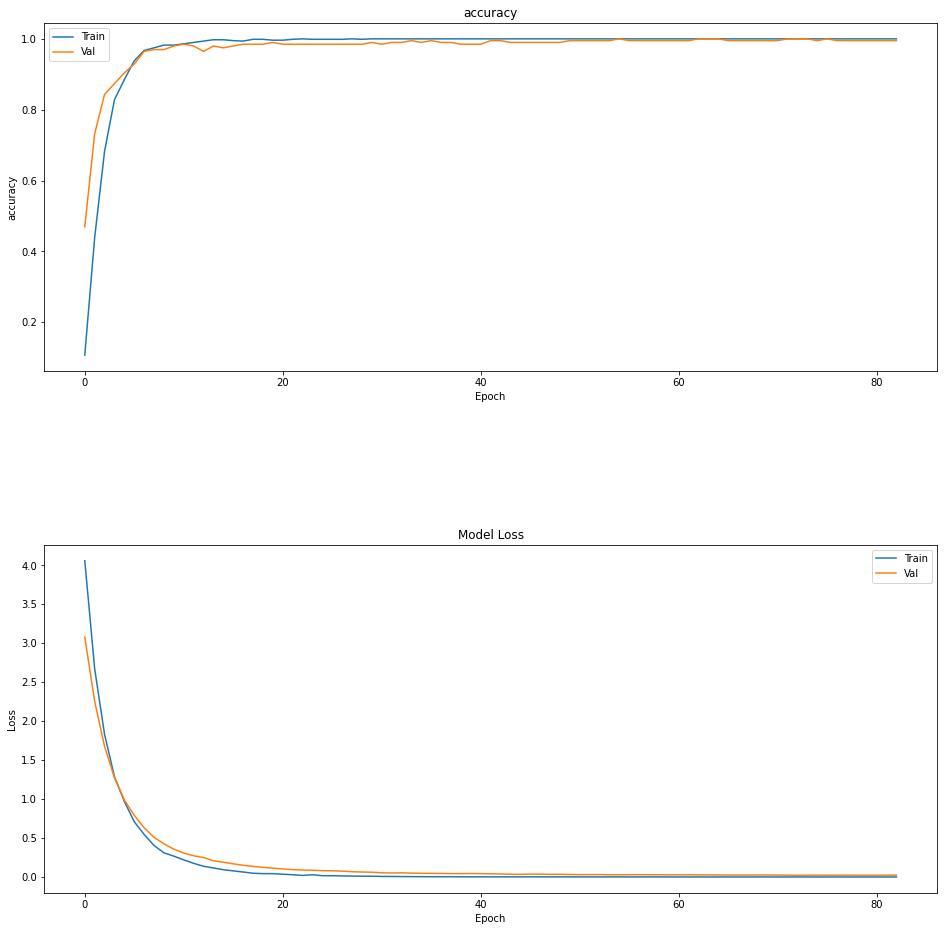

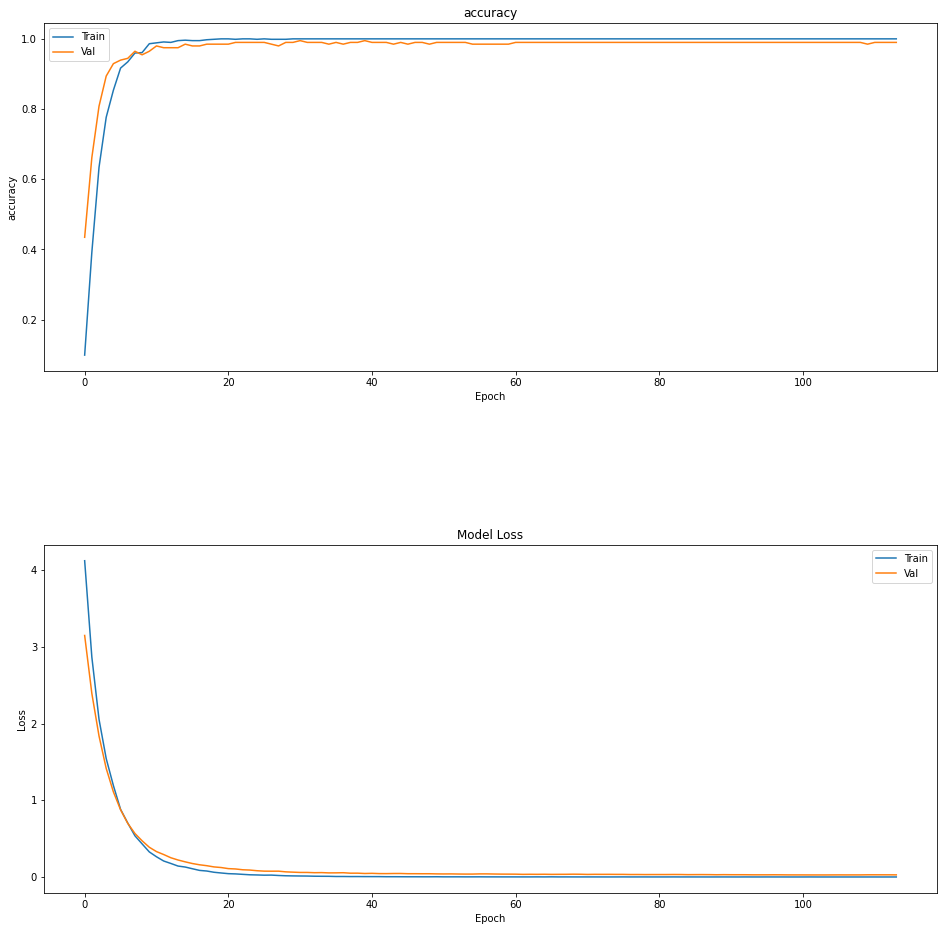

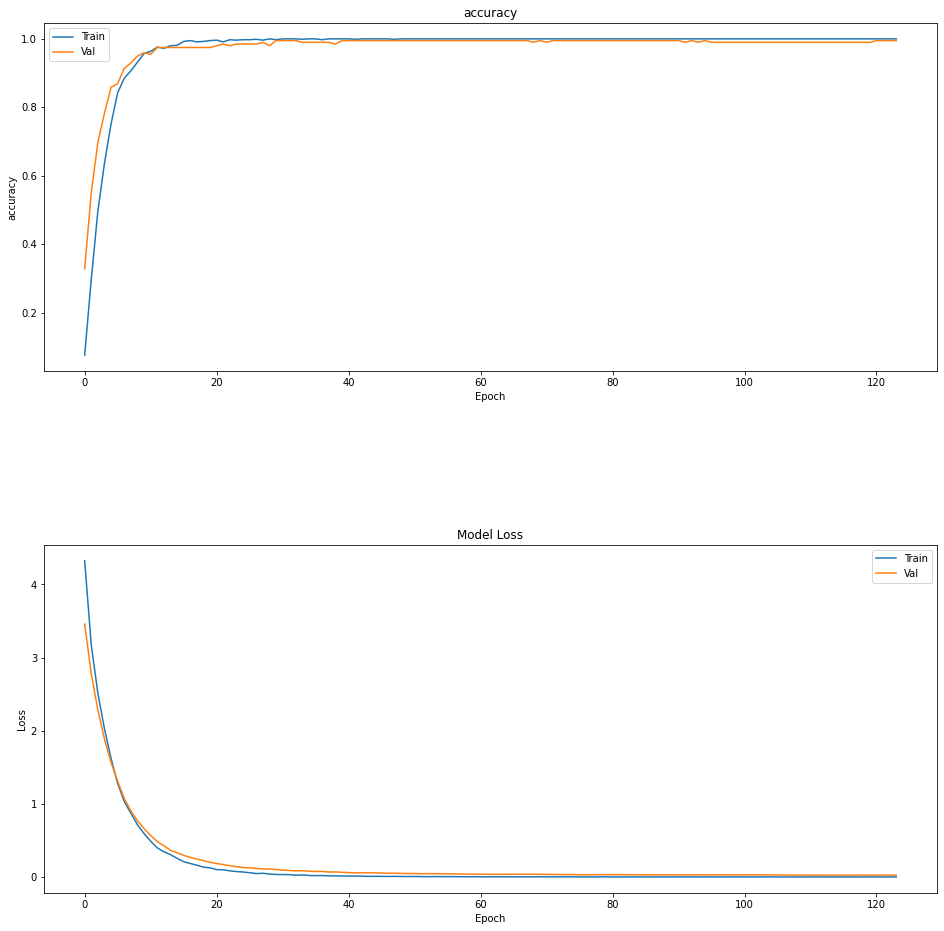

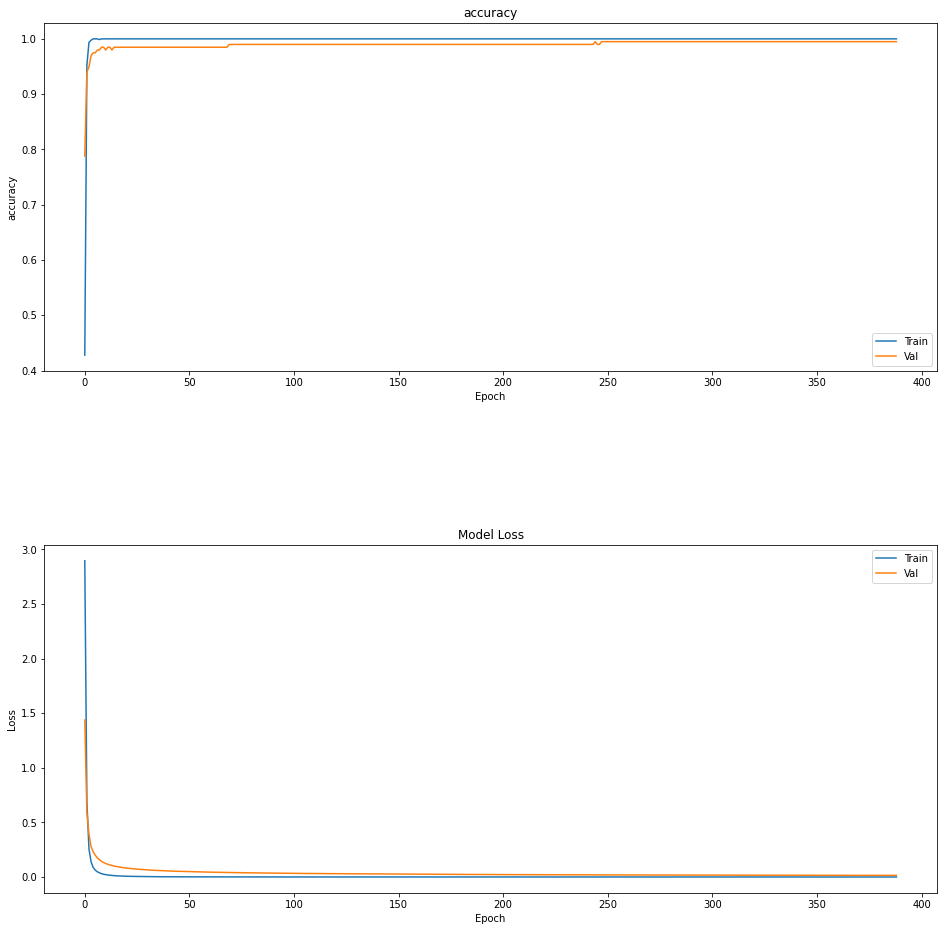

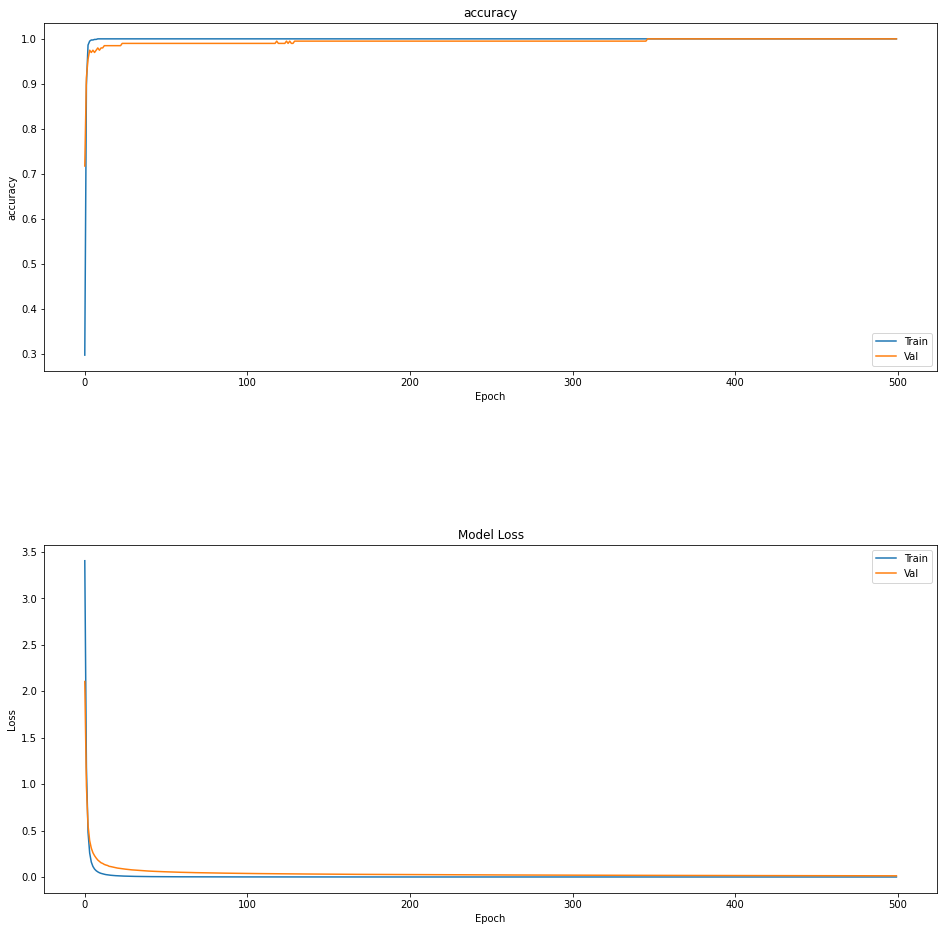

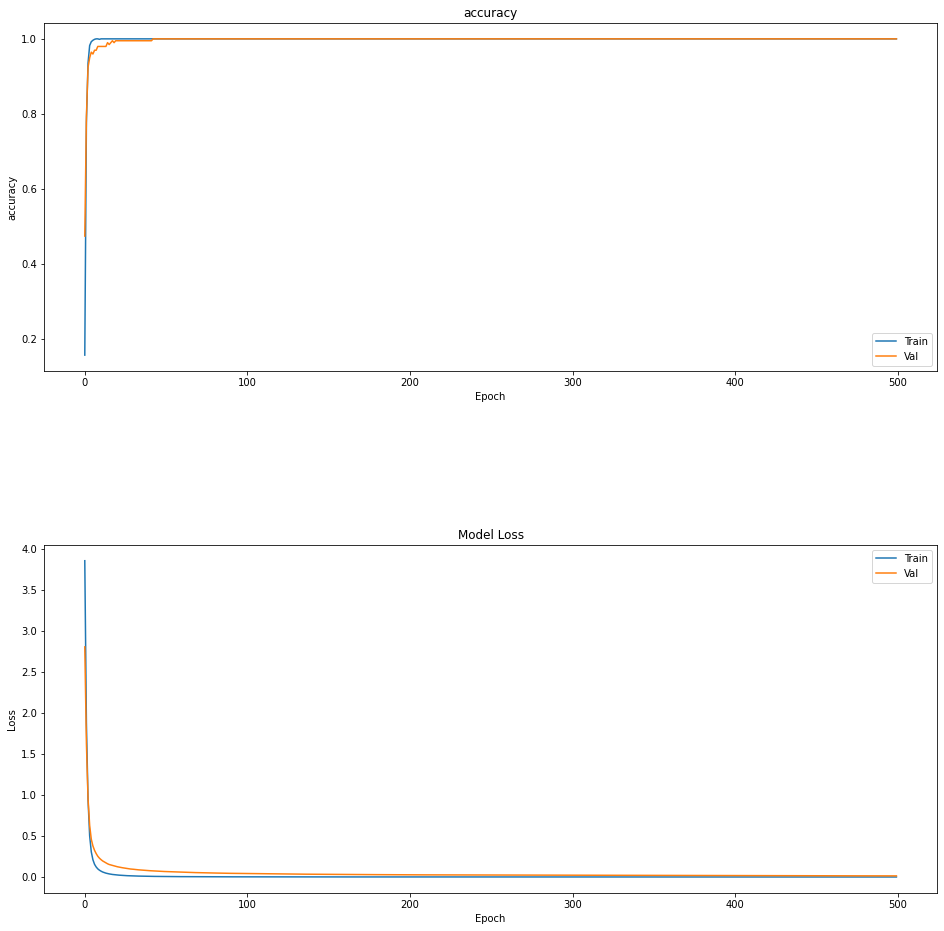

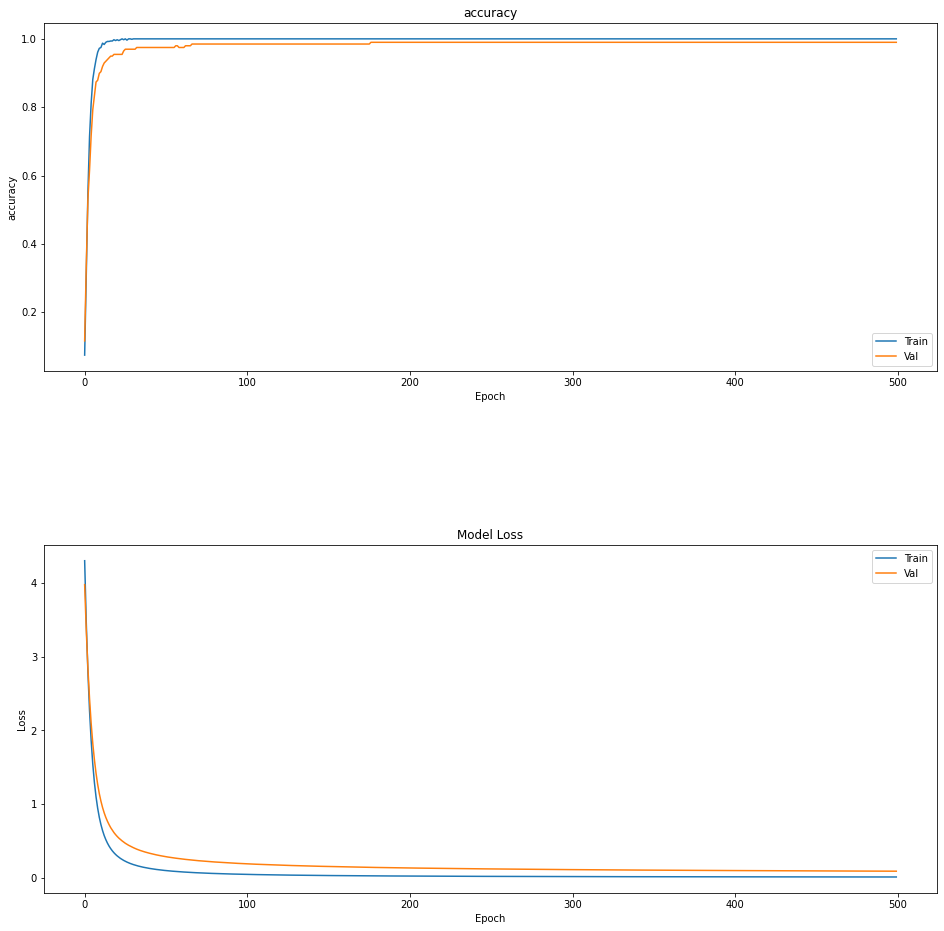

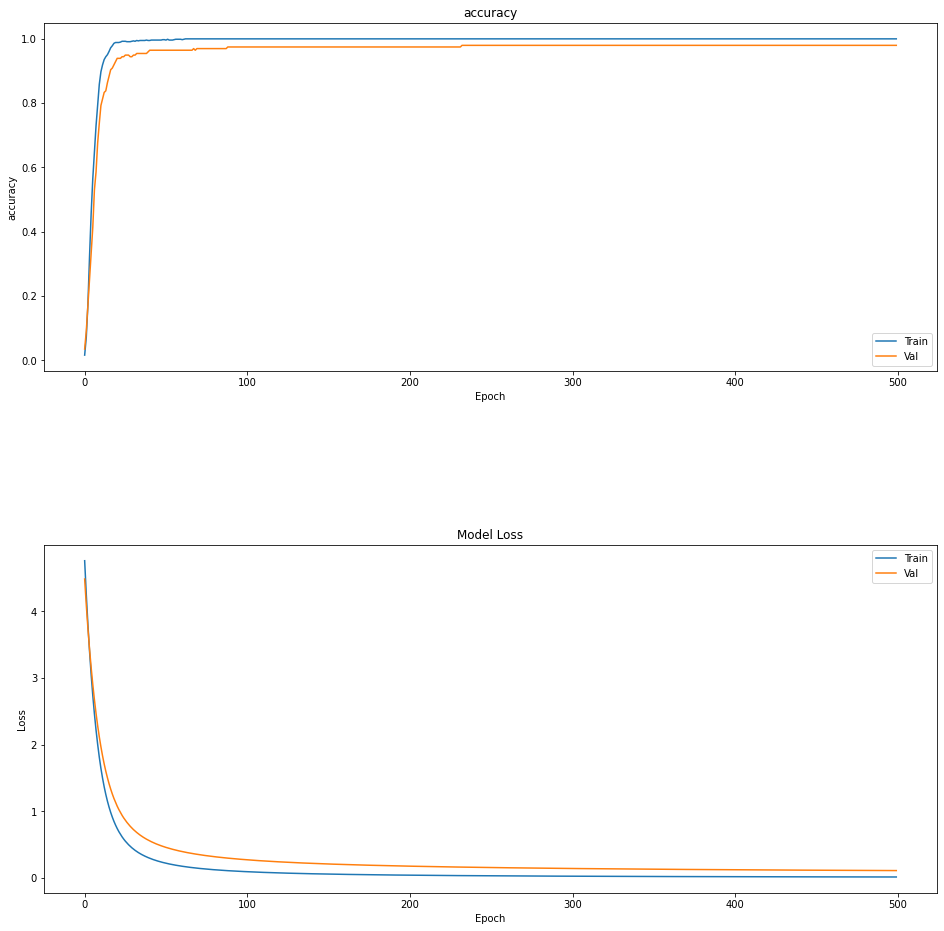

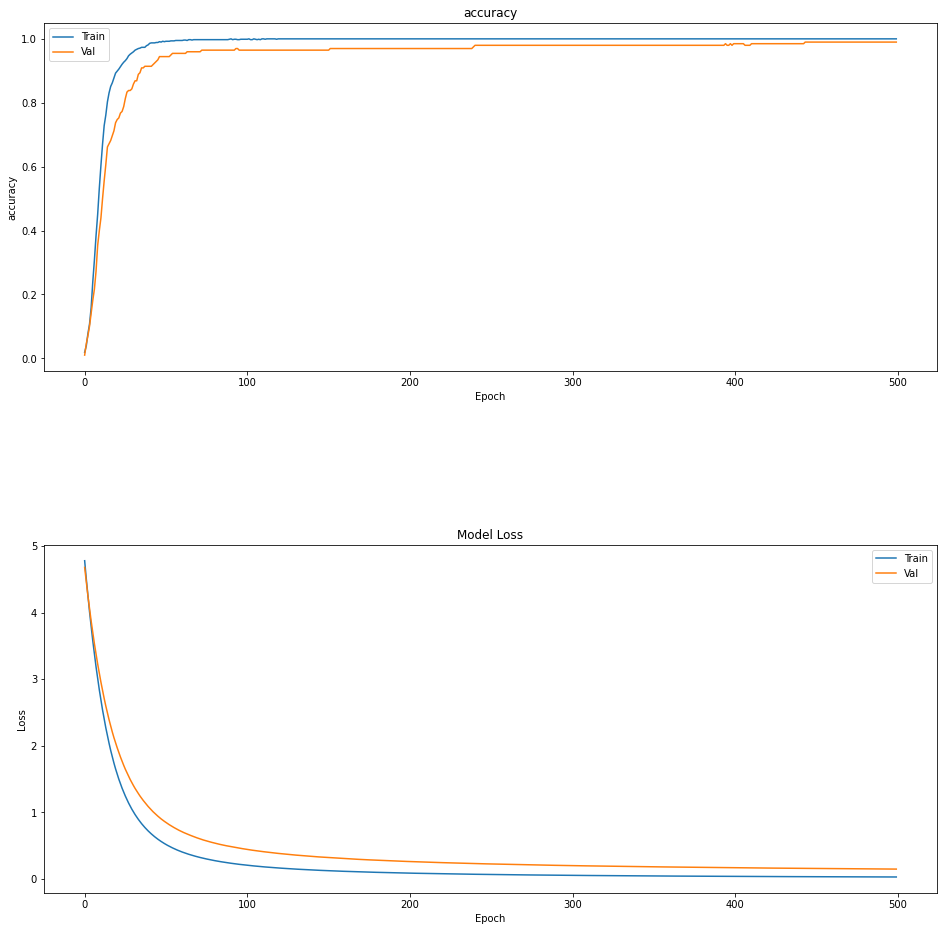

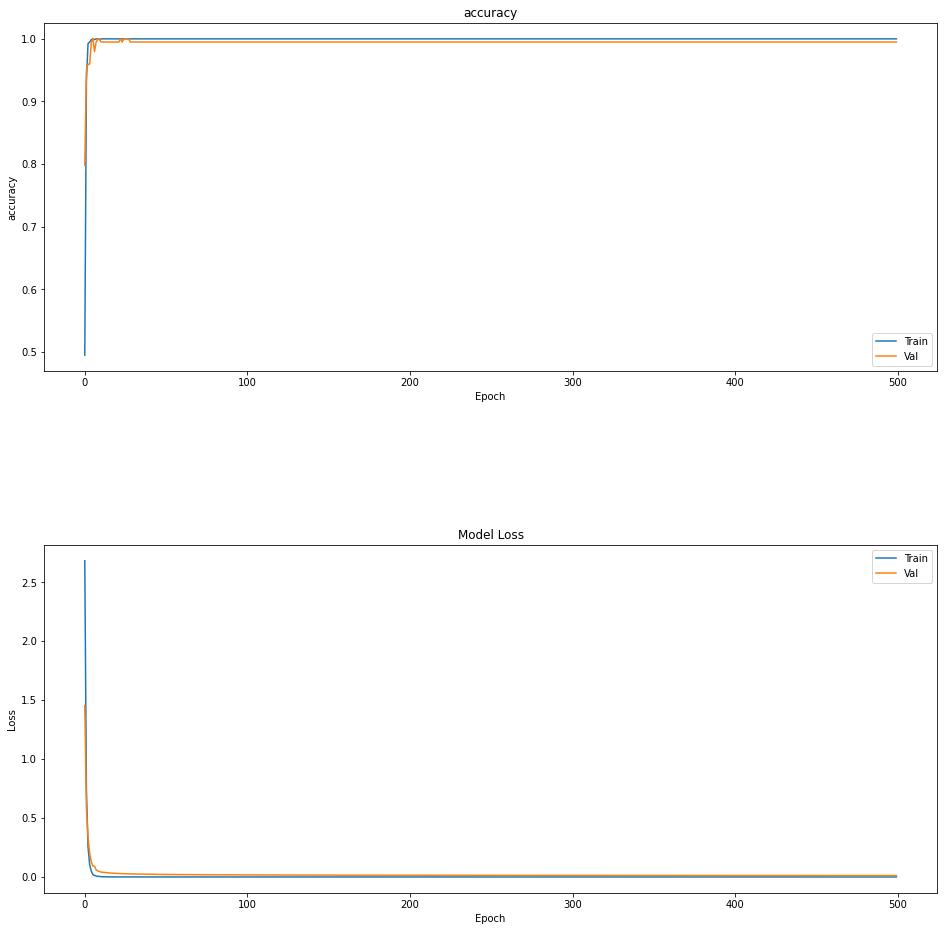

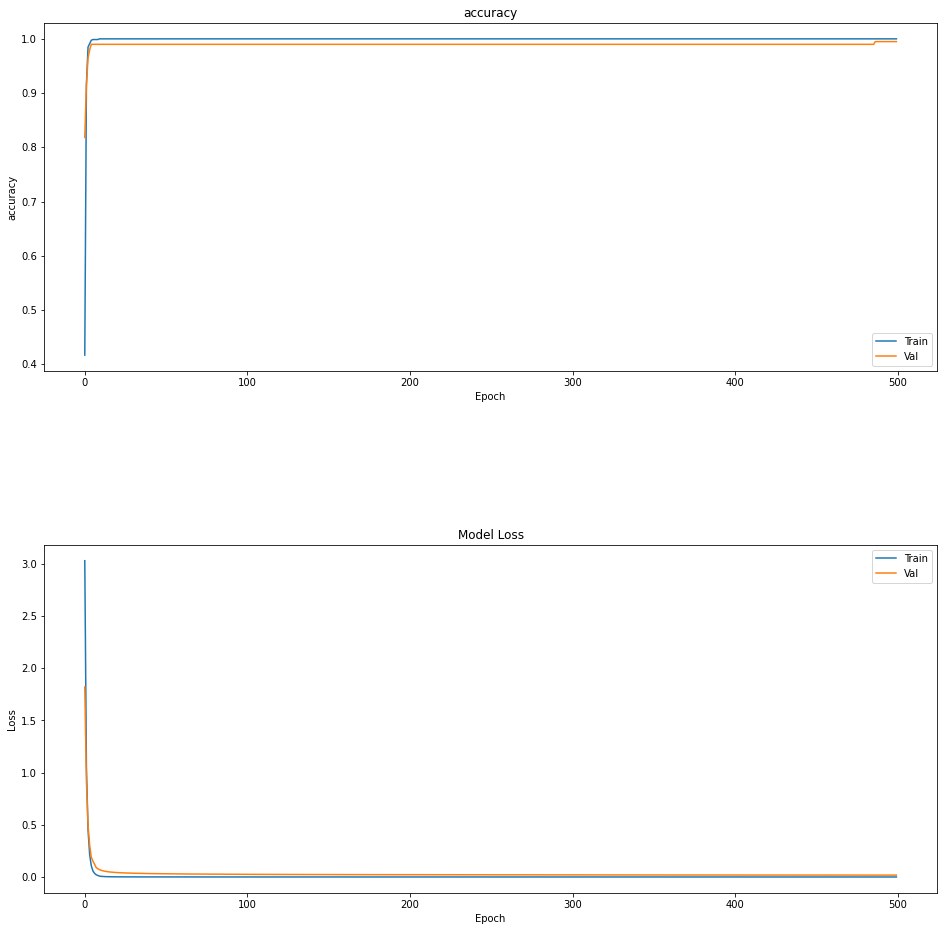

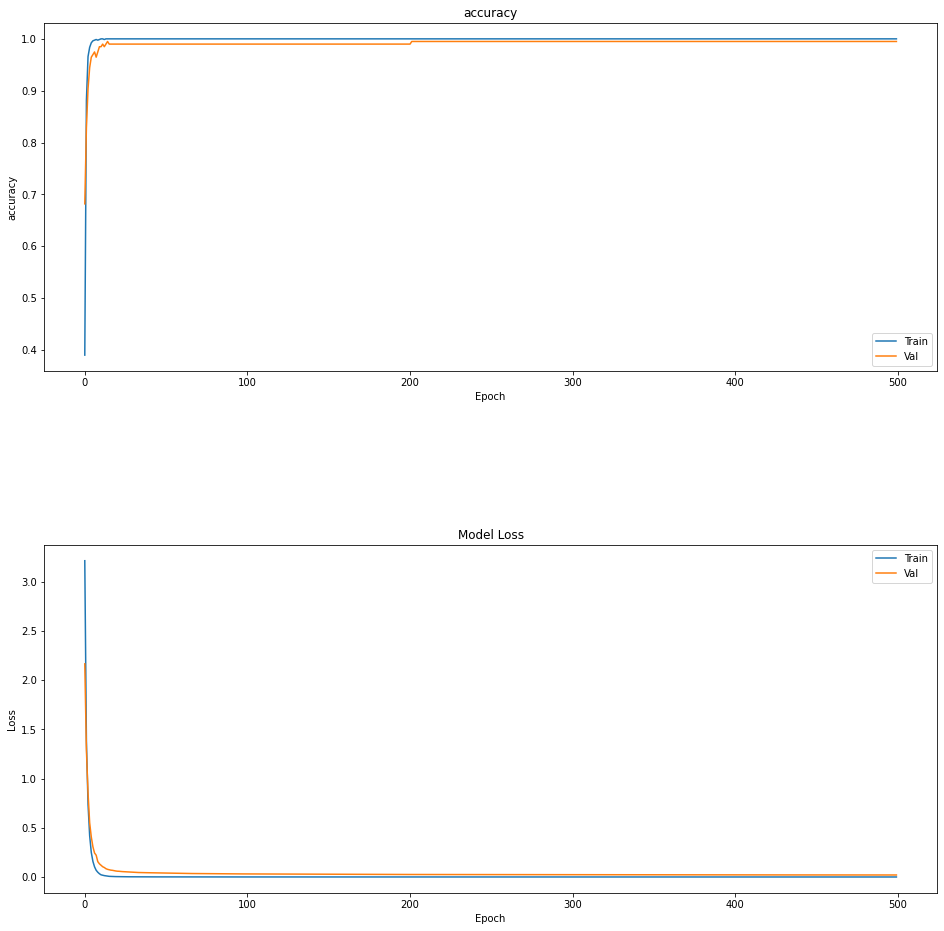

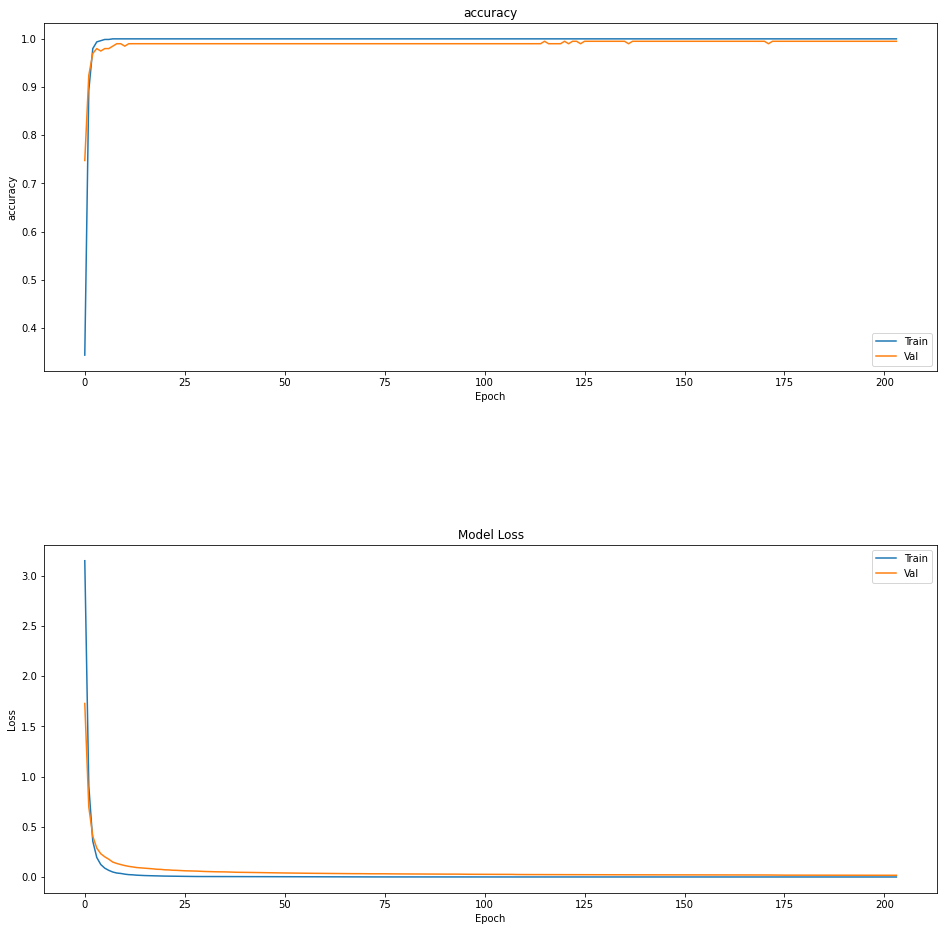

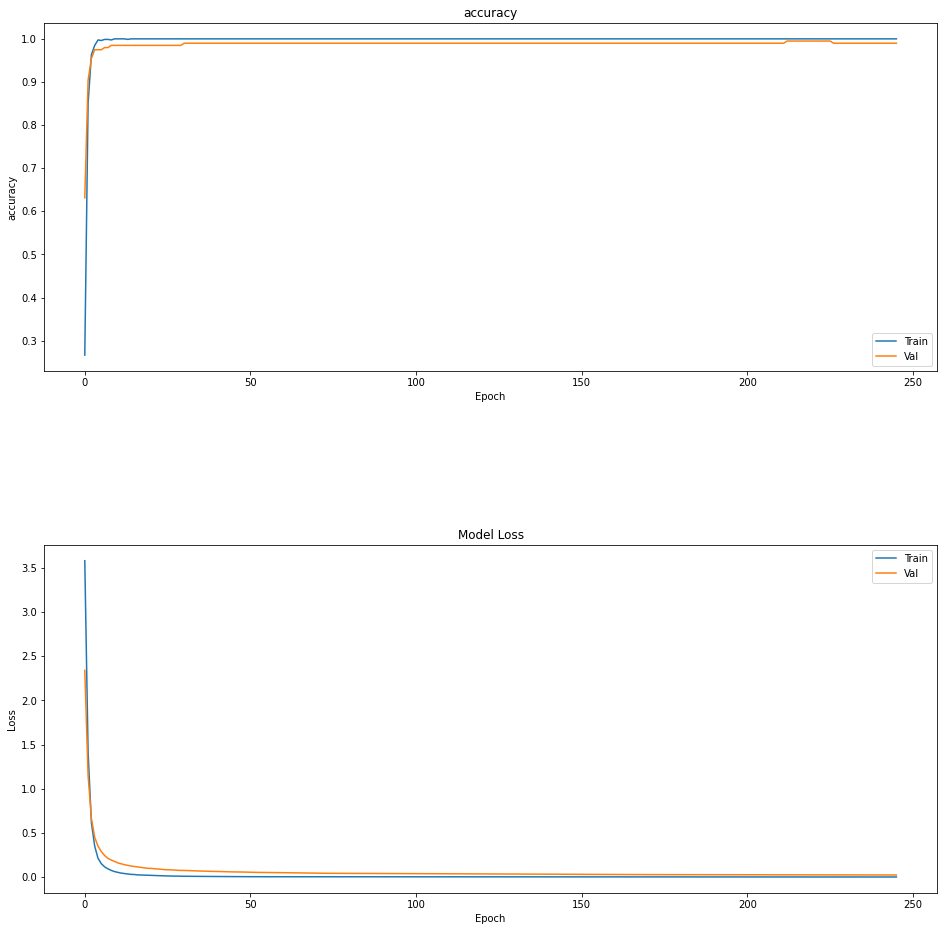

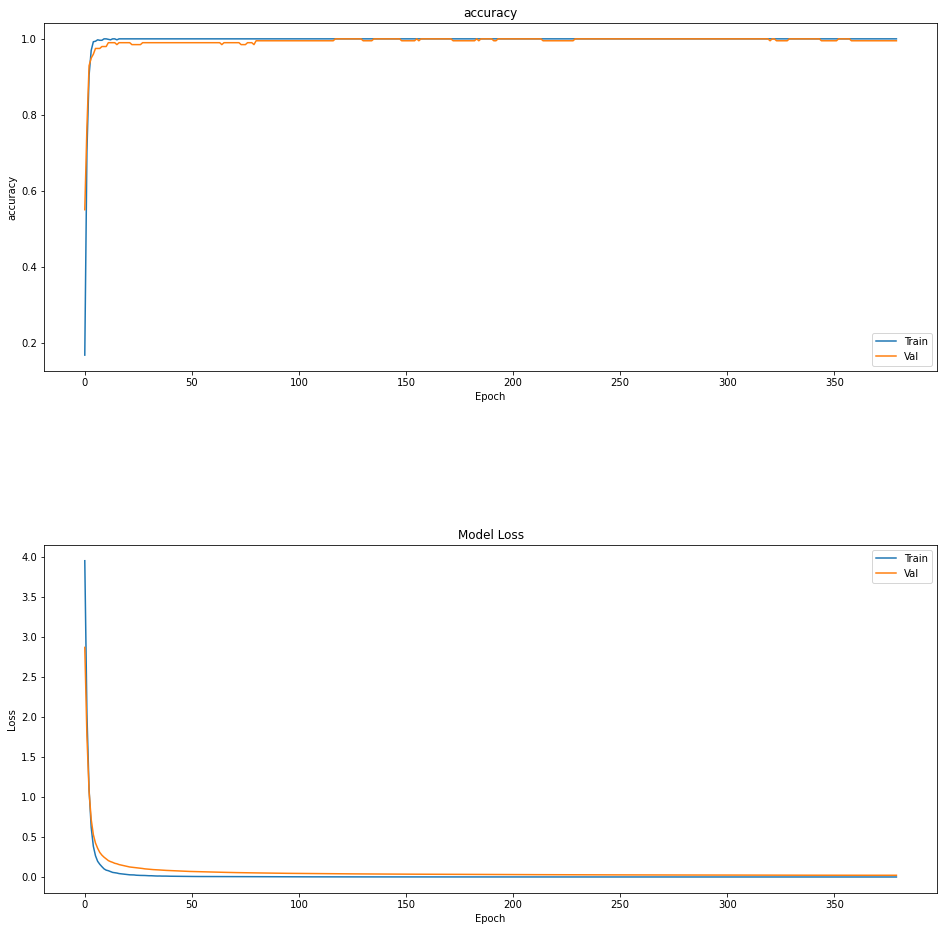

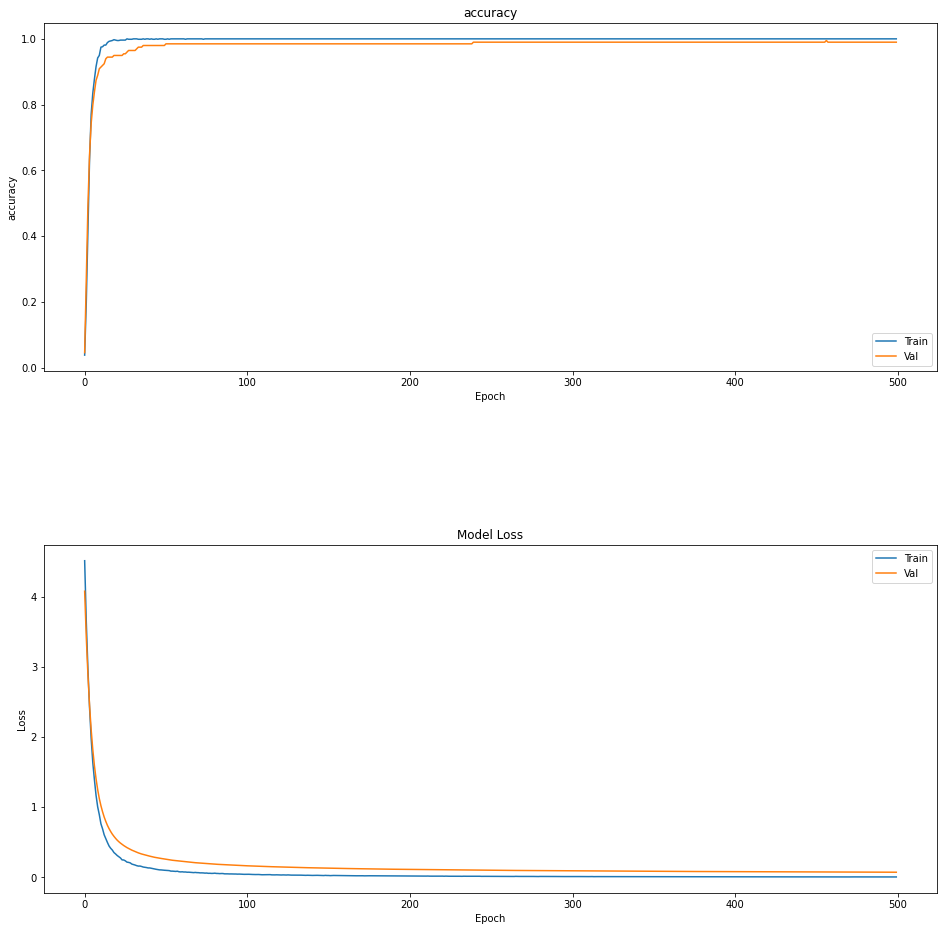

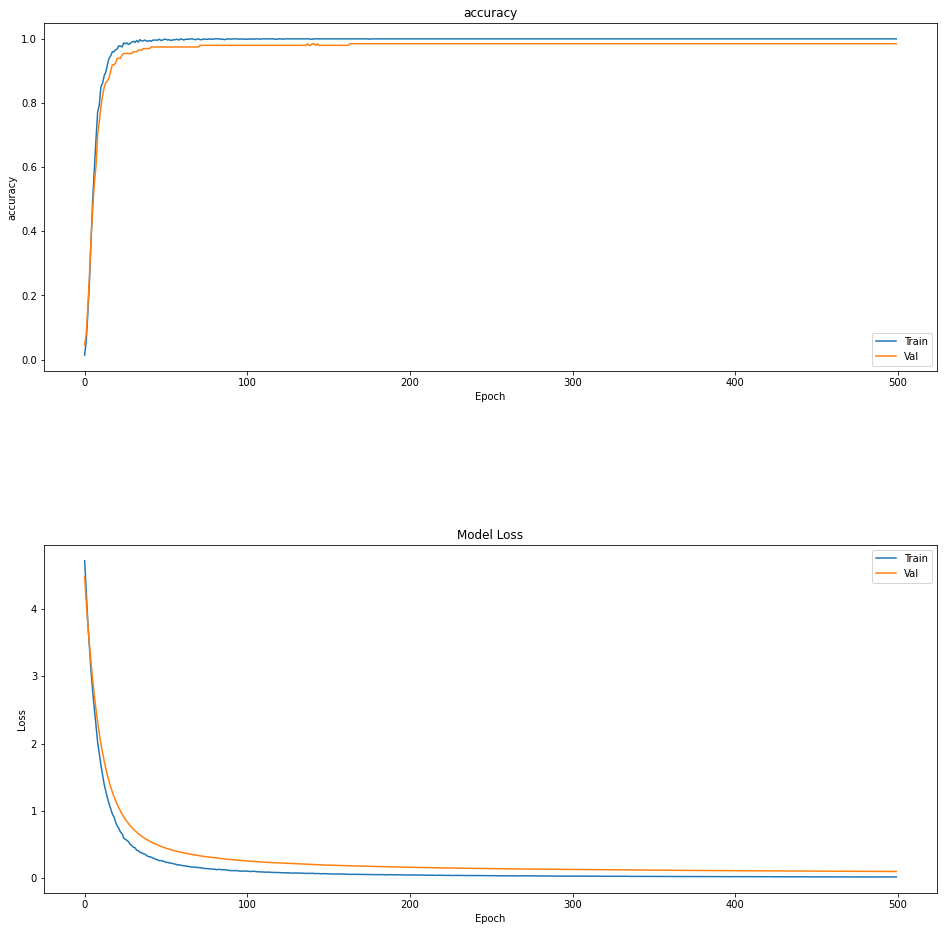

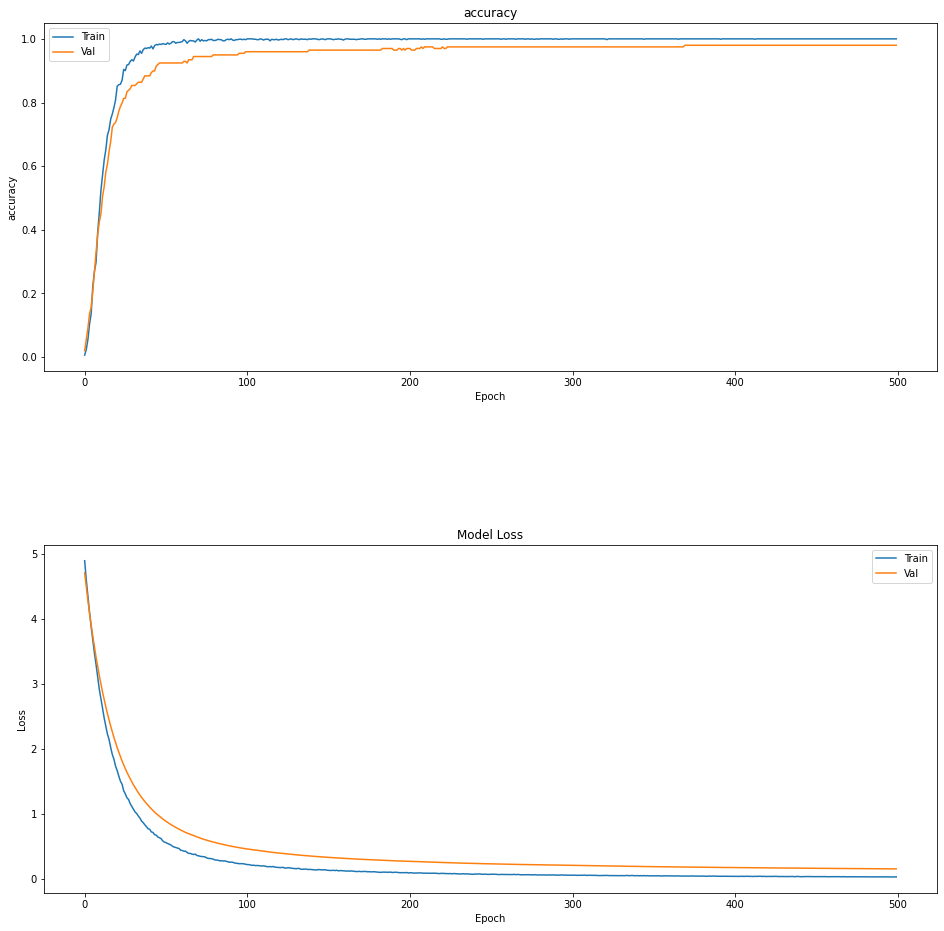

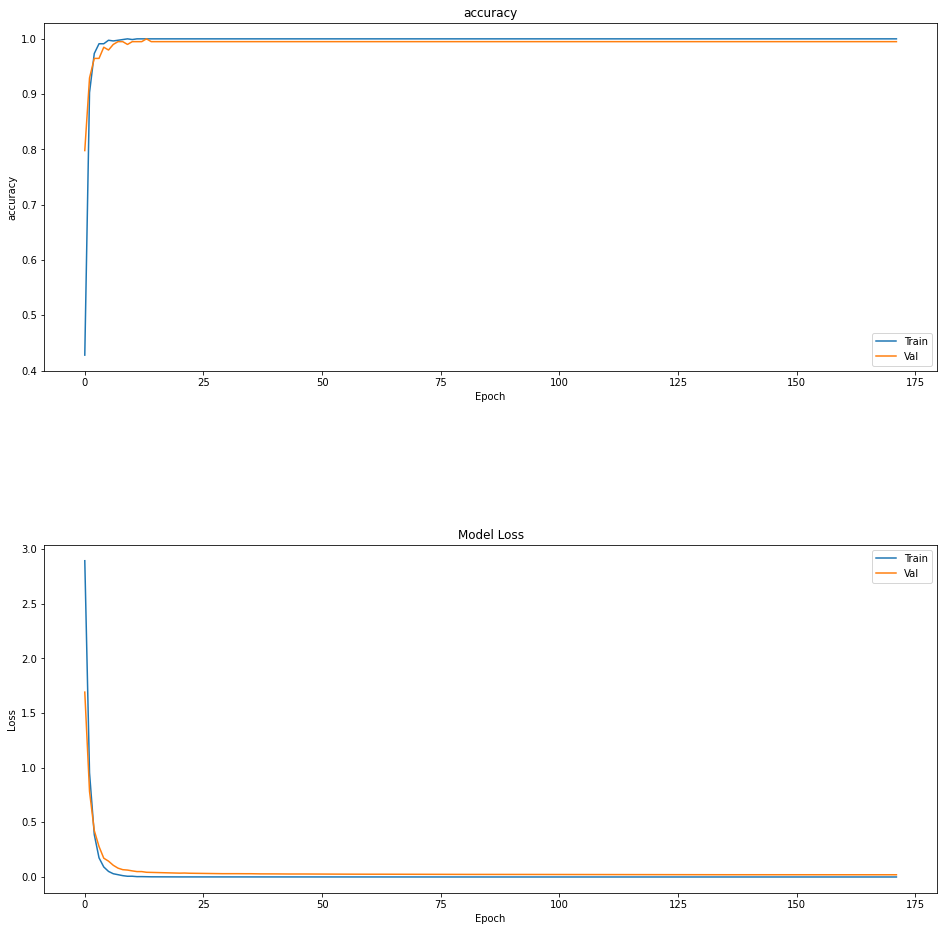

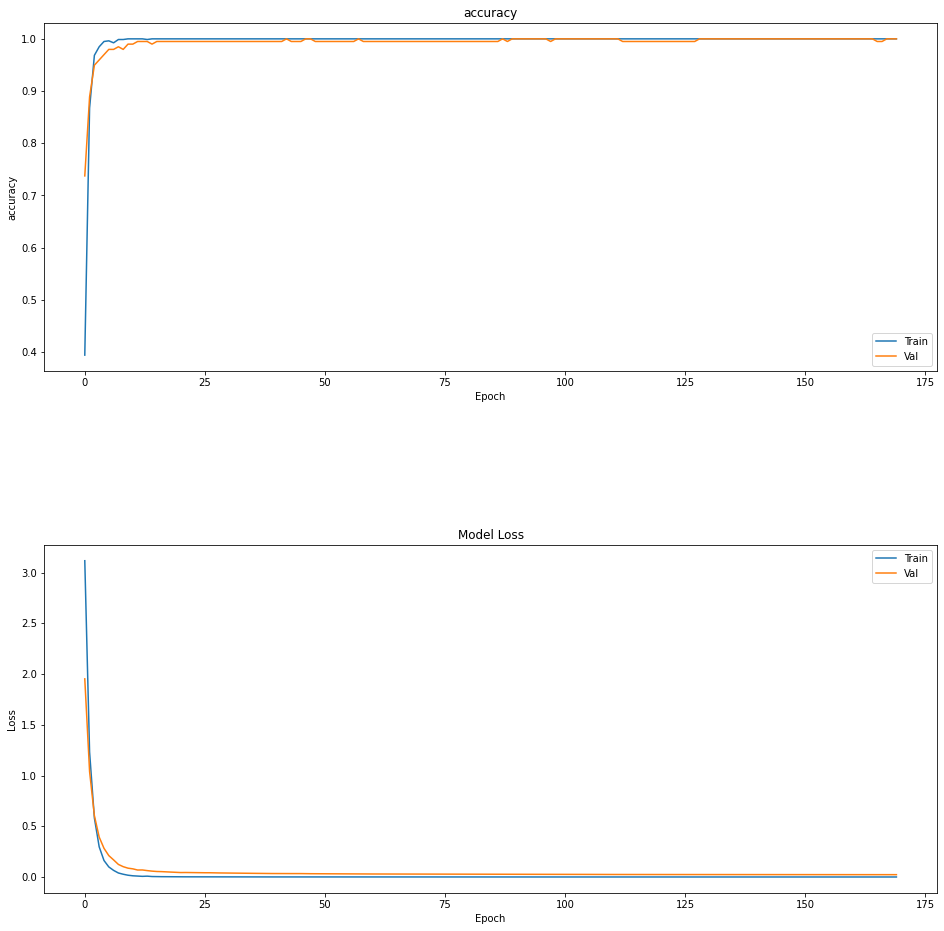

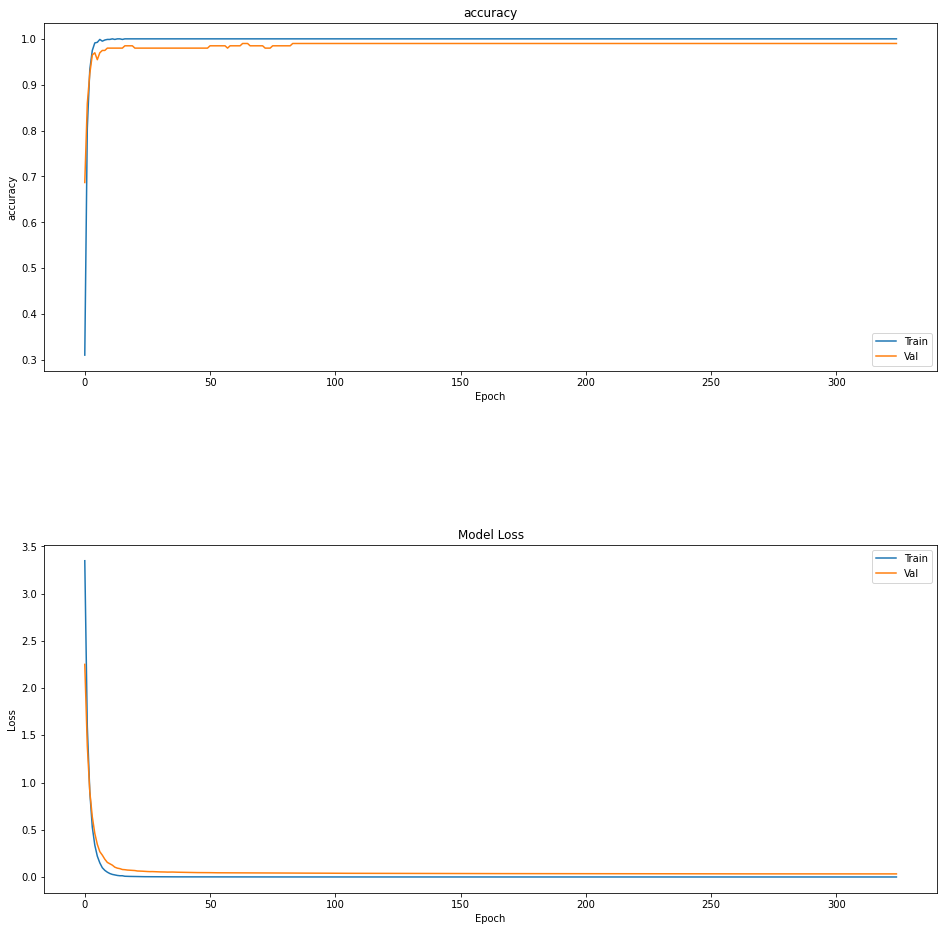

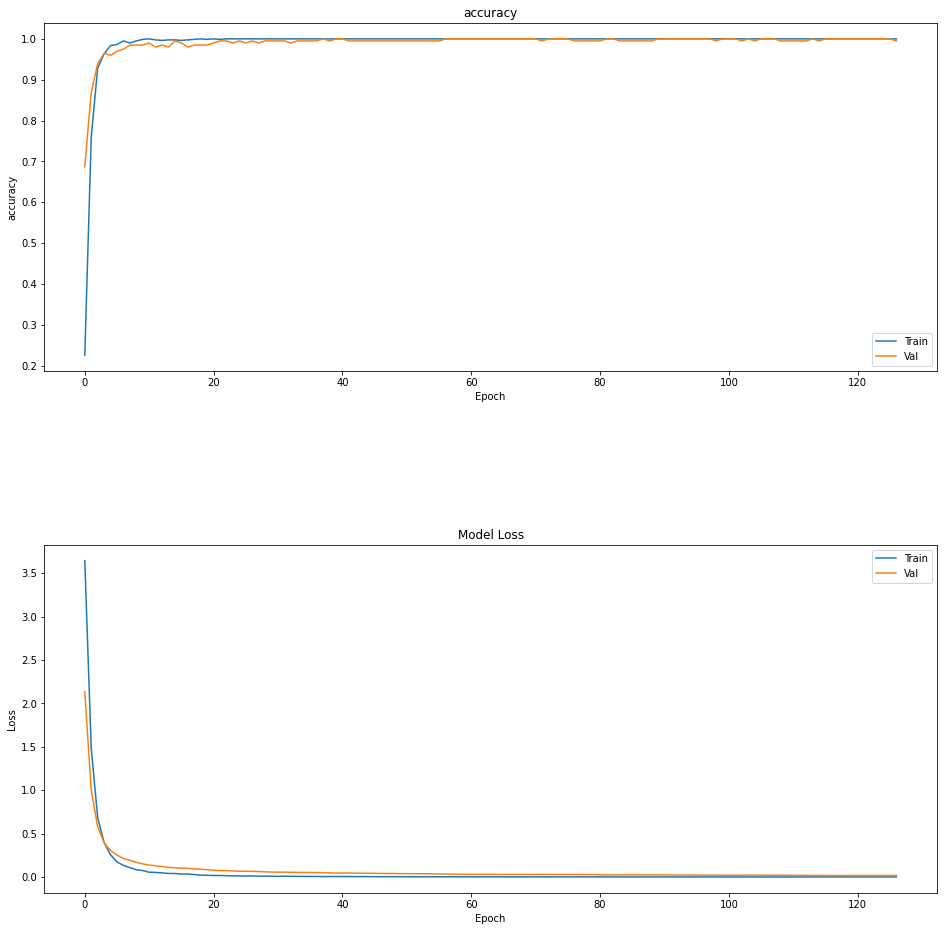

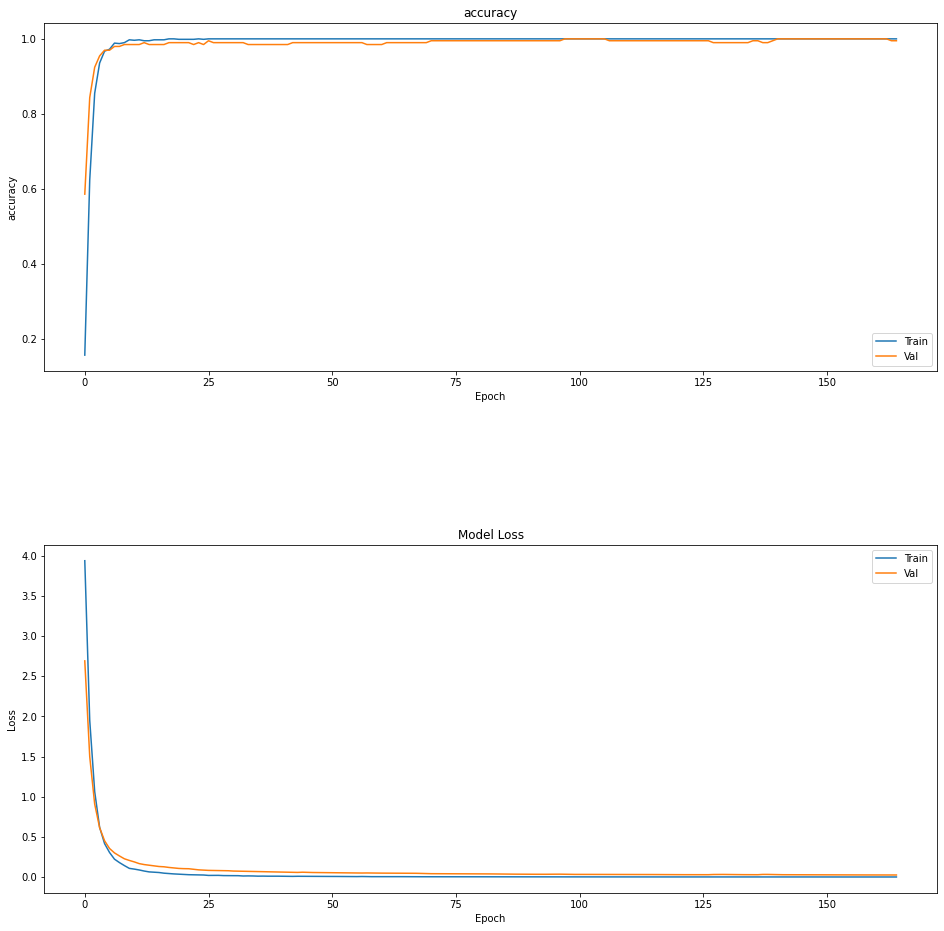

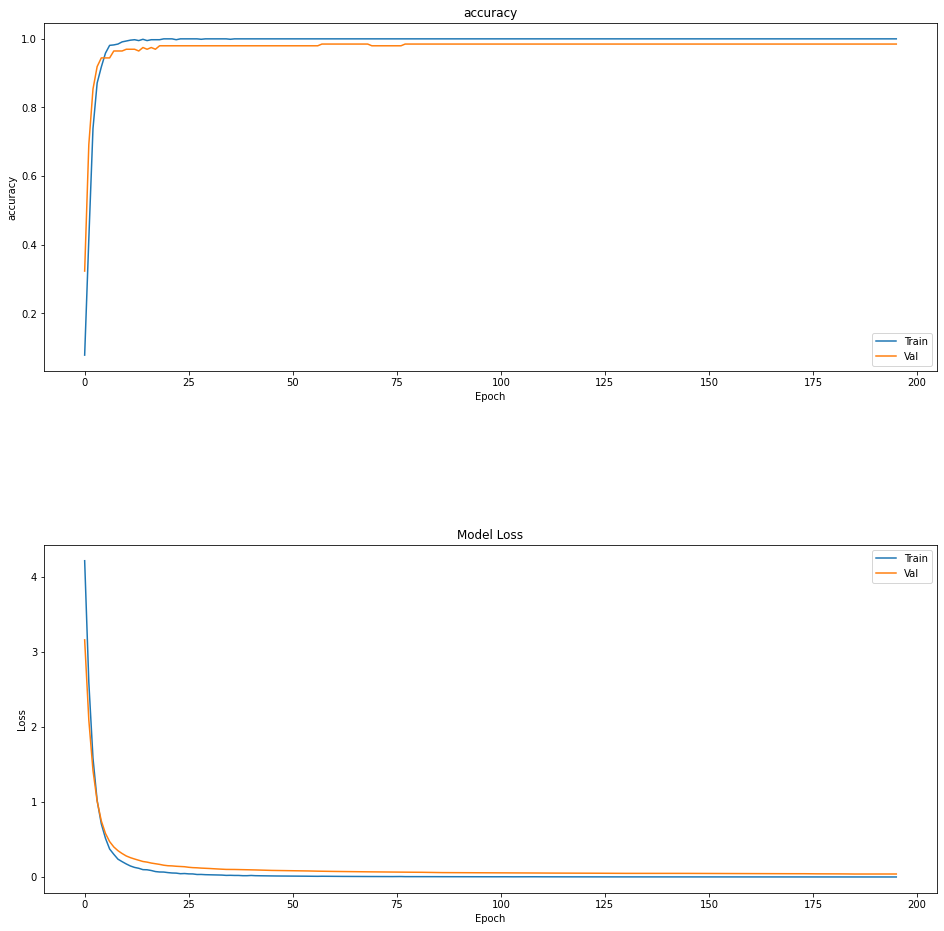

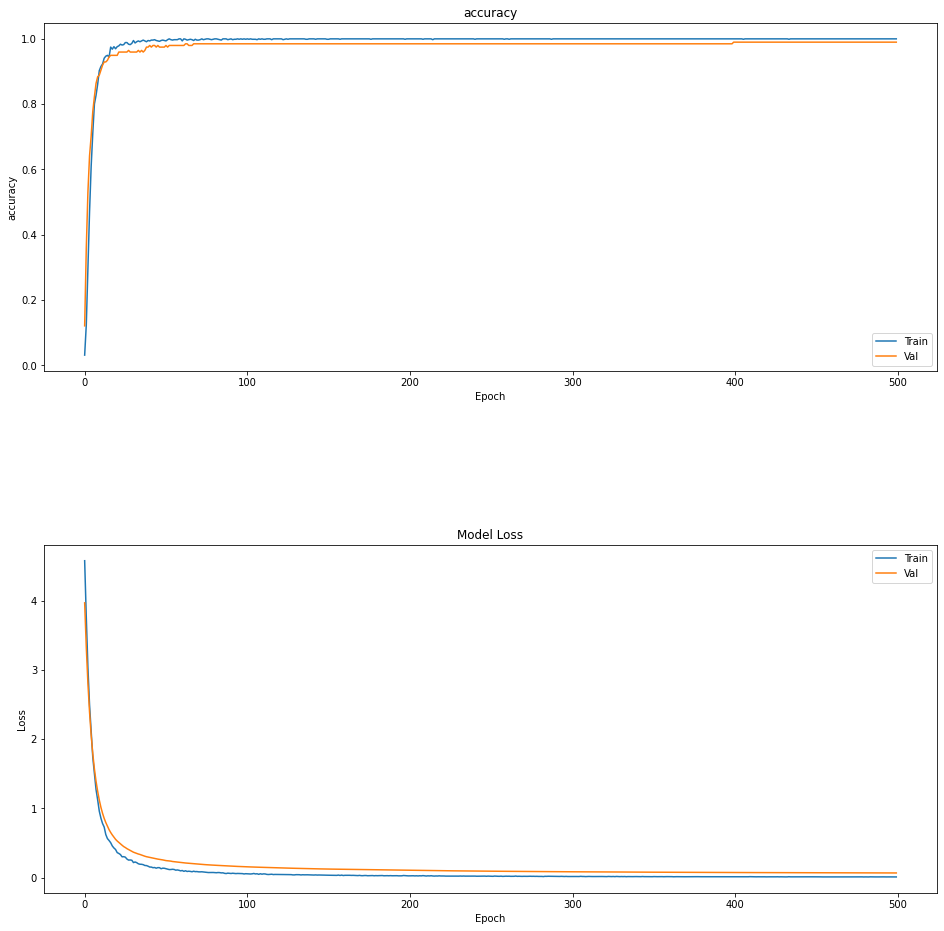

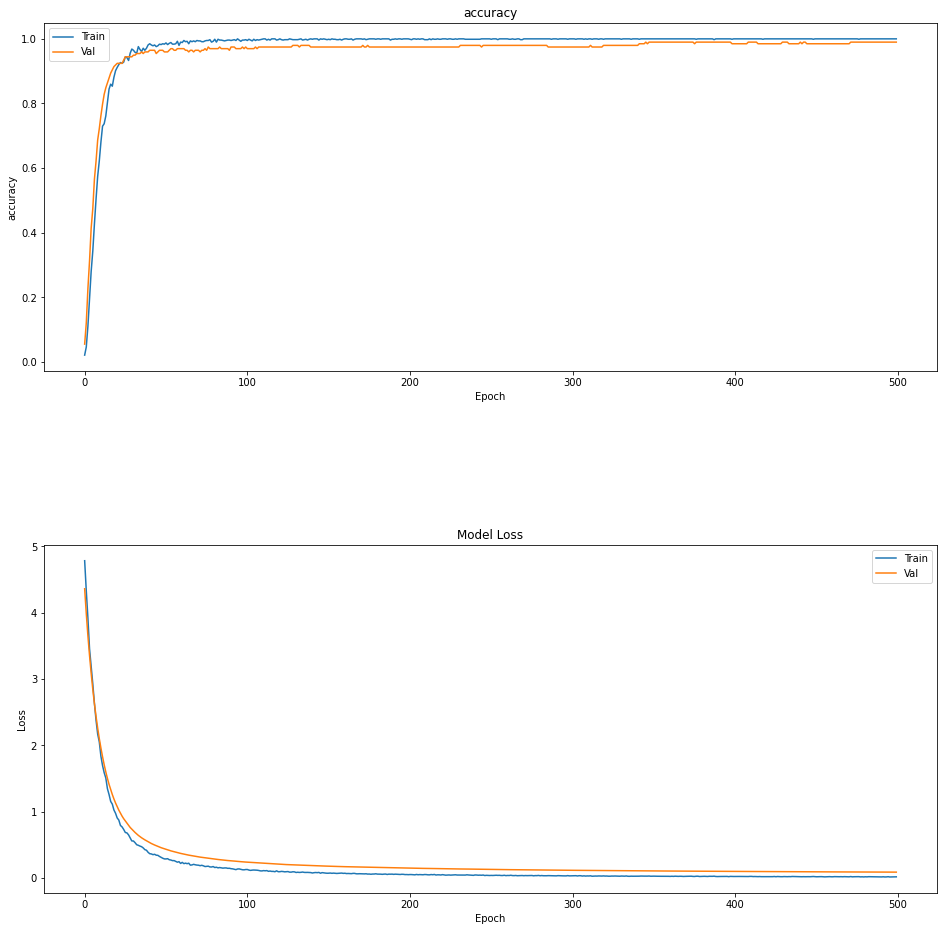

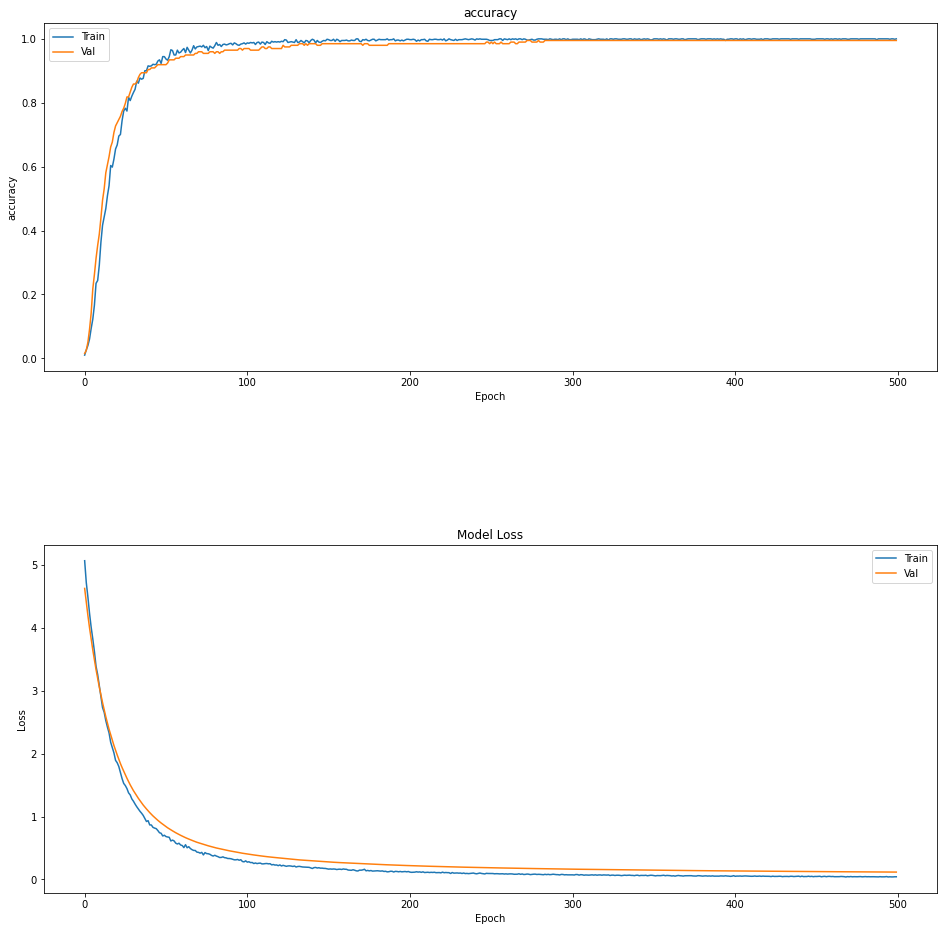

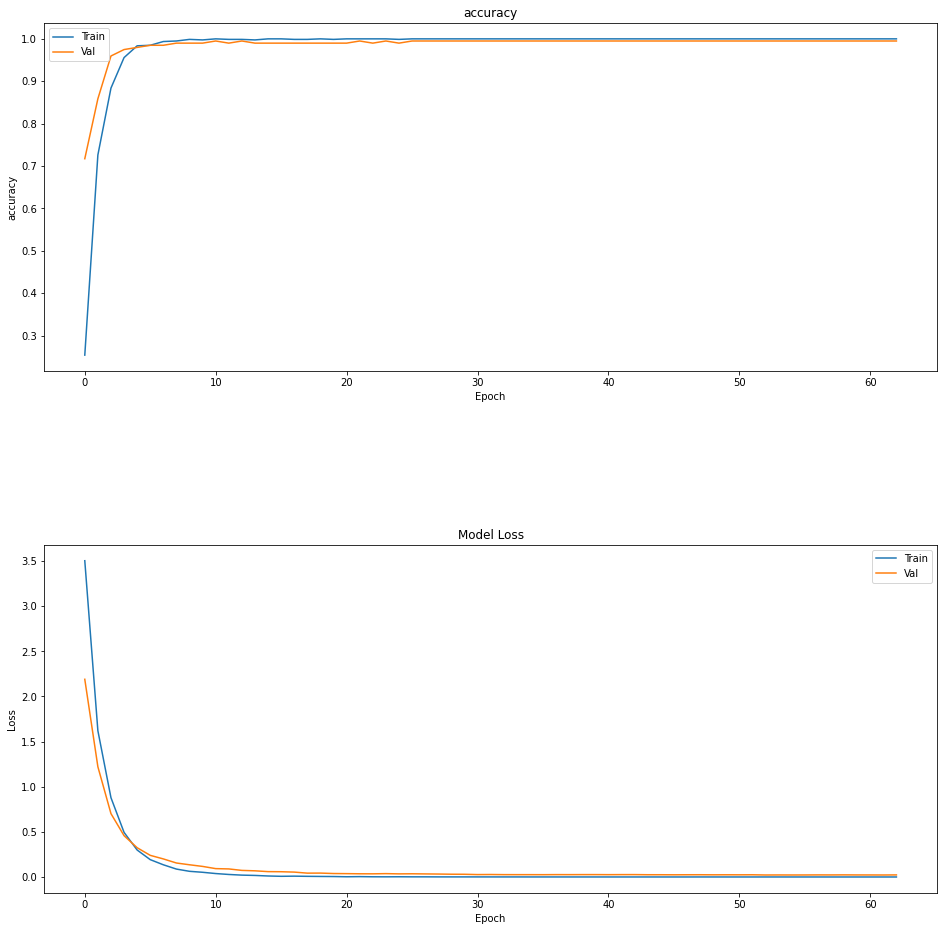

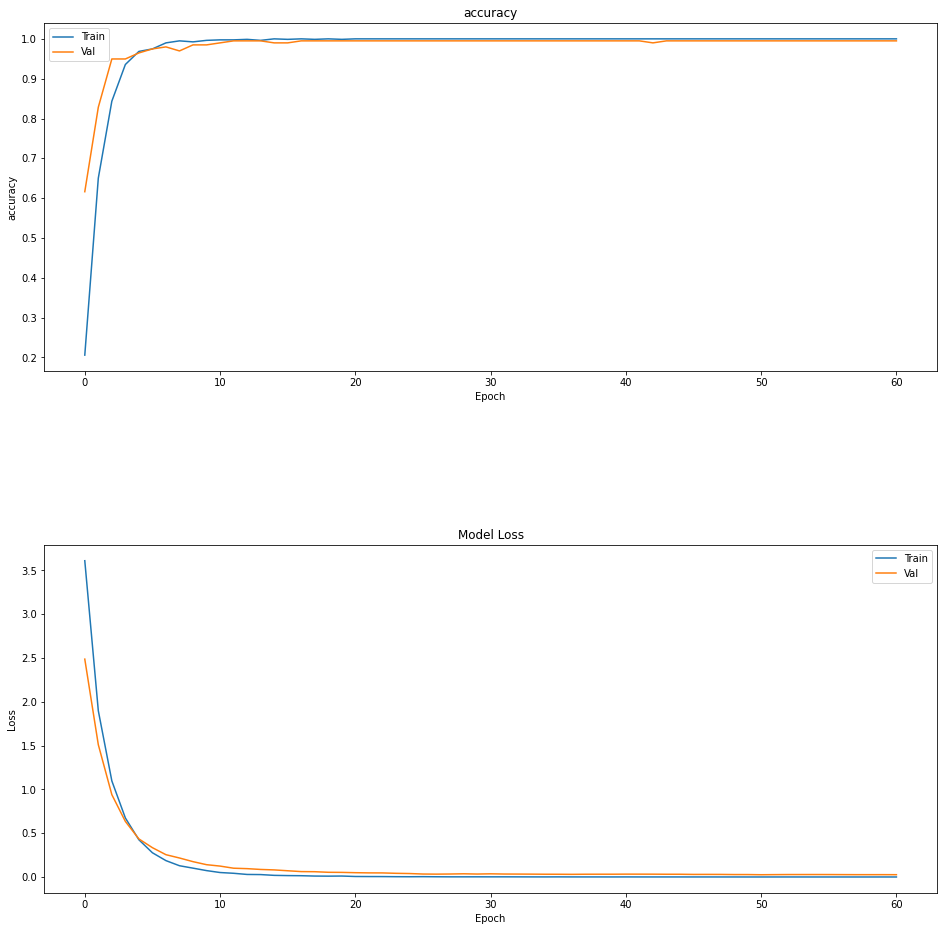

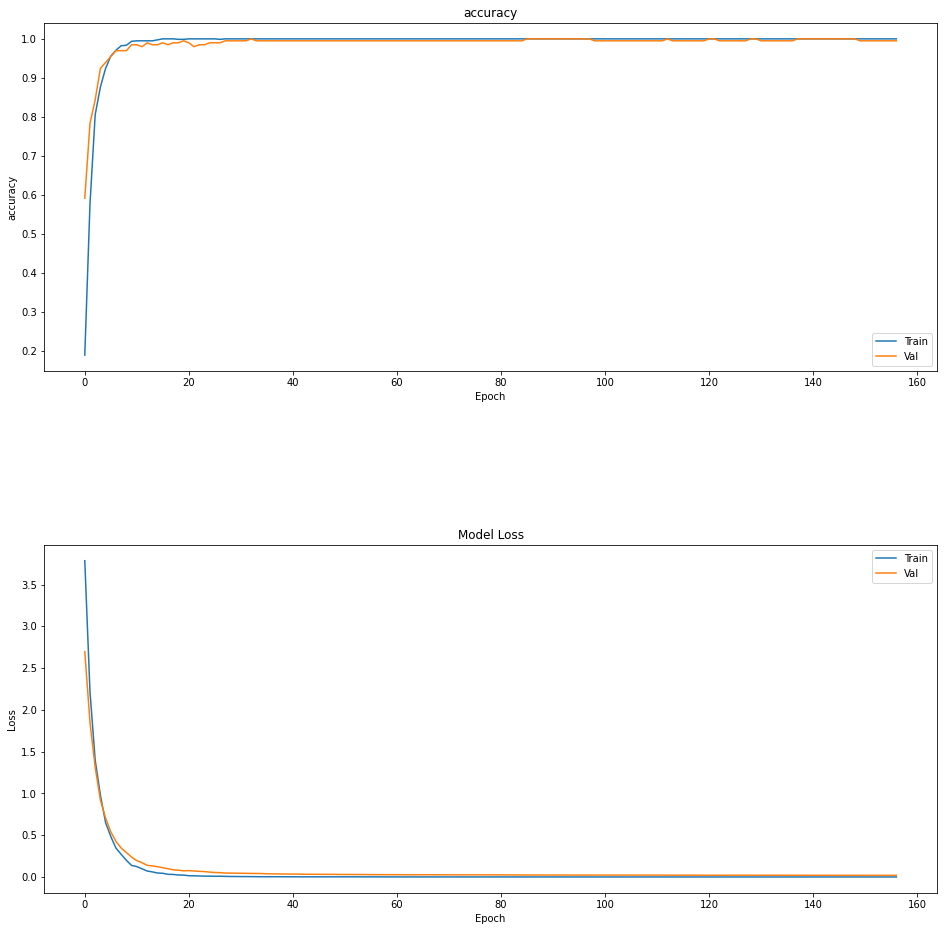

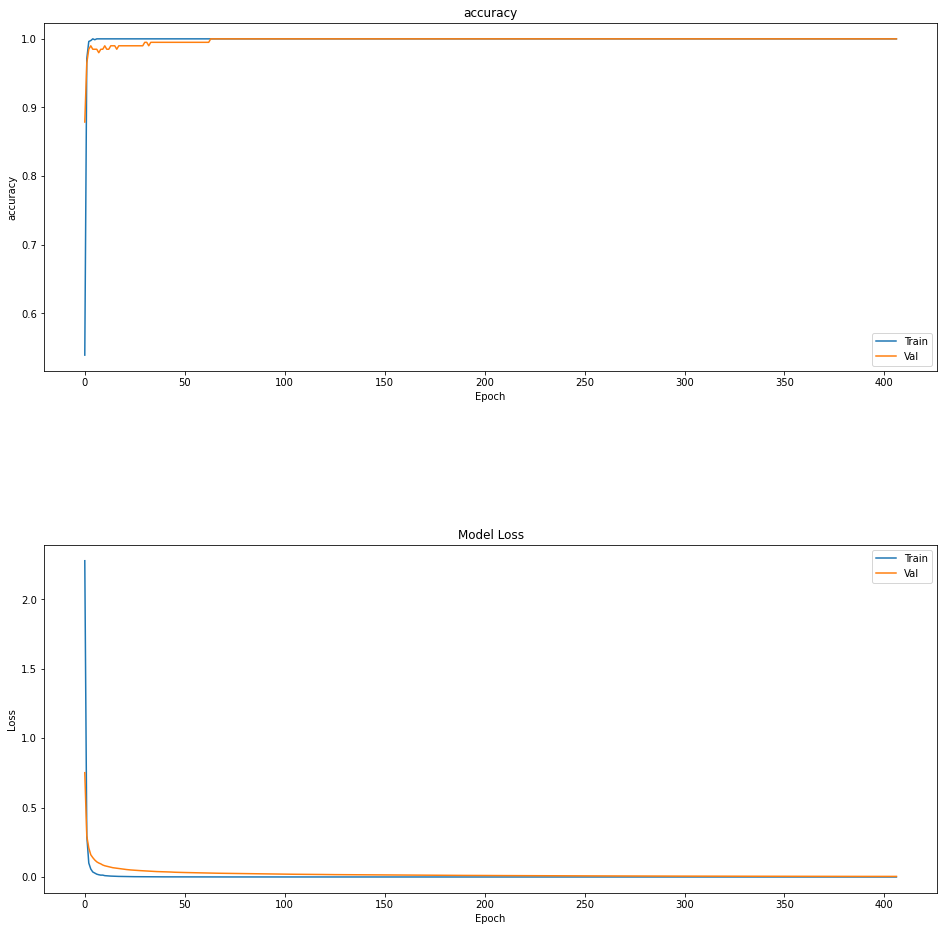

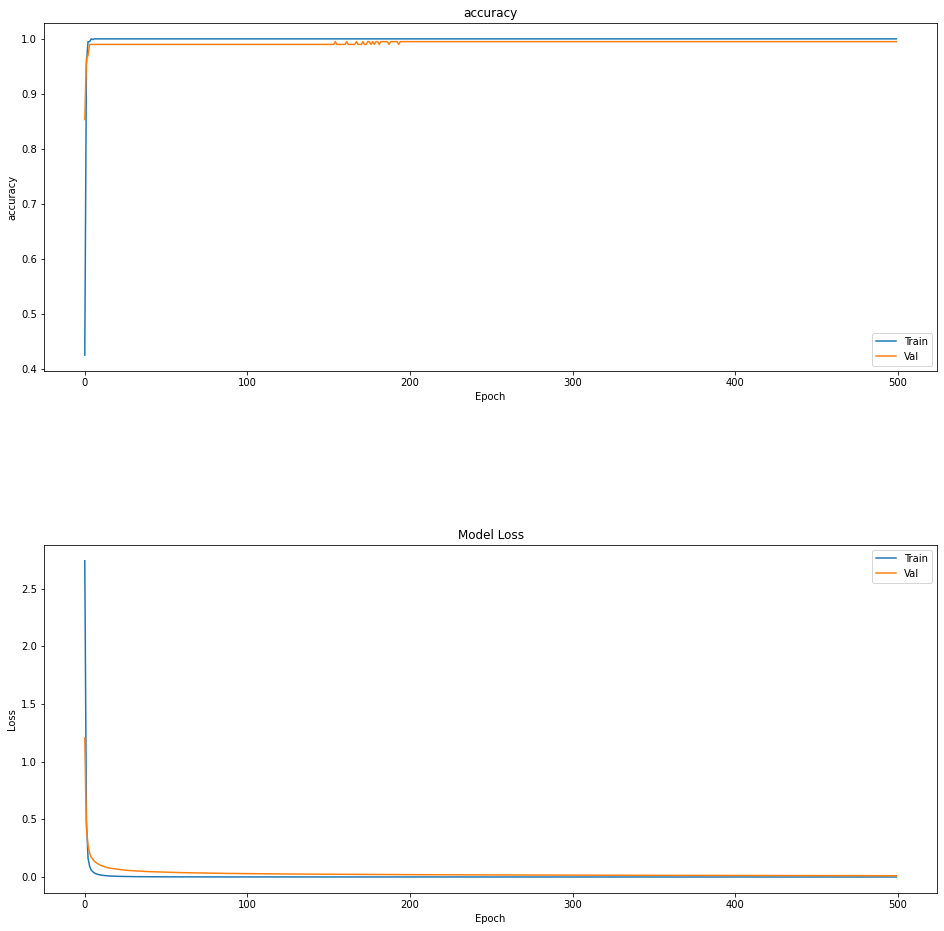

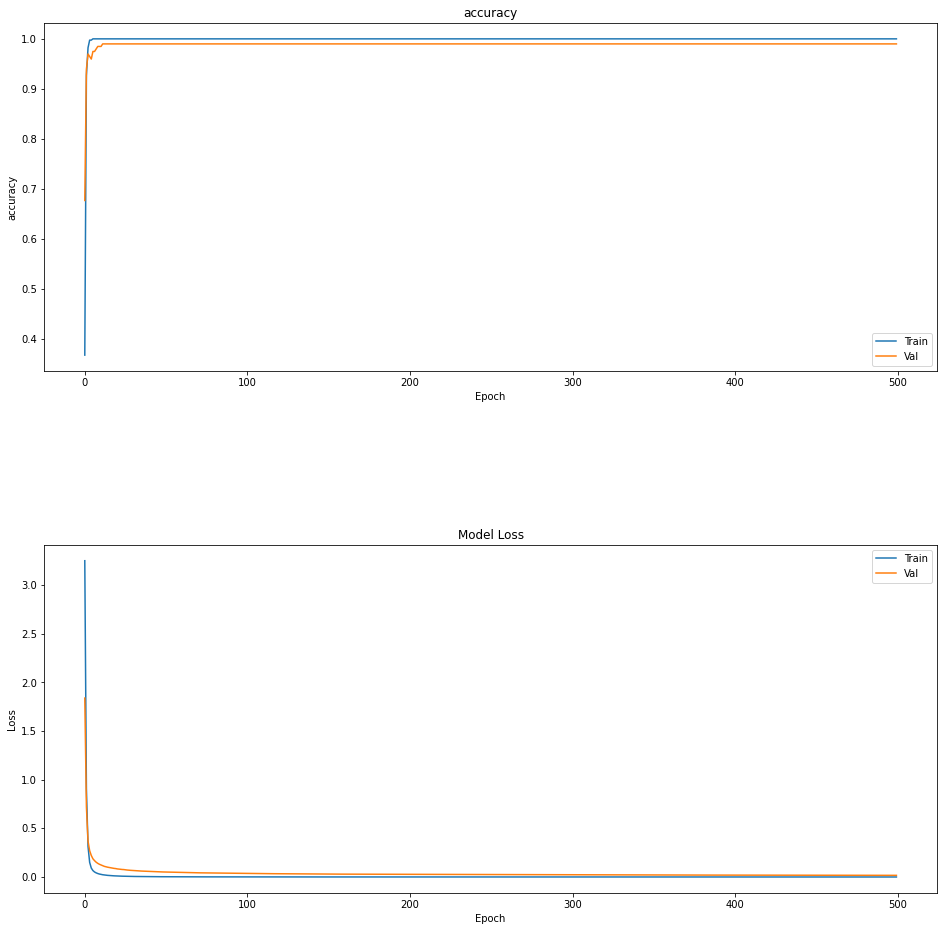

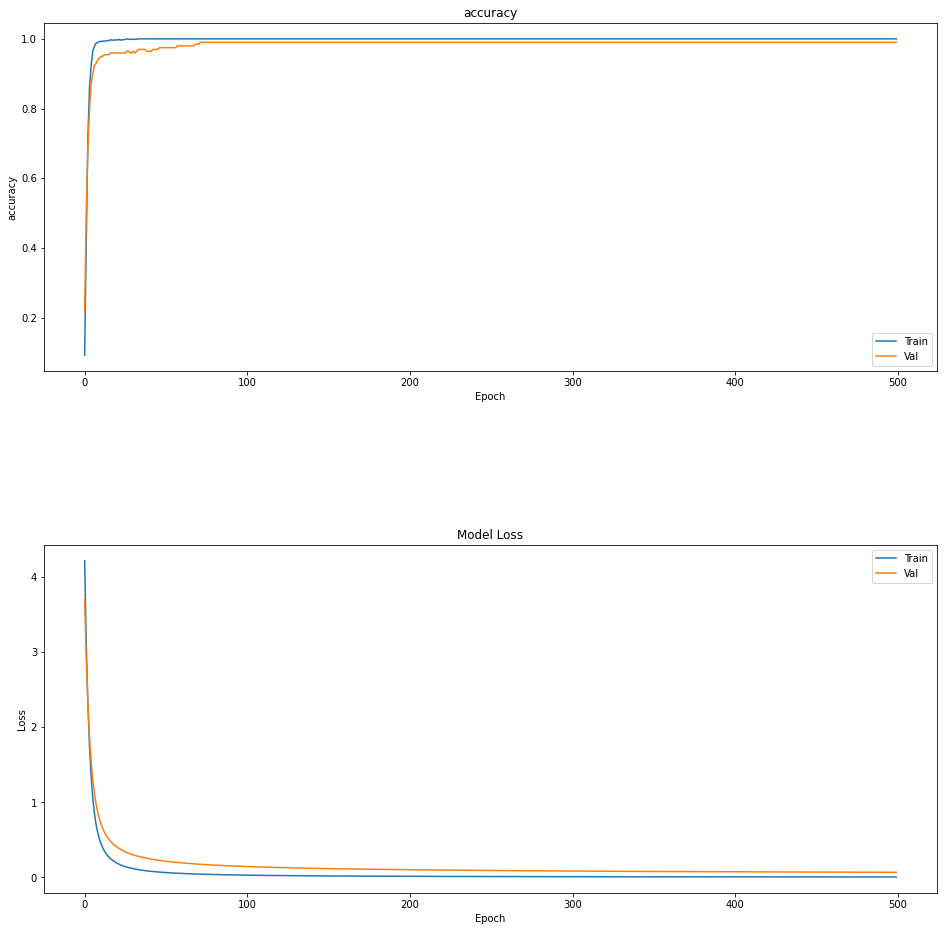

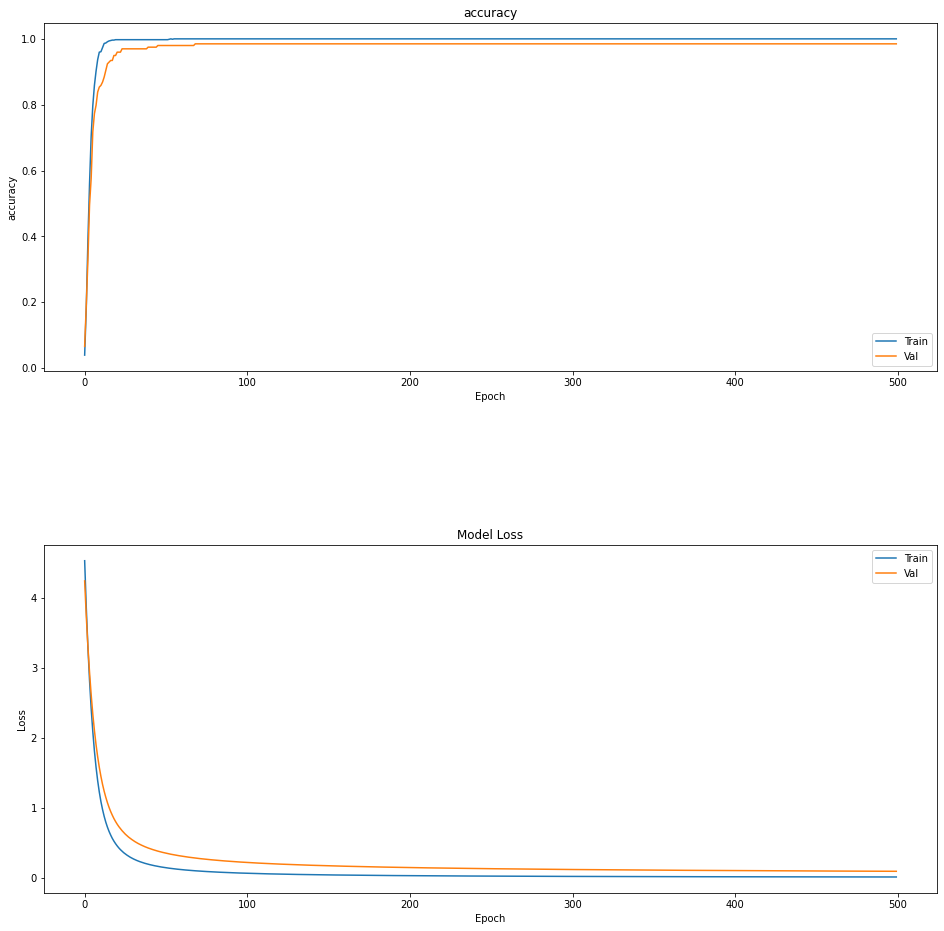

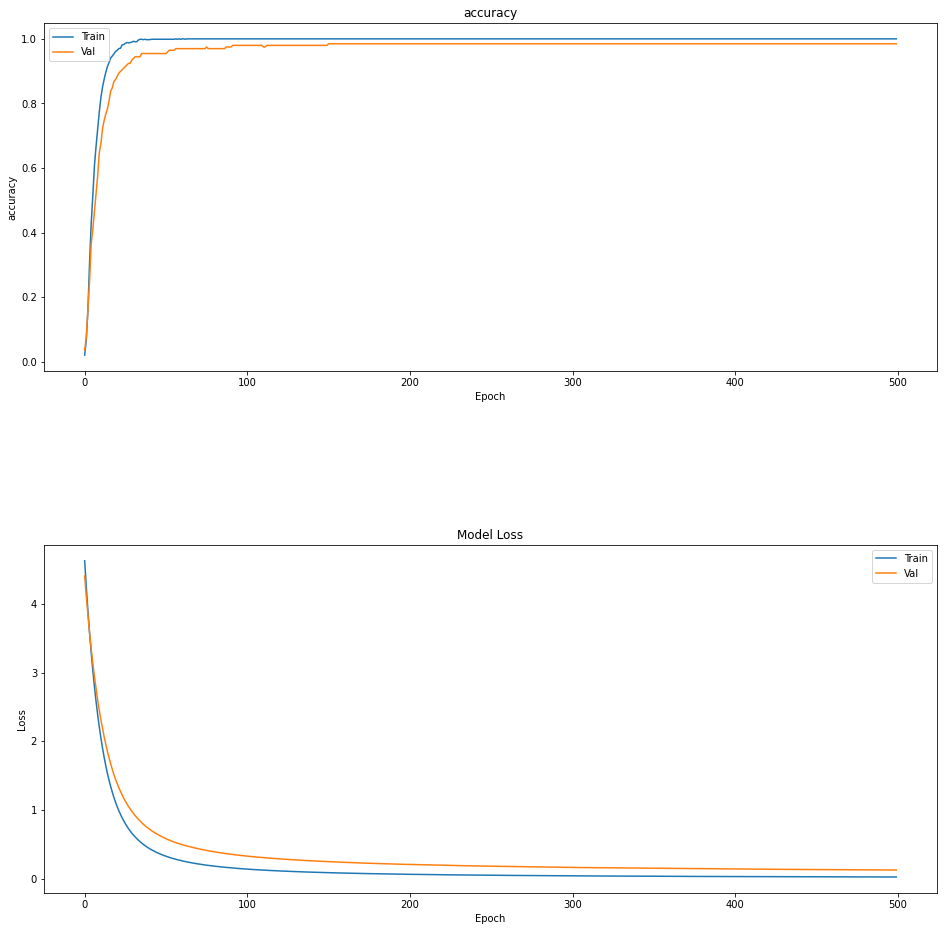

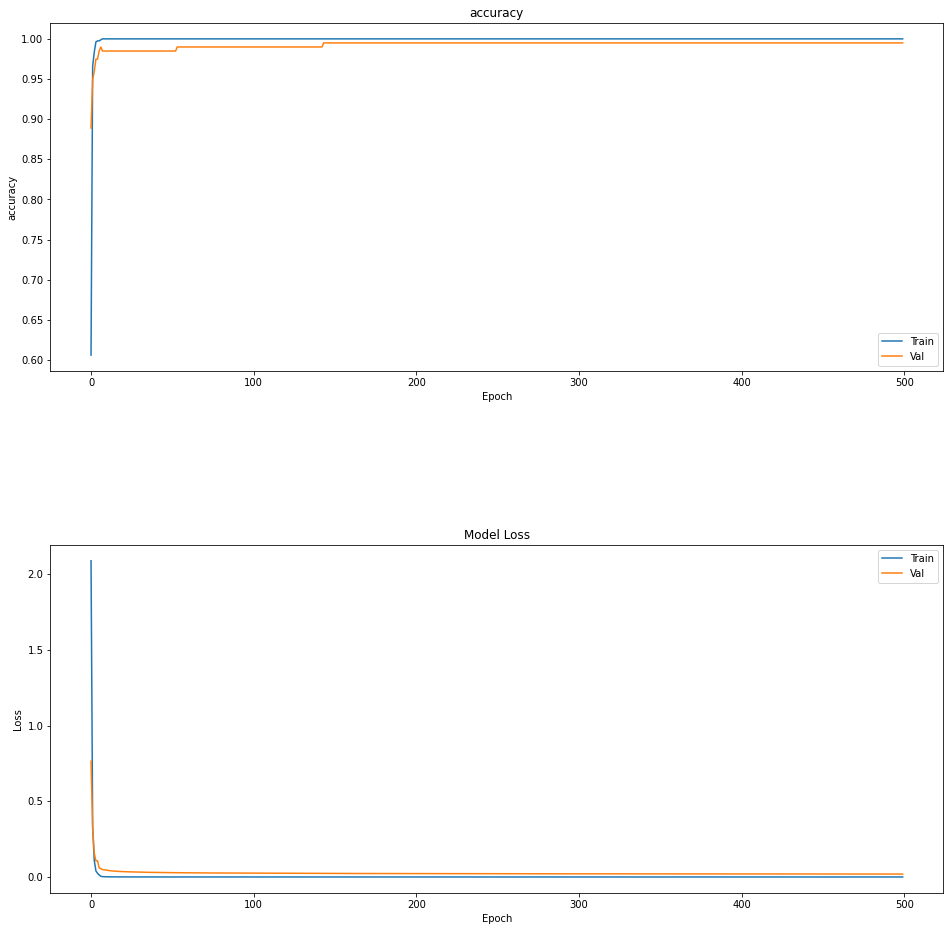

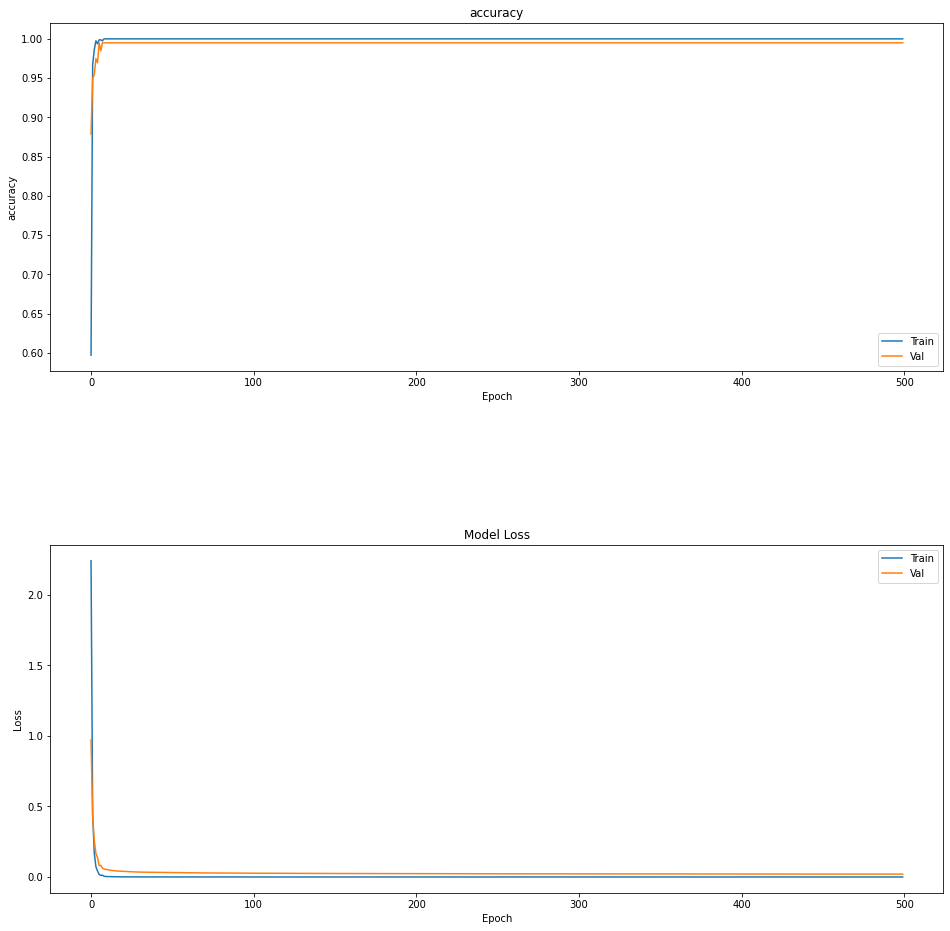

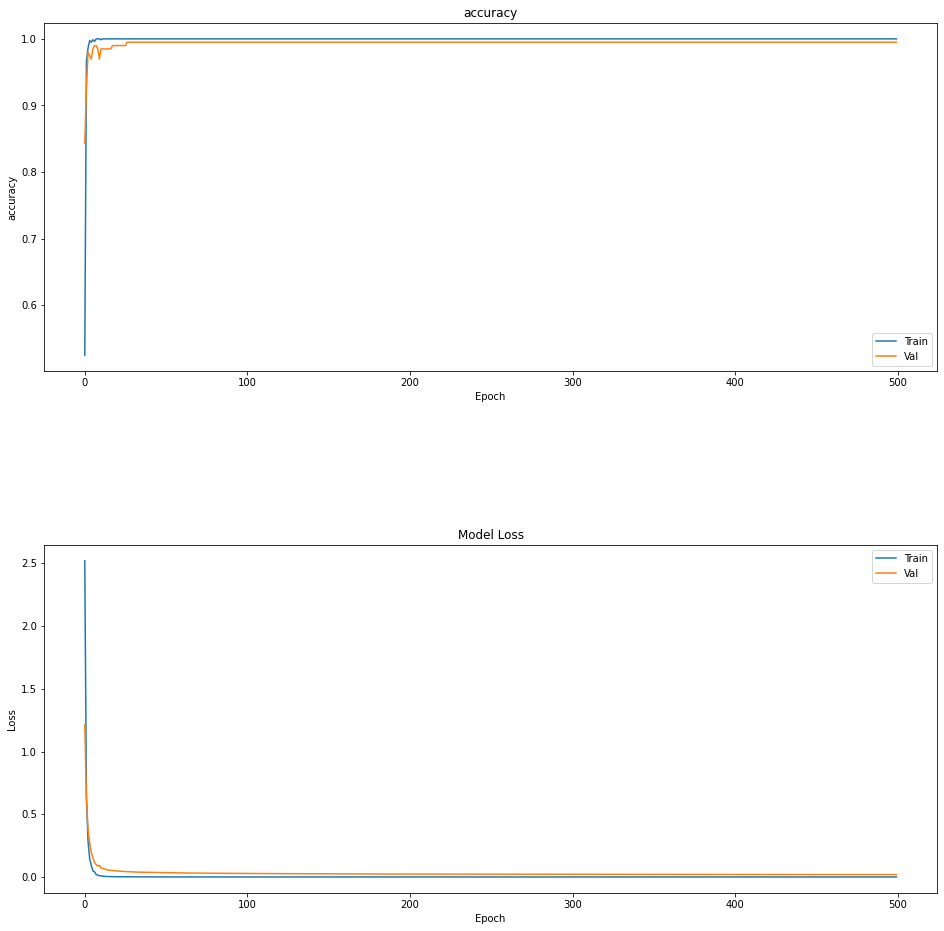

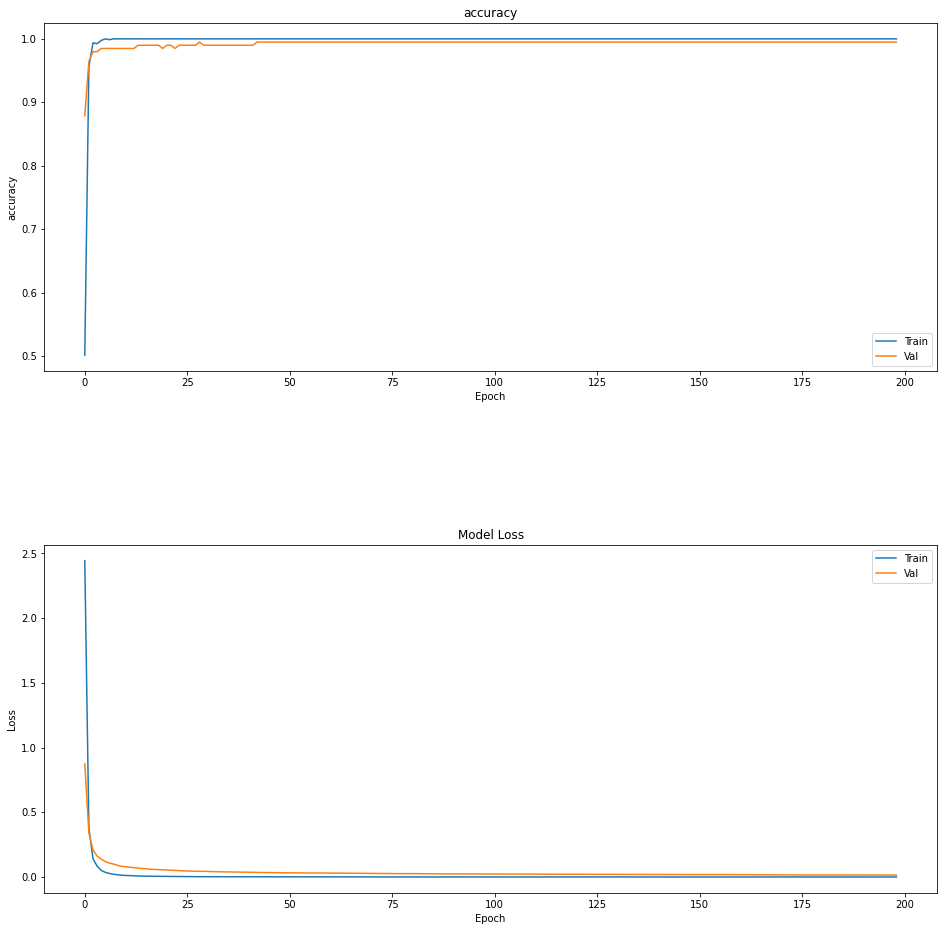

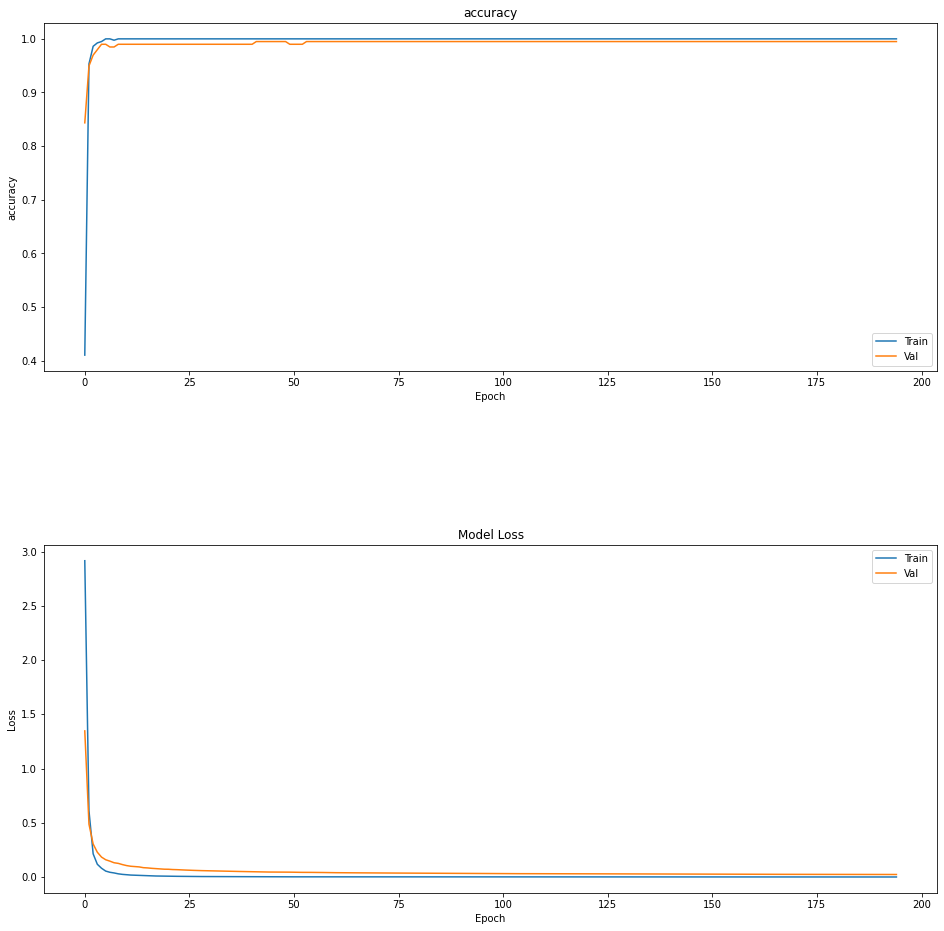

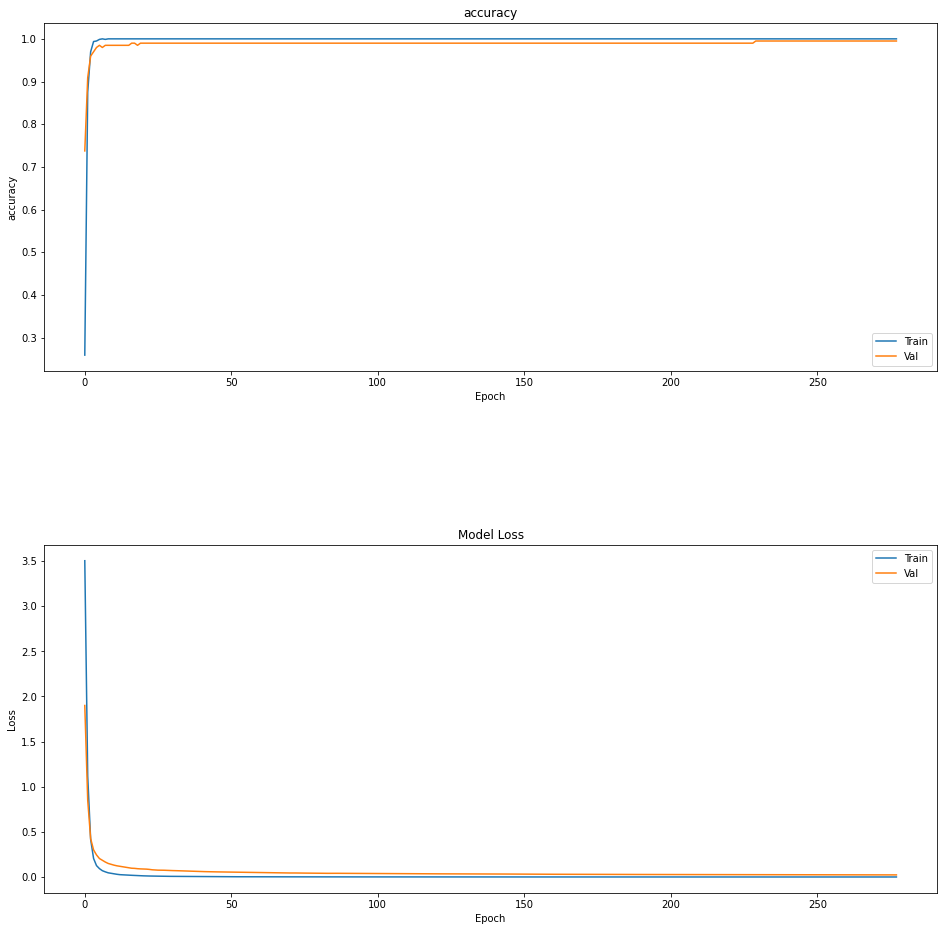

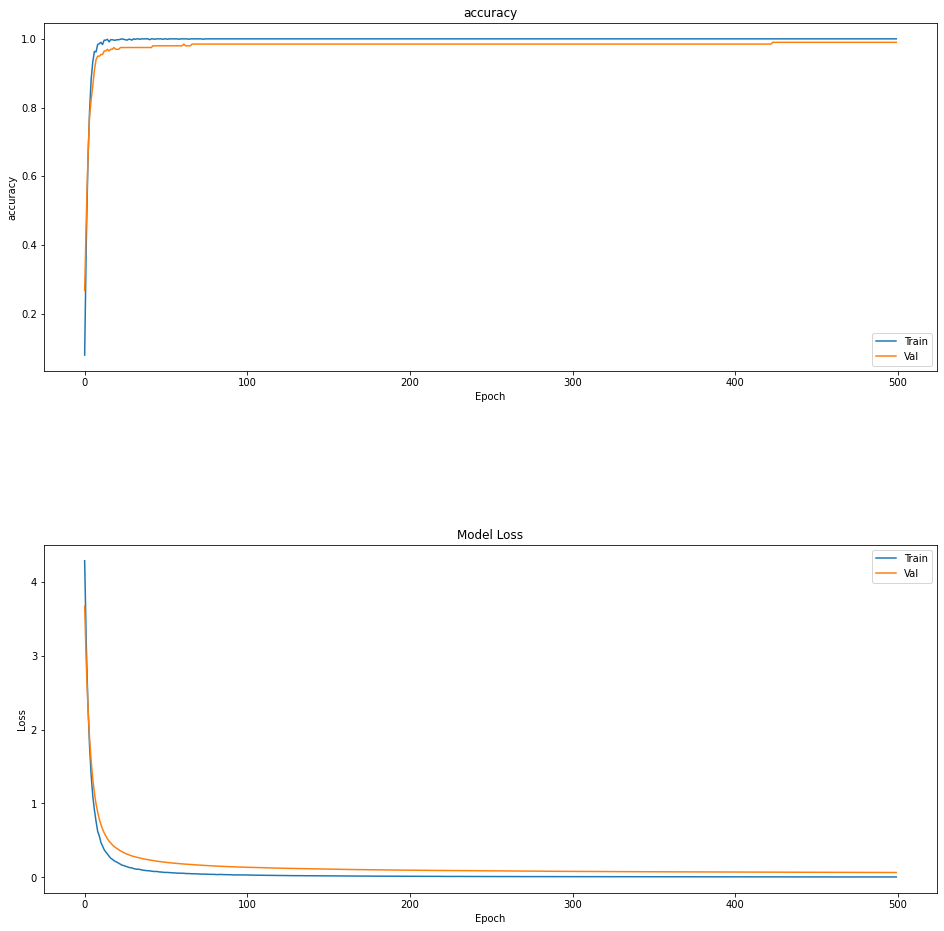

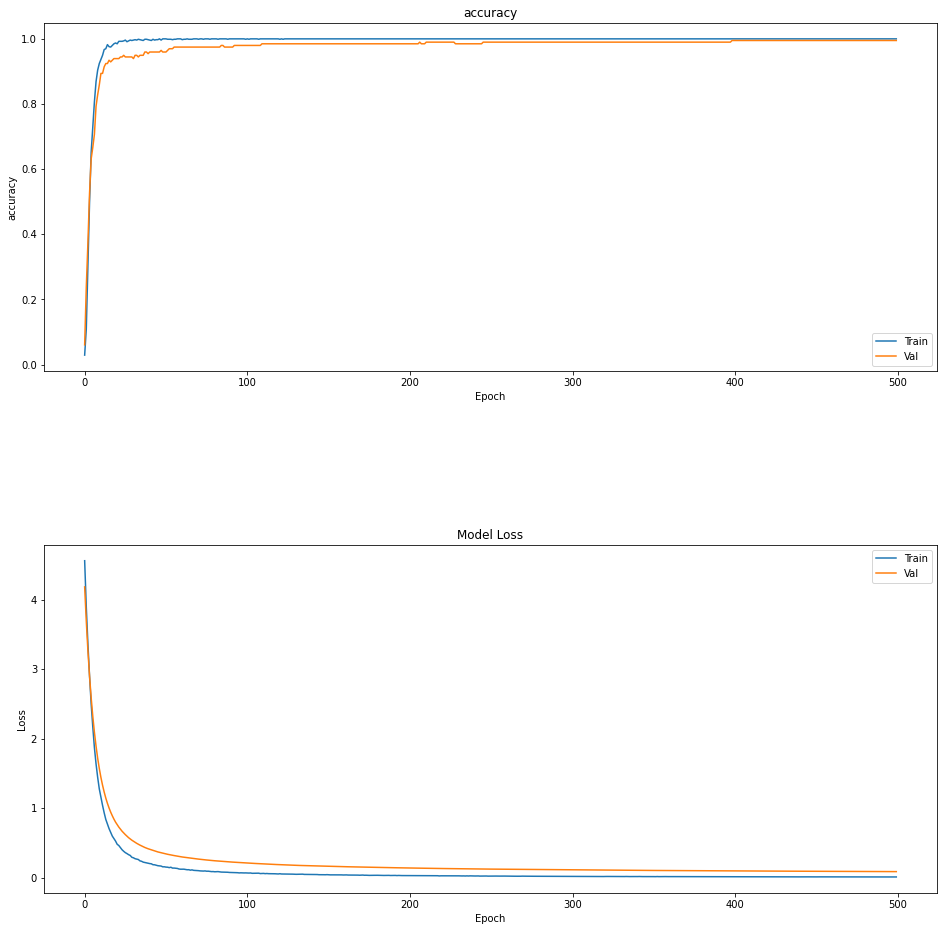

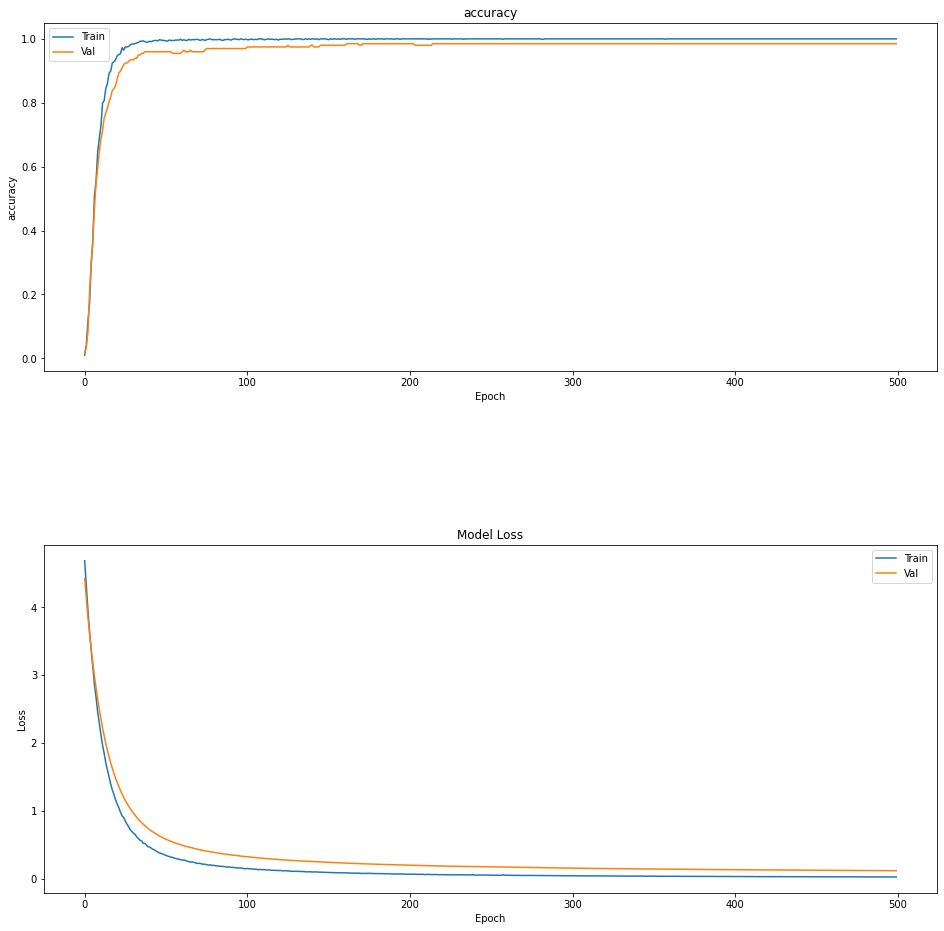

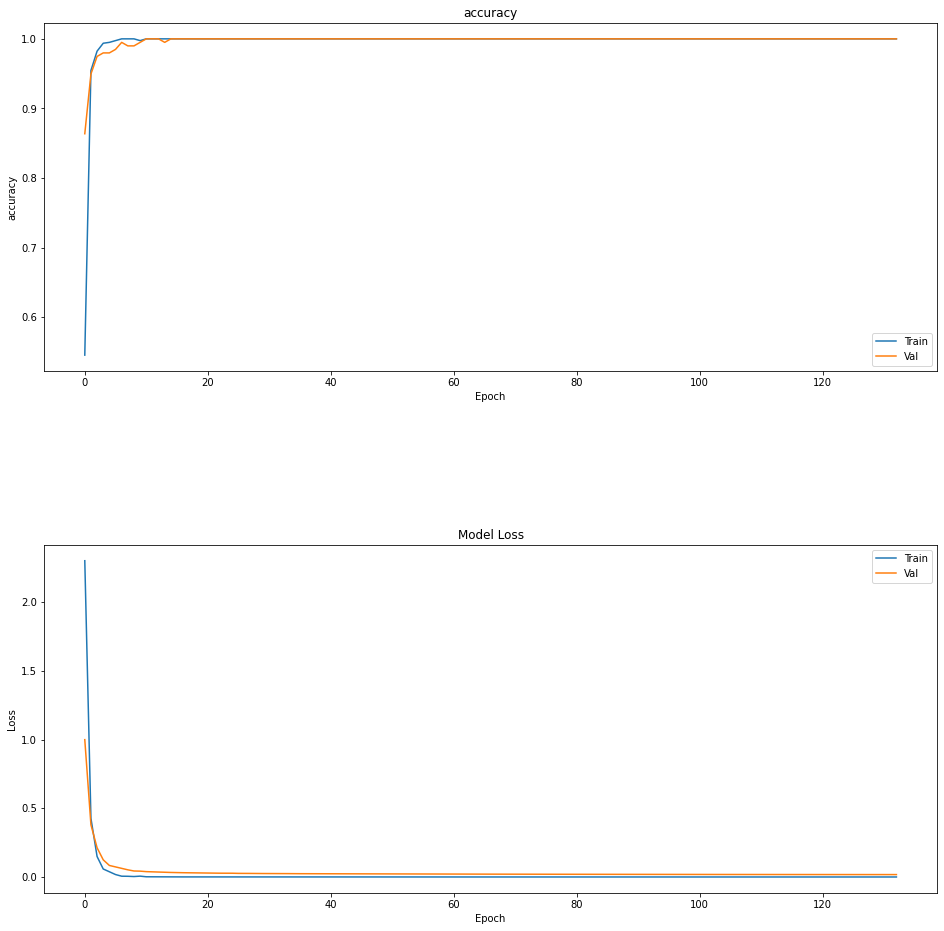

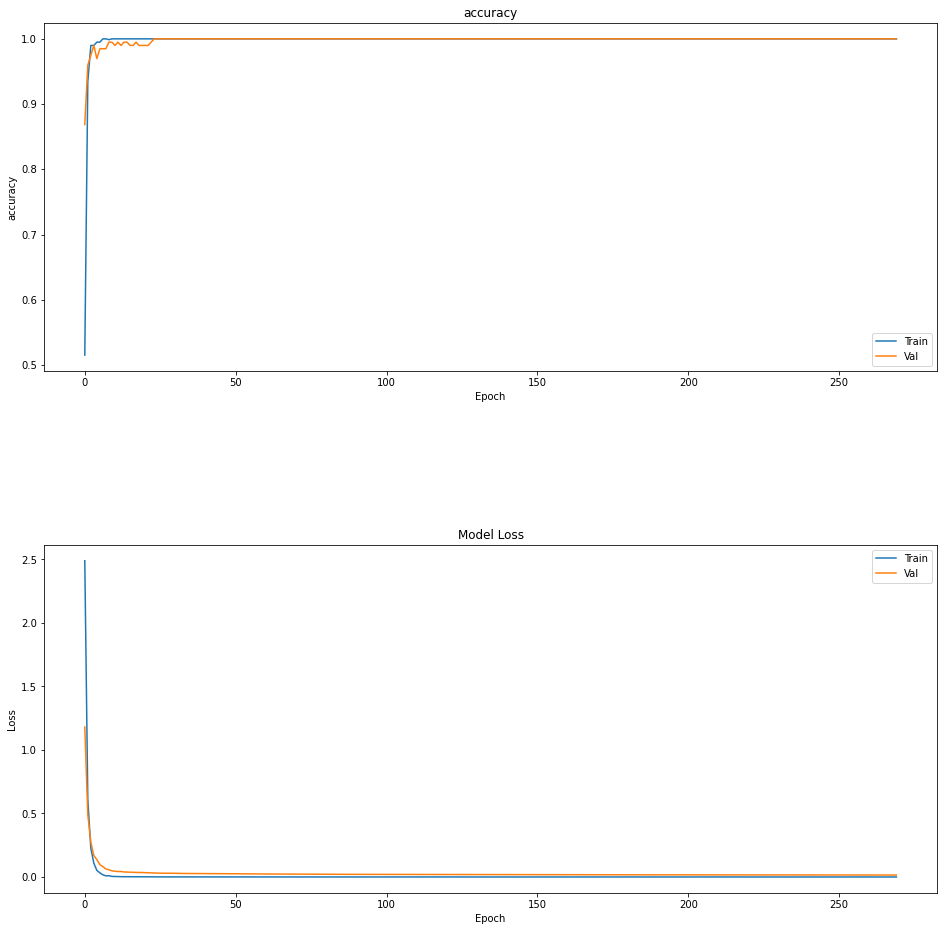

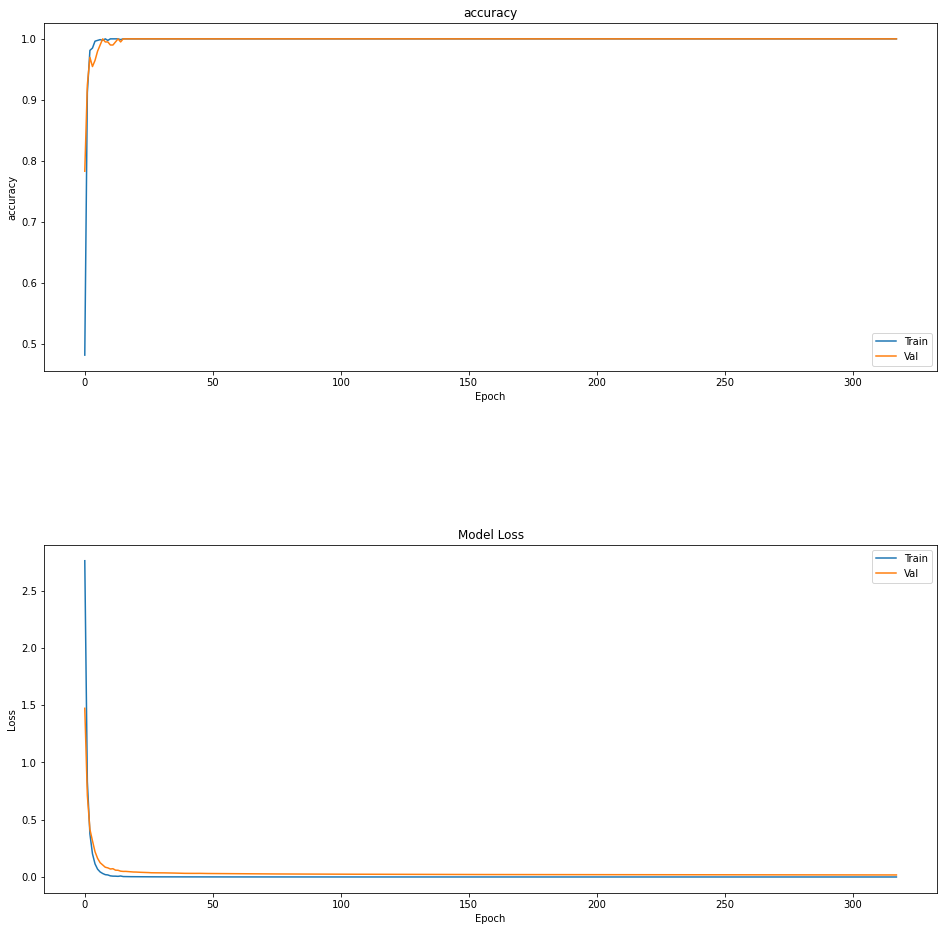

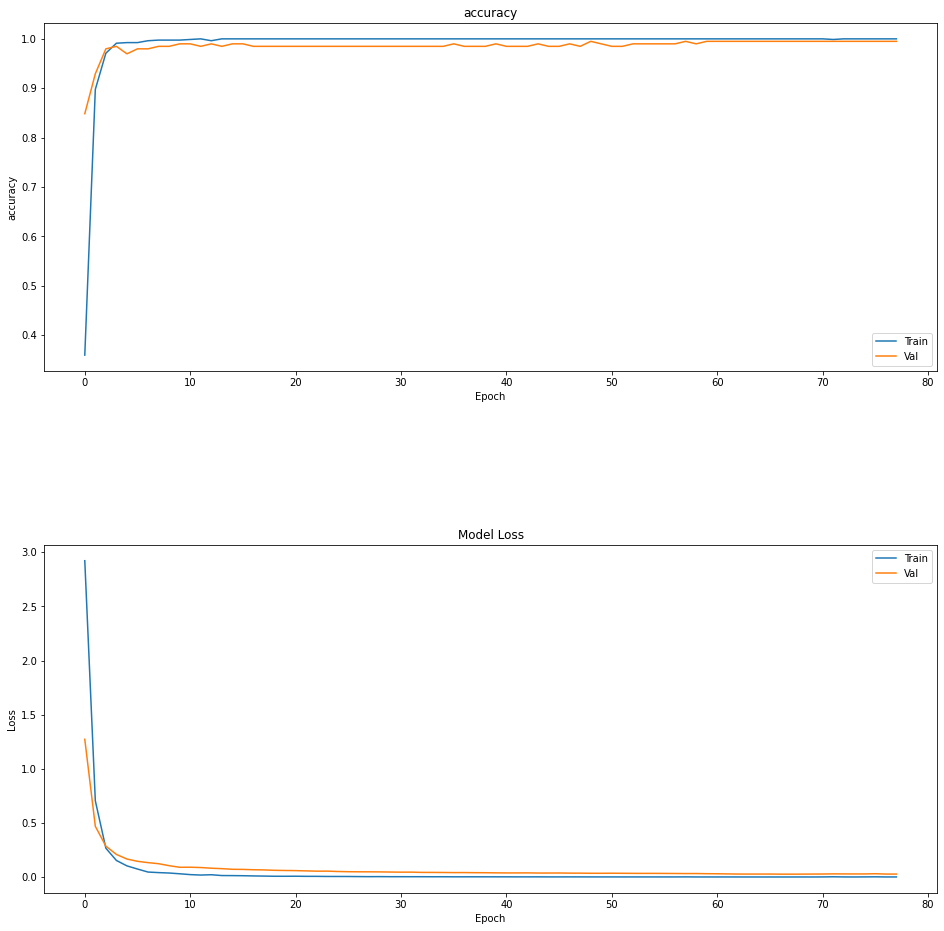

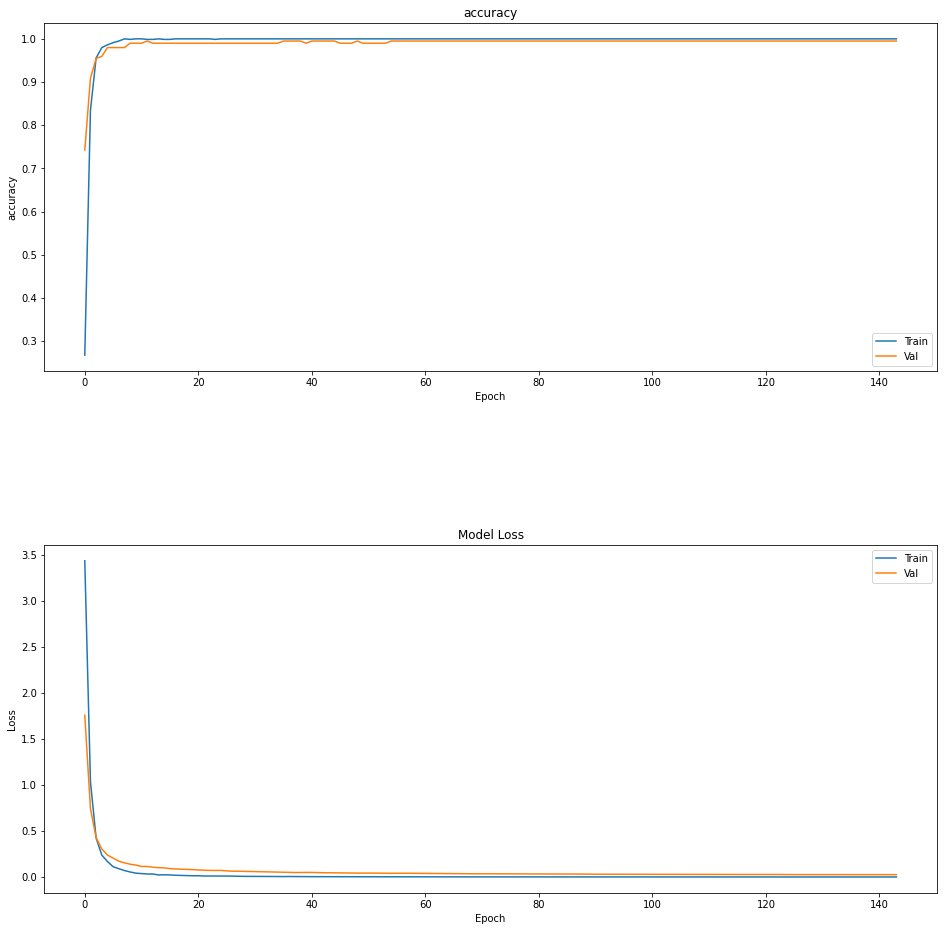

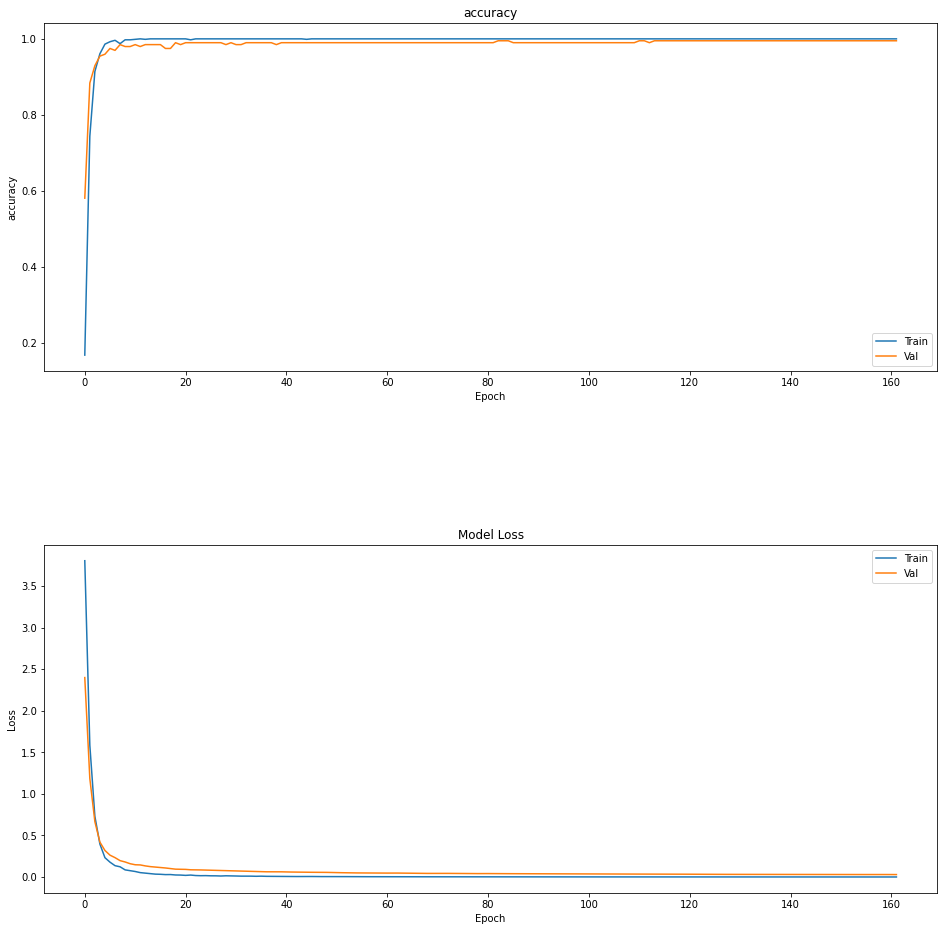

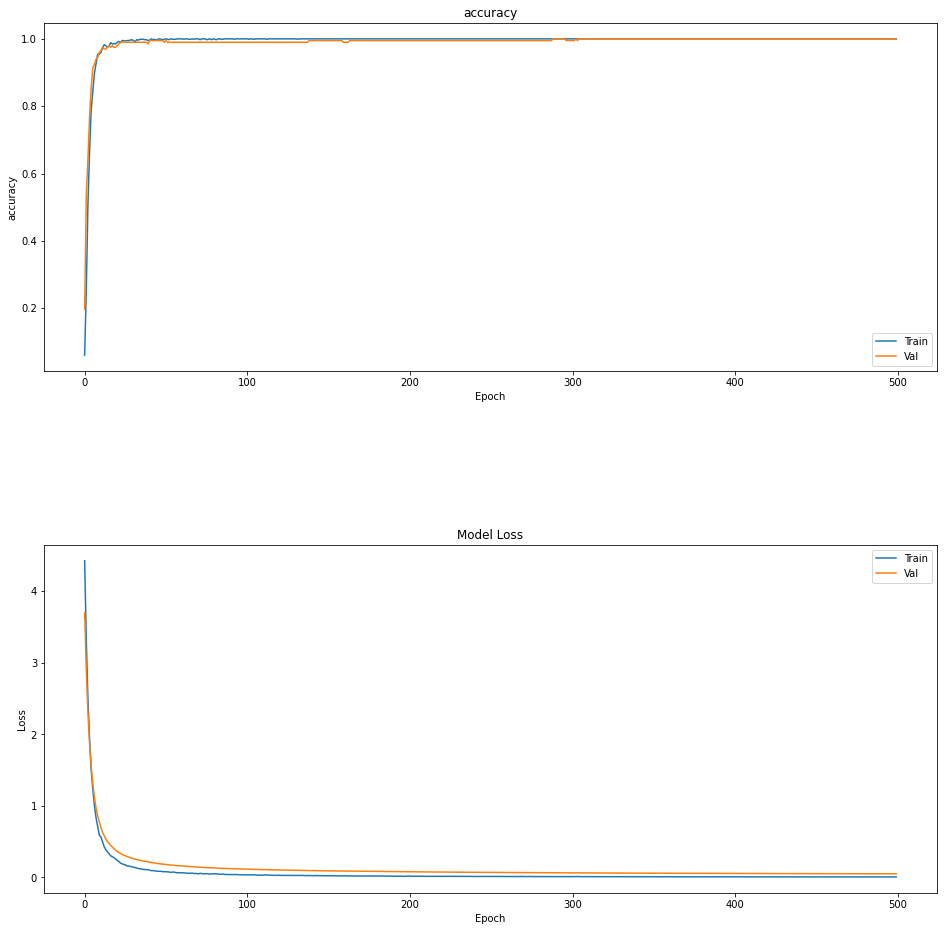

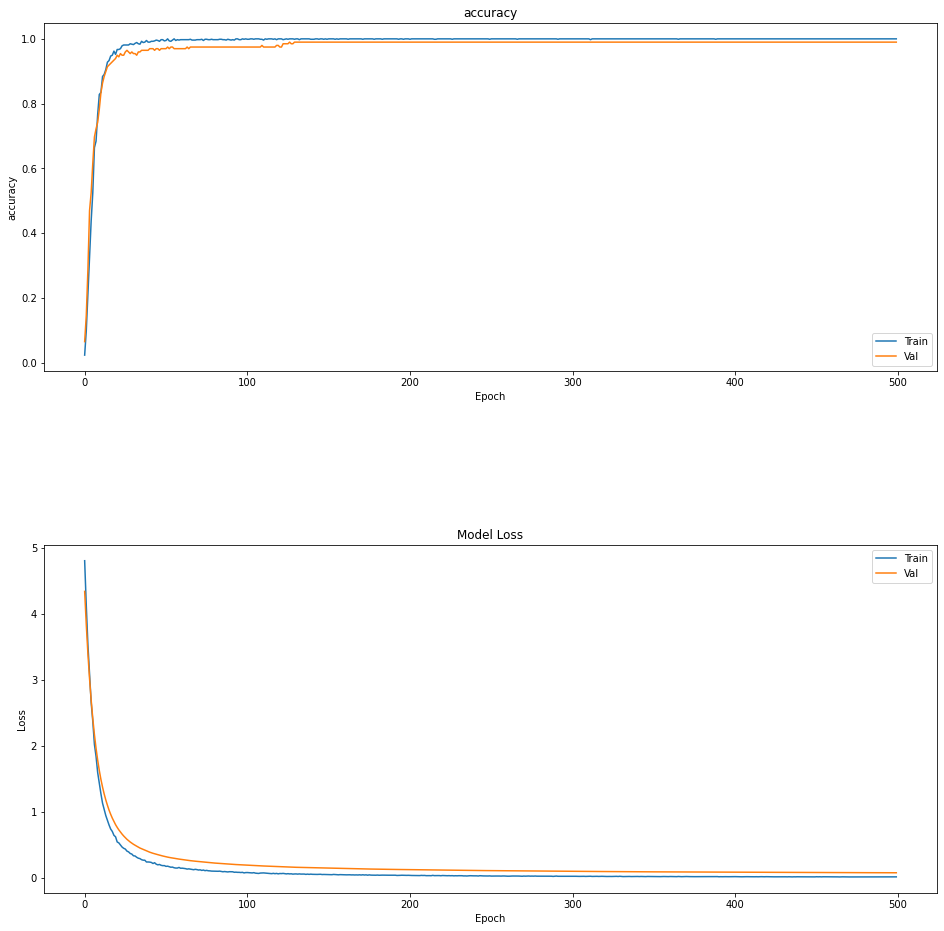

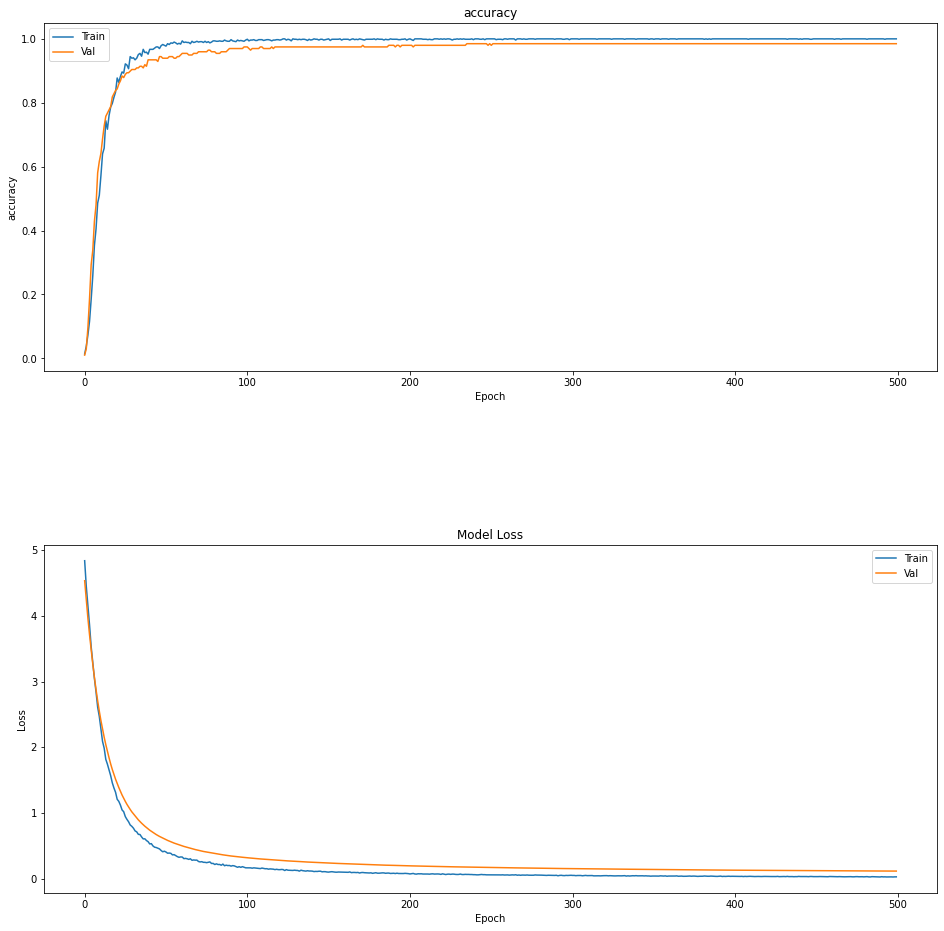

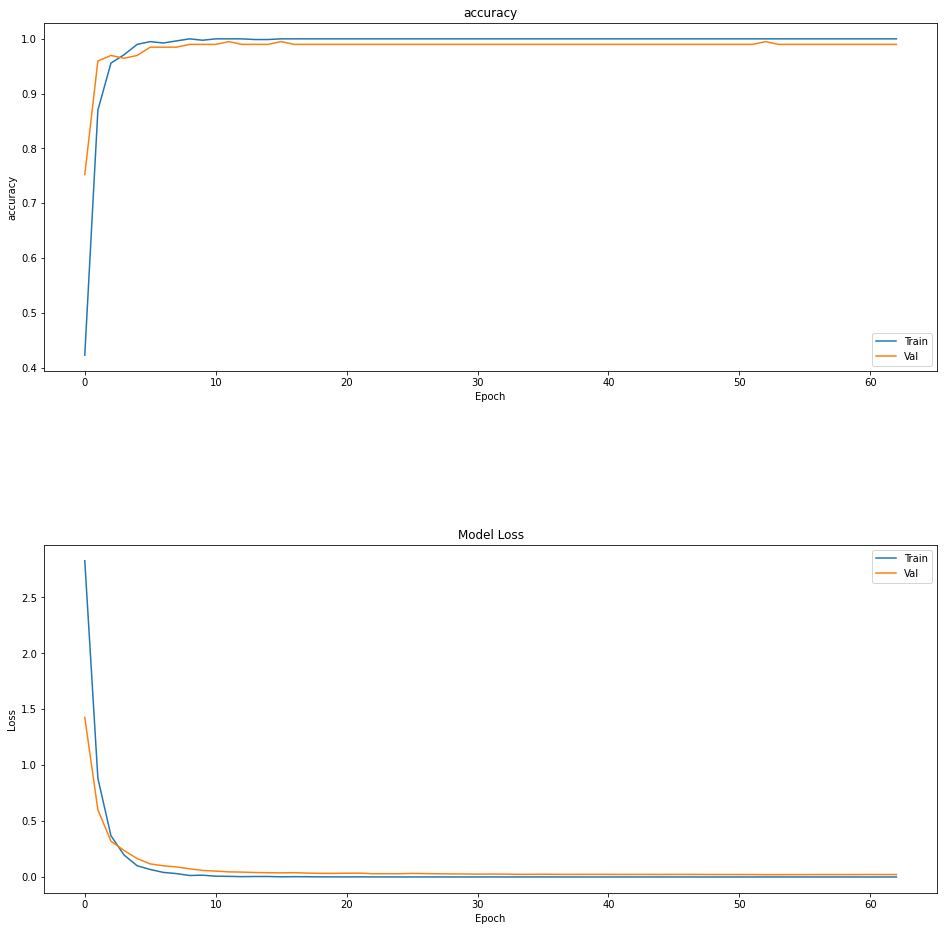

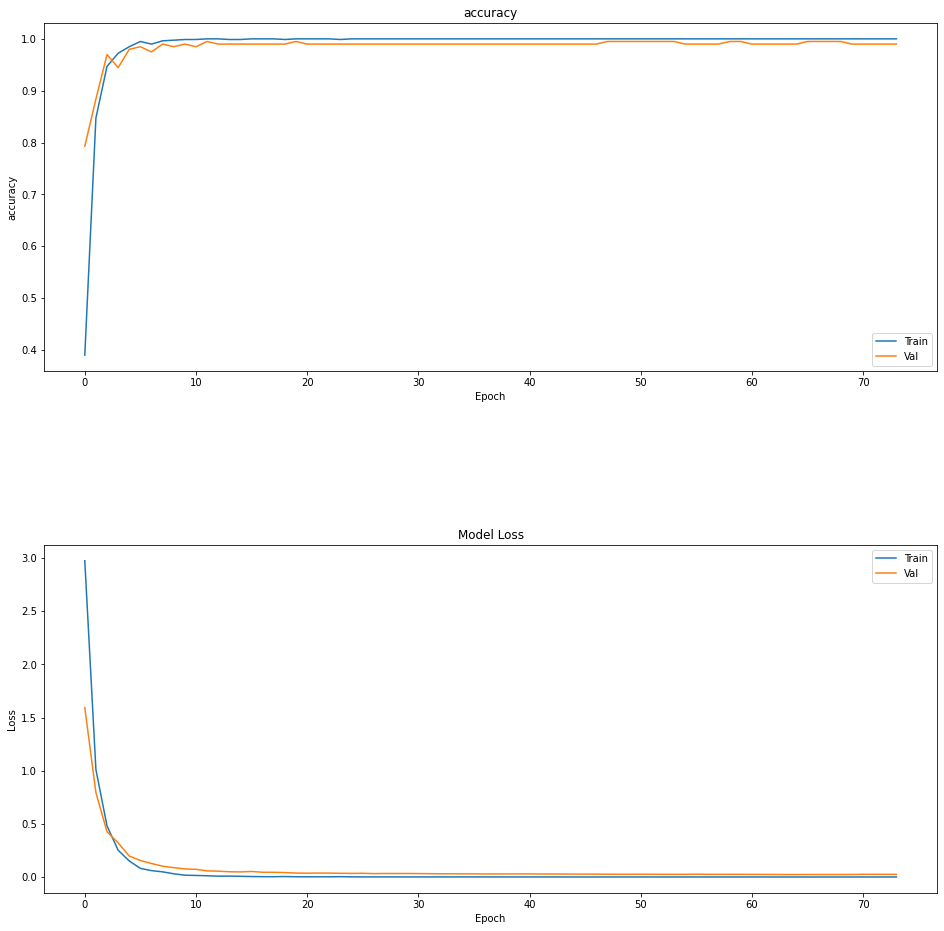

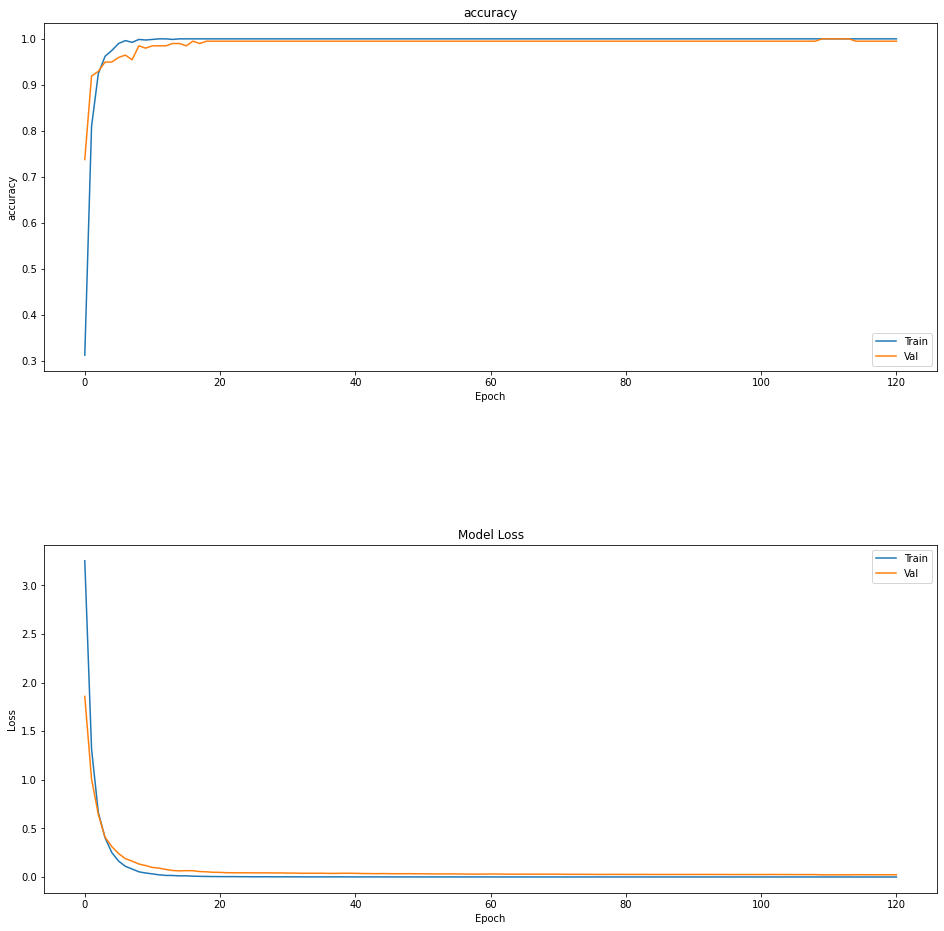

In [ ]:
#make a combination from different hyperparameters
#get validation accuracy and loss for each  combination
hyper=[]
our_data=[]
hidden_size=[192, 384, 768]
dropout=[0, 0.2, 0.5]
optimizers = ["Adam","SGD","RMSprop"]
batch_size = [16, 32, 64]

for i in hidden_size:
  print(f"====>hidden_size = {i}")
  for j in dropout:
    print(f"===>dropout = {j}")
    for k in optimizers:
      print(f"==>optimizers = {k}")
      for l in batch_size:
        print(f"=>batch_size = {l}")
        print(f"the hyperparameters are  hidden_size = {i}  , dropout = {j}, optimizers = {k} , batch_size = {l}")
        val,h_par=evaluation_parameters(hidden_size = i,dropout = j, optimizers = k,batch_size = l)
        # this value store the  loss , accuracy , hyperparameter 
        our_data.append([val[0],val[1],h_par])

In [ ]:
# print list of list , each list contain 3 values (loss,accuracy,hyperparameters)
our_data

[[0.021193481981754303,
  0.9898989796638489,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 16}],
 [0.015373410657048225,
  1.0,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 32}],
 [0.02756747044622898,
  0.9949495196342468,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 64}],
 [0.09004099667072296,
  0.9898989796638489,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 16}],
 [0.14666730165481567,
  0.9848484992980957,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 32}],
 [0.20463022589683533,
  0.9898989796638489,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 64}],
 [0.025564581155776978,
  0.9898989796638489,
  {'hidden_size': 192,
   'dropout': 0,
   'optimizers': 'RMSprop',
   'batch_size': 16}],
 [0.01609581895172596,
  1.0,
  {'hidden_size': 192,
   'dropout': 0,
   'optimizers': 'RMSprop',
   'batch_size': 32}],
 [0.0196259189

In [ ]:
# concate the accuracy and loss in one list
accuracy_hyperparameter=[]
for i in our_data:
  accuracy_hyperparameter.append([i[1],i[2]])

accuracy_hyperparameter

[[0.9898989796638489,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 16}],
 [1.0,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 32}],
 [0.9949495196342468,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 64}],
 [0.9898989796638489,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 16}],
 [0.9848484992980957,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 32}],
 [0.9898989796638489,
  {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 64}],
 [0.9898989796638489,
  {'hidden_size': 192,
   'dropout': 0,
   'optimizers': 'RMSprop',
   'batch_size': 16}],
 [1.0,
  {'hidden_size': 192,
   'dropout': 0,
   'optimizers': 'RMSprop',
   'batch_size': 32}],
 [1.0,
  {'hidden_size': 192,
   'dropout': 0,
   'optimizers': 'RMSprop',
   'batch_size': 64}],
 [0.9949495196342468,
  {'hidden_size': 192,
   'dropout': 0.2,
   'optimizers': 'Adam',
   'batch_size

In [ ]:
# split the the accuracy and hyperparameters in two list
acc=[]
hyper=[]
max_acc=[]
for i,j in accuracy_hyperparameter:
   acc.append(i)
   hyper.append(j)  
print(hyper)
print(acc)

[{'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 16}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 32}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 64}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 16}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 32}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'SGD', 'batch_size': 64}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'RMSprop', 'batch_size': 16}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'RMSprop', 'batch_size': 32}, {'hidden_size': 192, 'dropout': 0, 'optimizers': 'RMSprop', 'batch_size': 64}, {'hidden_size': 192, 'dropout': 0.2, 'optimizers': 'Adam', 'batch_size': 16}, {'hidden_size': 192, 'dropout': 0.2, 'optimizers': 'Adam', 'batch_size': 32}, {'hidden_size': 192, 'dropout': 0.2, 'optimizers': 'Adam', 'batch_size': 64}, {'hidden_size': 192, 'dropout': 0.2, 'optimizers': 'SGD', 'batch_size': 16}

In [ ]:
# get the length of hyperparameter list
# the two list must have the same length
len(hyper)

81

In [ ]:
# get the length of accuracy list
len(acc)

81

In [ ]:
# get the maximum  accuracy
# get the  index of max accuracy 
# the index of max accuracy will be the index of best hyperparameter
max_acct=[]
acc_len=len(acc)
max_index=0
for index in range (acc_len):
  if acc[index]>acc[max_index]:
    max_index=index
    print(max_index)

print("the best hyperparameters are {}".format(hyper[max_index]))
print("the validation  accuracy is {} ".format(acc[max_index]))


1
the best hyperparameters are {'hidden_size': 192, 'dropout': 0, 'optimizers': 'Adam', 'batch_size': 32}
the validation  accuracy is 1.0 
